In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os,re
sys.path.append("../shared/utilsGRF/")
import AnalyseBoundarysearch
from shutil import copyfile
sys.path.append("./scripts")
sys.path.append("./cflinux/")
sys.path.append("./cfmac/")
import BoundaryFinder as BF
import matplotlib as mpl
import PolAB_A_allpars
GRFA=PolAB_A_allpars.interface_GRF_PolAB_A_A

In [2]:
def return_fullparset(parset,case):
    if case=="any":
        parset2=parset.copy()
    elif case=="difAD_difbnp":
        parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[14:16],parset[14:16],parset[14:16]))
    elif case=="difADsbnp" or case=="difAD_samebnp":
        parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14]))
    elif case=="difAD_samebnp_step12":#ni,ia
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step13": #ni,an
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step23":#ia,an
        parset2=np.concatenate((parset[0:4],parset[4:5],parset[1:4],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step11":
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:3],parset[5:6],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="sameAD_difbp":
        parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:20]))
    elif case=="sameAD_difbp_kuonly":
        kb=parset[8]
        ku1,ku2,ku3,ku4,ku5,ku6=parset[9:]
        bindingar=np.array([kb,ku1,kb,ku2,kb,ku3,kb,ku4,kb,ku5,kb,ku6])
        parset2=np.concatenate((parset[0:8],parset[4:8],bindingar))
    elif case=="sameAD_difbnp":
        parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:10],parset[8:10],parset[8:10],parset[10:12],parset[10:12],parset[10:12]))
    elif case=="empty":
         parset2=np.concatenate((parset[0:8],parset[0:4],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10]))
    else:
        print("unrecognised case, ", case)
        raise ValueError
    return parset2

def get_constraints_npars(case,fcd=0.01,fcu=100):
    if case=="any":
        npars=24
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}, 8:{'target':0,'fcd':1,'fcu':fcu},9:{'target':1,'fcd':1,'fcu':fcu},10:{'target':2,'fcd':fcd,'fcu':1},11:{'target':3,'fcd':1,'fcu':fcu}}
        
    elif case=="difAD_difbnp":
        npars=16
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}, 8:{'target':0,'fcd':1,'fcu':fcu},9:{'target':1,'fcd':1,'fcu':fcu},10:{'target':2,'fcd':fcd,'fcu':1},11:{'target':3,'fcd':1,'fcu':fcu}}
    elif case=="difADsbnp" or case=="difAD_samebnp":
        npars=14
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}, 8:{'target':0,'fcd':1,'fcu':fcu},9:{'target':1,'fcd':1,'fcu':fcu},10:{'target':2,'fcd':fcd,'fcu':1},11:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14]))
    elif case=="difAD_samebnp_step12":#ni,ia
        npars=8
        constraints={4:{'target':3,'fcd':1,'fcu':fcu},5:{'target':0,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step13": #ni,an
        npars=8
        constraints={4:{'target':3,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step23":#ia,an
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu}}
        npars=8
        #parset2=np.concatenate((parset[0:4],parset[4:5],parset[1:4],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step11":
        npars=8
        constraints={4:{'target':3,'fcd':1,'fcu':fcu},5:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:3],parset[5:6],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="sameAD_difbp":
        npars=20
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:20]))
    elif case=="sameAD_difbp_kuonly":
        #kb=parset[8]
        #ku1,ku2,ku3,ku4,ku5,ku6=parset[9:]
        #bindingar=np.array([kb,ku1,kb,ku2,kb,ku3,kb,ku4,kb,ku5,kb,ku6])
        #parset2=np.concatenate((parset[0:8],parset[4:8],bindingar))
        npars=15
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}}
    elif case=="sameAD_difbnp":
        npars=12
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}}
        #parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:10],parset[8:10],parset[8:10],parset[10:12],parset[10:12],parset[10:12]))
    elif case=="empty":
        npars=10
        constraints={4:{'target':0,'fcd':1,'fcu':fcu},5:{'target':1,'fcd':1,'fcu':fcu},6:{'target':2,'fcd':fcd,'fcu':1},7:{'target':3,'fcd':1,'fcu':fcu}} 
        #parset2=np.concatenate((parset[0:8],parset[0:4],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10]))
    else:
        print("unrecognised case, ", case)
        raise ValueError
    return [constraints,npars]

def compute_syn_2fc(parset,fc1=10,fc2=5,case=None):
    mstars=[]
    parset2=return_fullparset(parset,case)
    
    for i in range(4):
        if i==0:
            A=0.0
            B=0.0
        elif i==1:
            A=2.0
            B=0.0
        elif i==2:
            A=0.0
            B=2.0
        else:
            A=1.0
            B=1.0
        m=GRFA(parset2.copy(),np.array([B]),A) #in some cases I have observed weird behaviour if the array is passed multiple times so it is safest to copy. 
        mstars.append(m)
    if mstars[1]>mstars[2]:
        r=(mstars[1]/mstars[2])
    else:
        r=(mstars[2]/mstars[1])
    if mstars[1]/mstars[0]>fc1 or mstars[2]/mstars[0]>fc1 or r>fc2:
        result=[None,None]
    else:
        if mstars[1]>=mstars[2]:
            result=[np.log2(mstars[3]/mstars[1]),np.log2(mstars[3]/mstars[2])]
        else:#swap A and B
            result=[np.log2(mstars[3]/mstars[2]),np.log2(mstars[3]/mstars[1])]

    return result

any_fcd=0.001_fcu=1000_fc1=5_fc2=2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


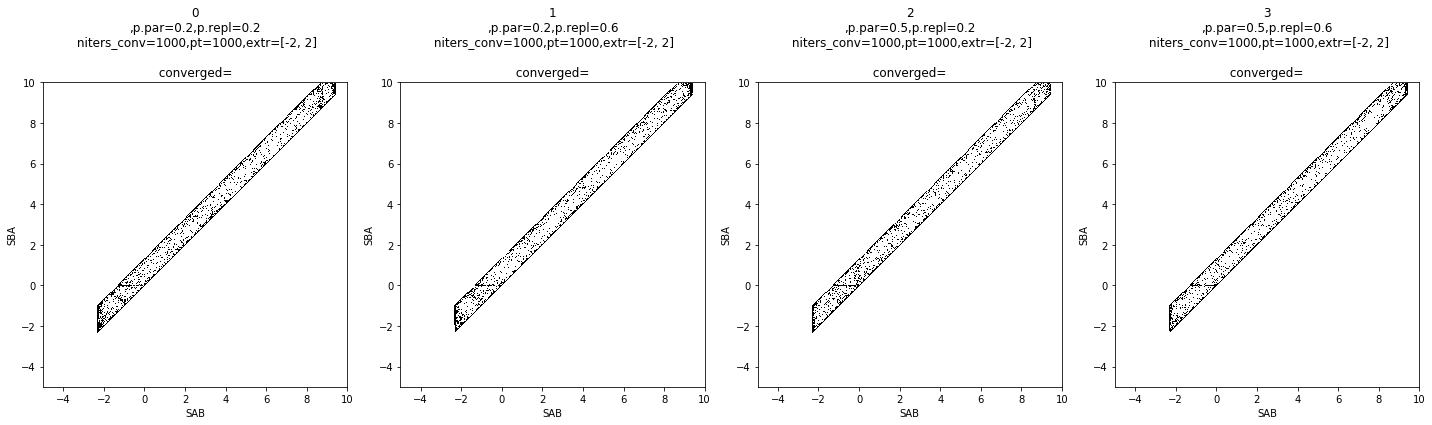

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


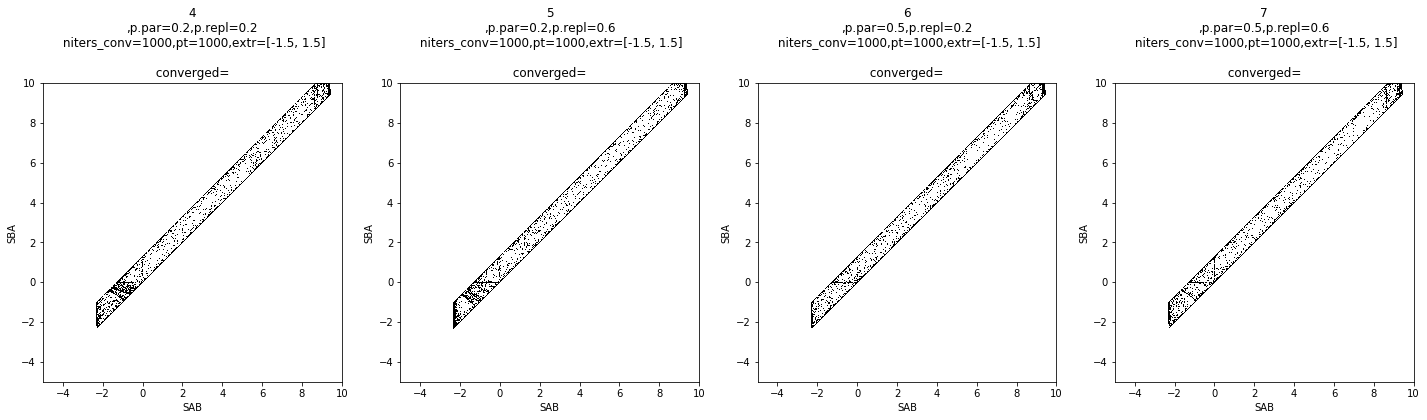

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


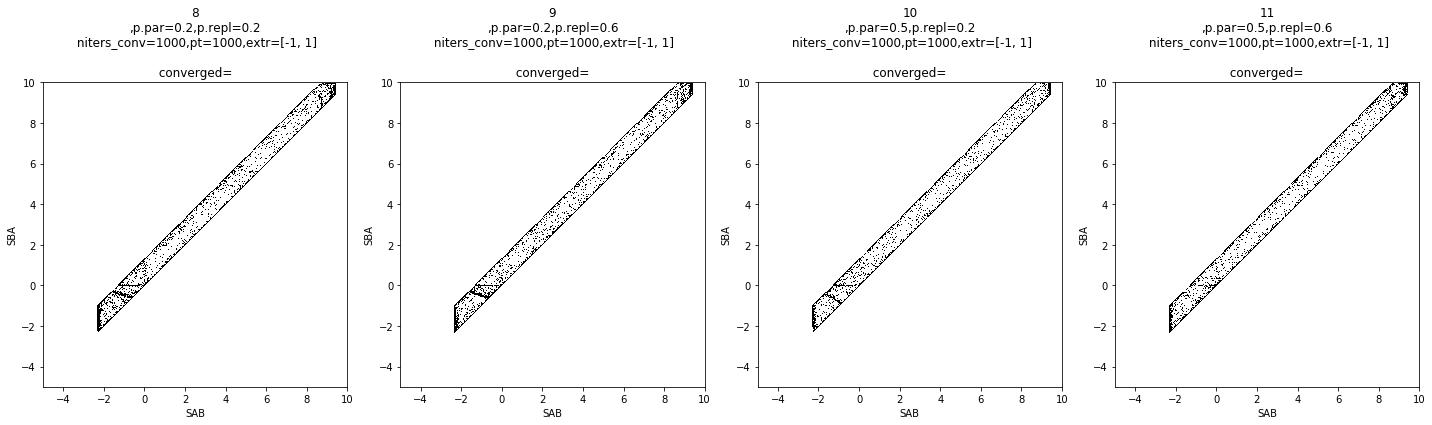

(601, 601)
any_fcd=0.001_fcu=1000_fc1=5_fc2=5
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


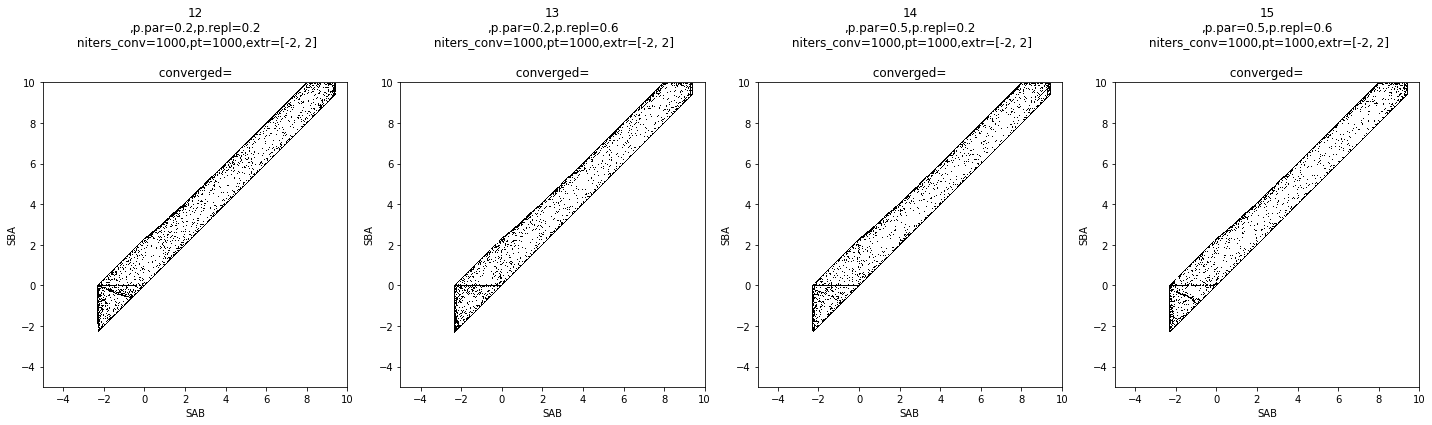

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


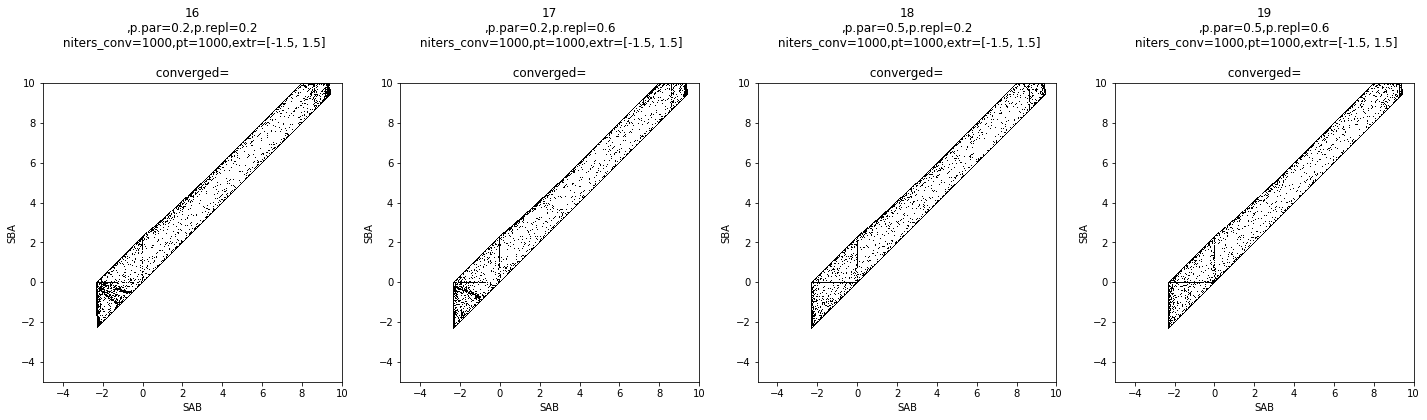

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


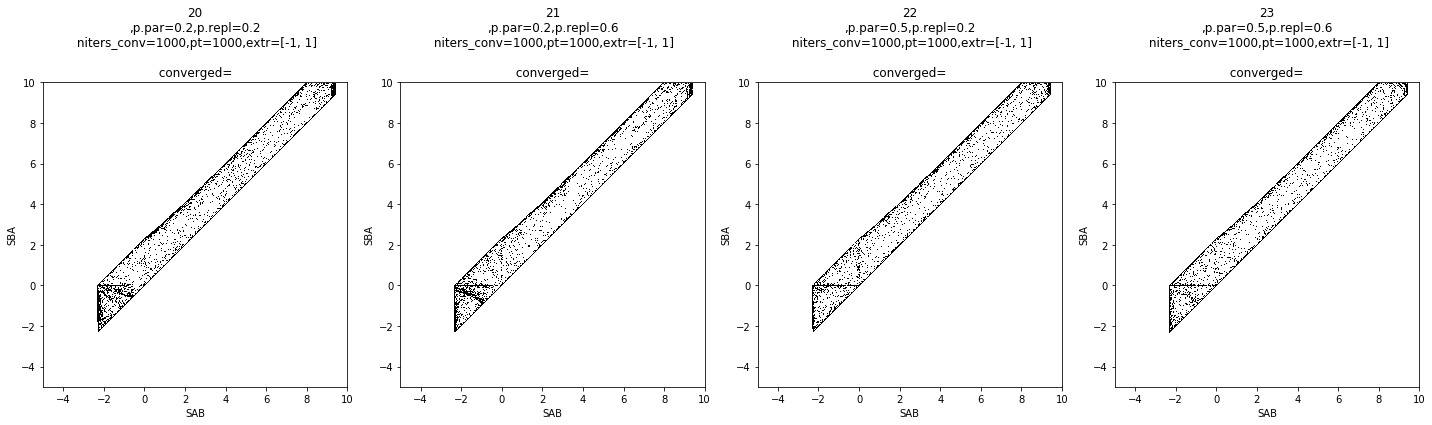

(601, 601)
any_fcd=0.001_fcu=1000_fc1=10_fc2=5
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


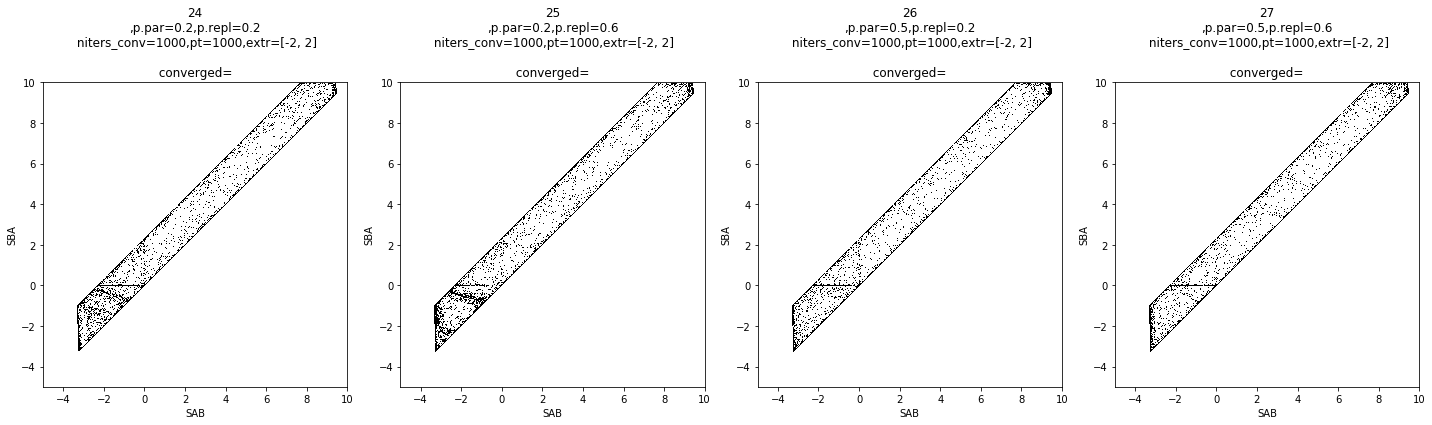

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


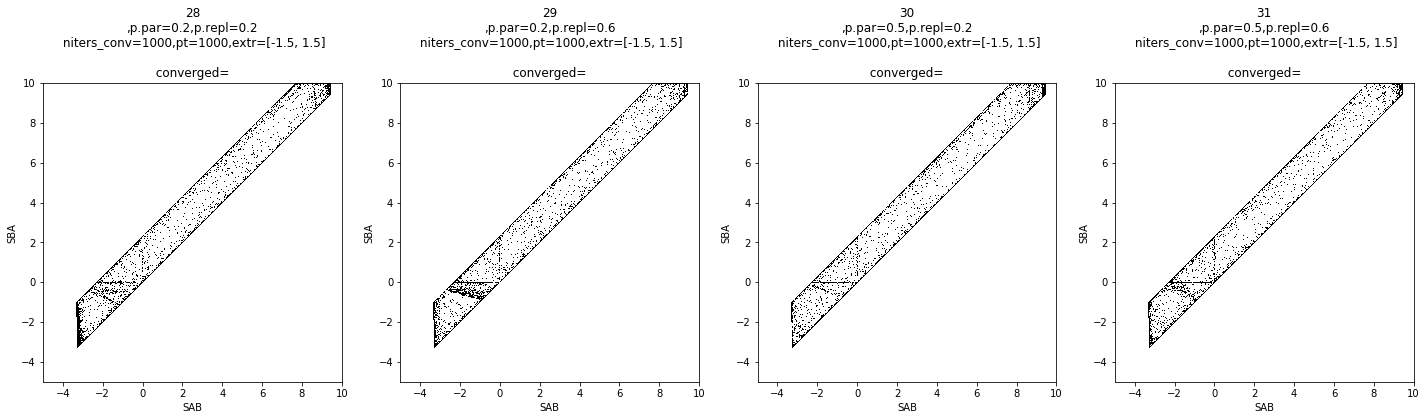

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


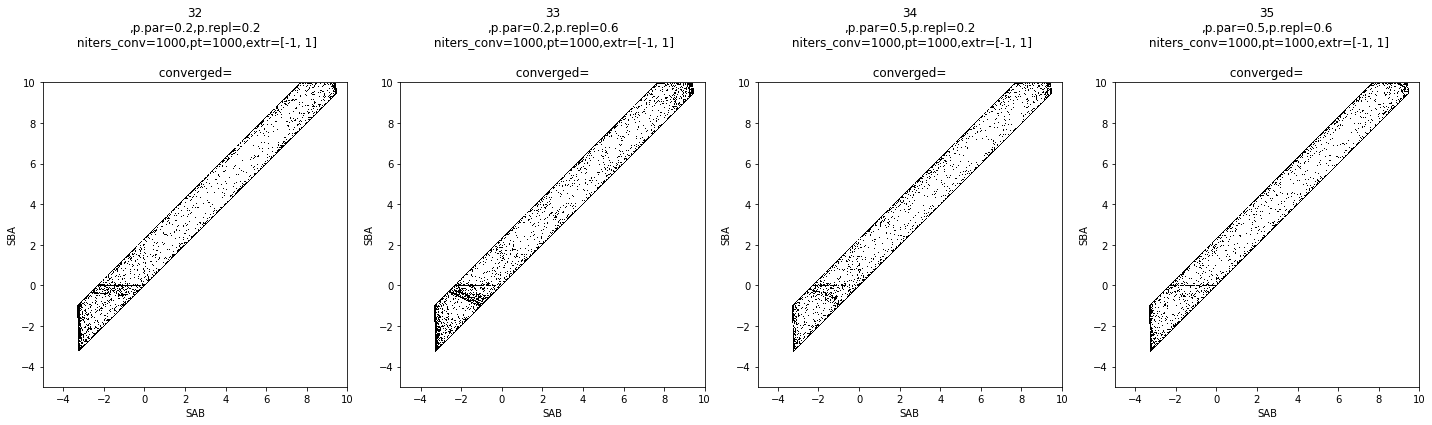

(601, 601)
any_fcd=0.001_fcu=1000_fc1=10_fc2=10
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


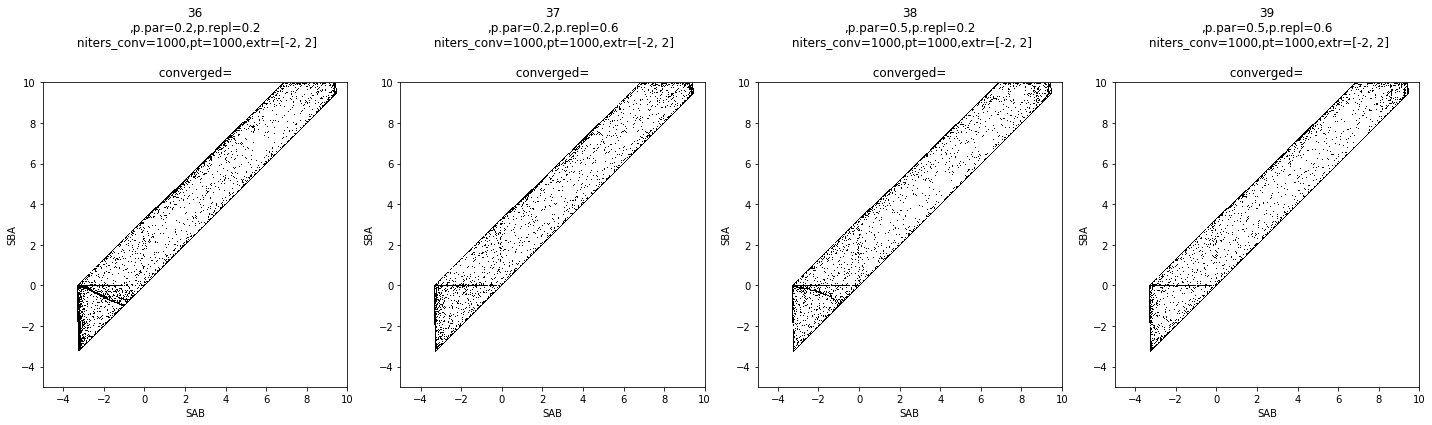

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


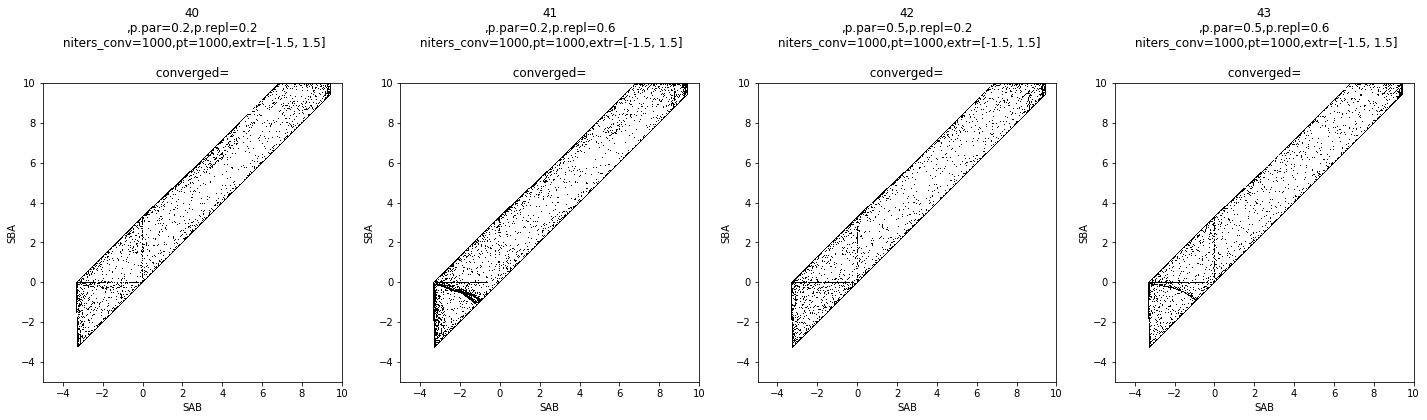

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


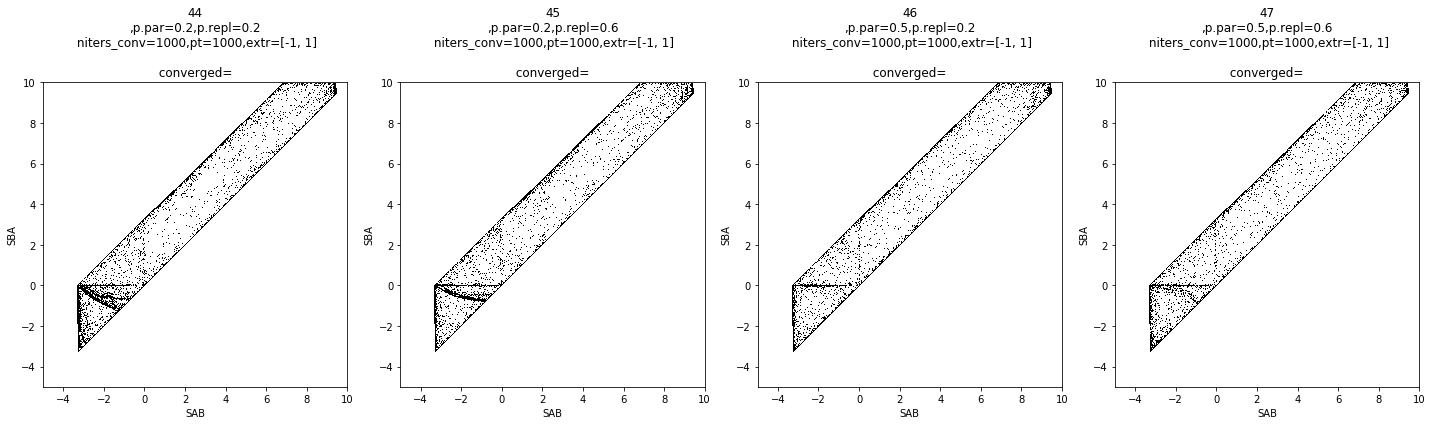

(601, 601)
difAD_difbnp_fcd=0.001_fcu=1000_fc1=5_fc2=2
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


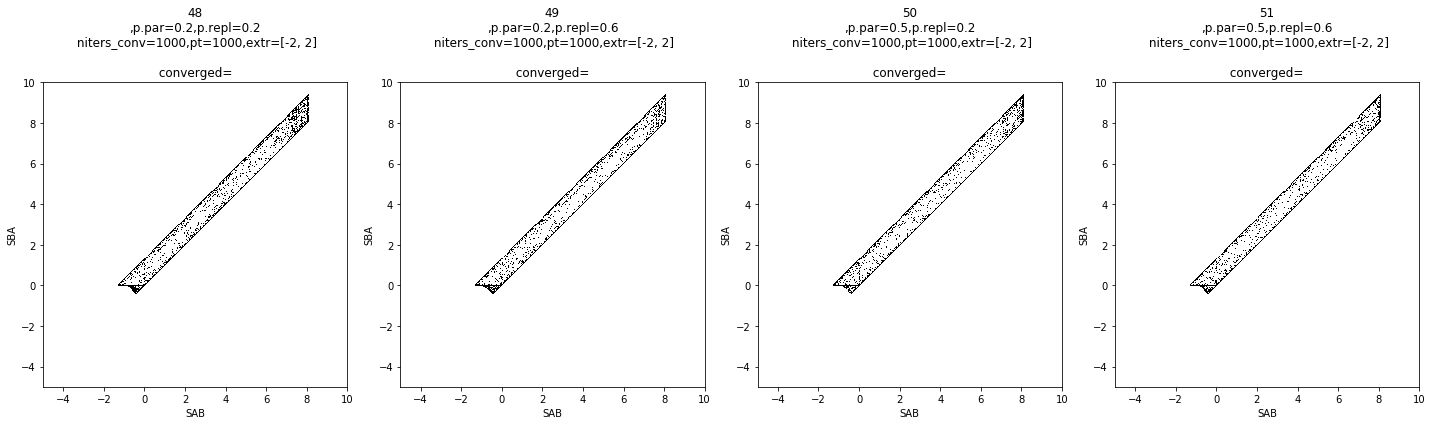

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


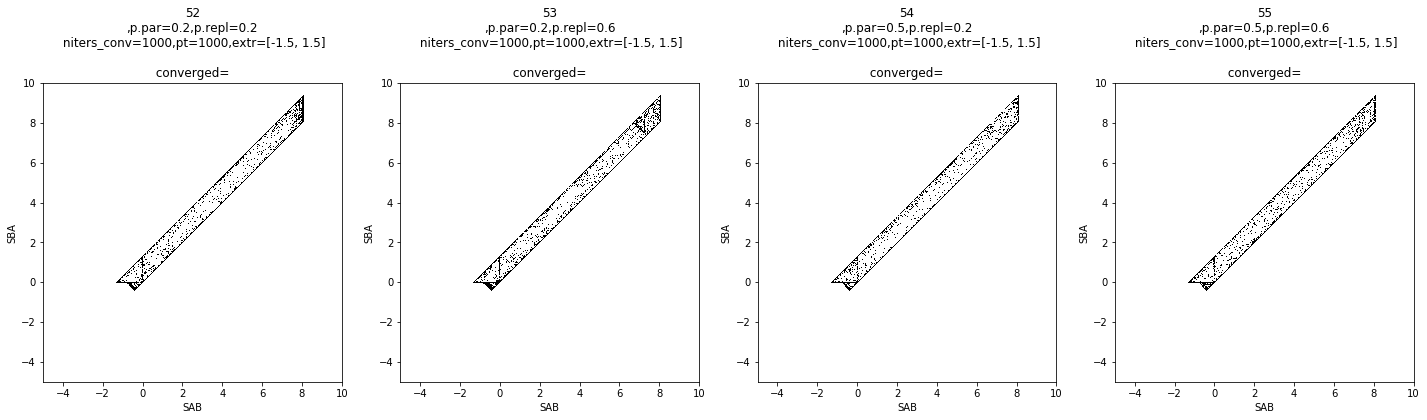

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


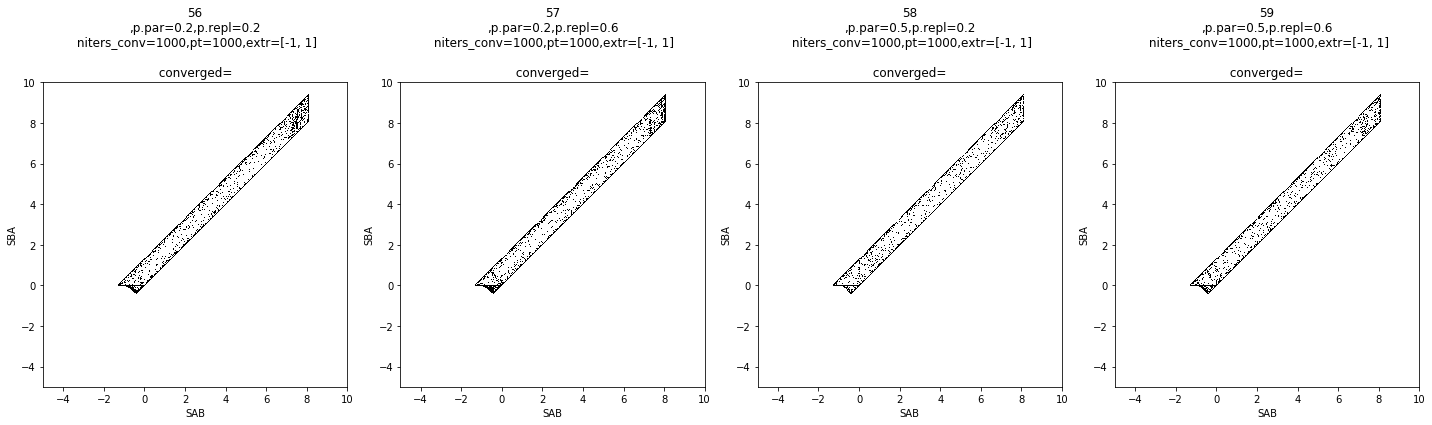

(601, 601)
difAD_difbnp_fcd=0.001_fcu=1000_fc1=5_fc2=5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


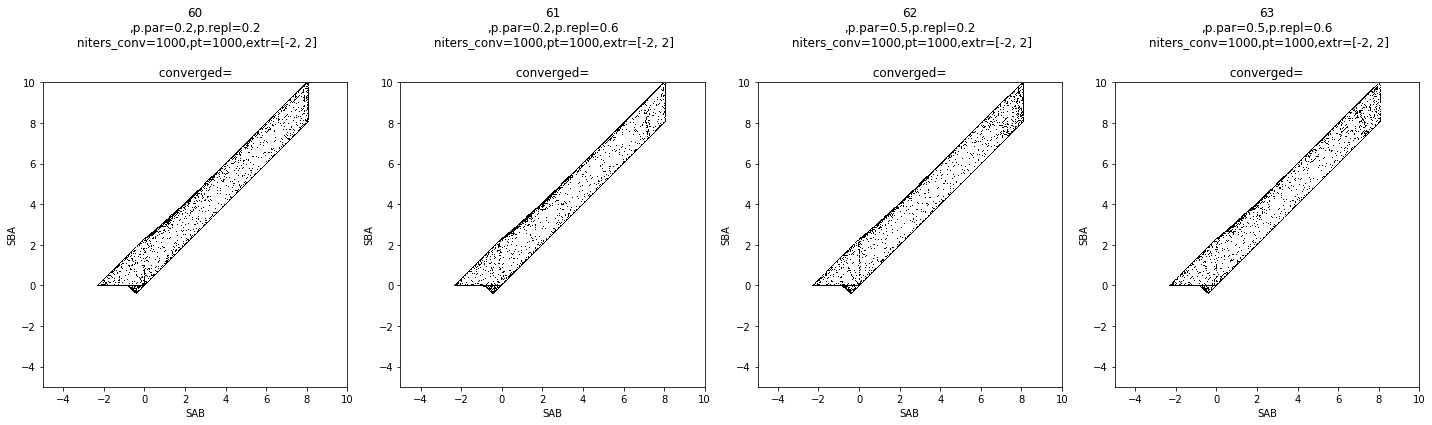

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


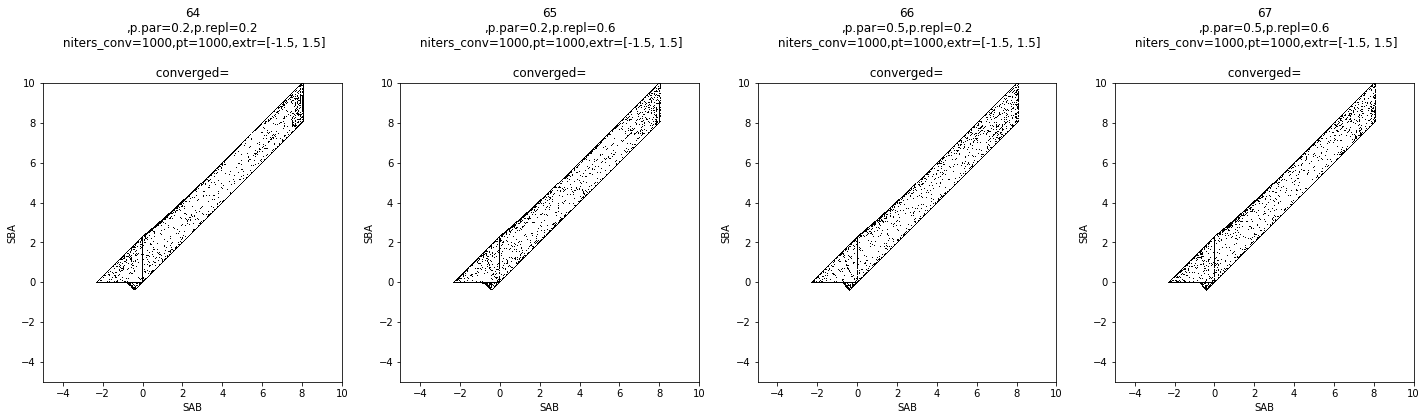

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


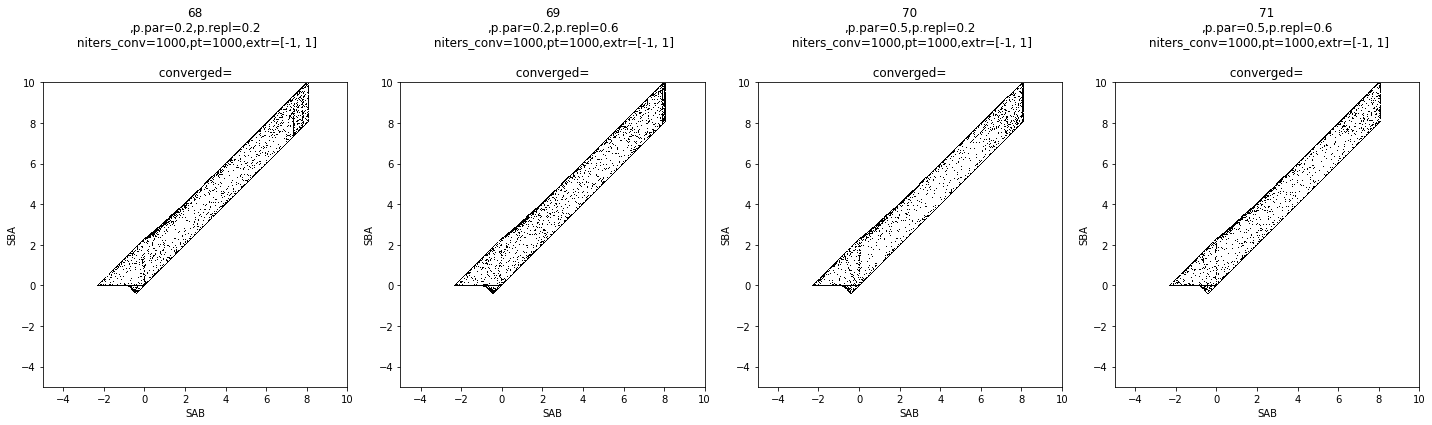

(601, 601)
difAD_difbnp_fcd=0.001_fcu=1000_fc1=10_fc2=5
[72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


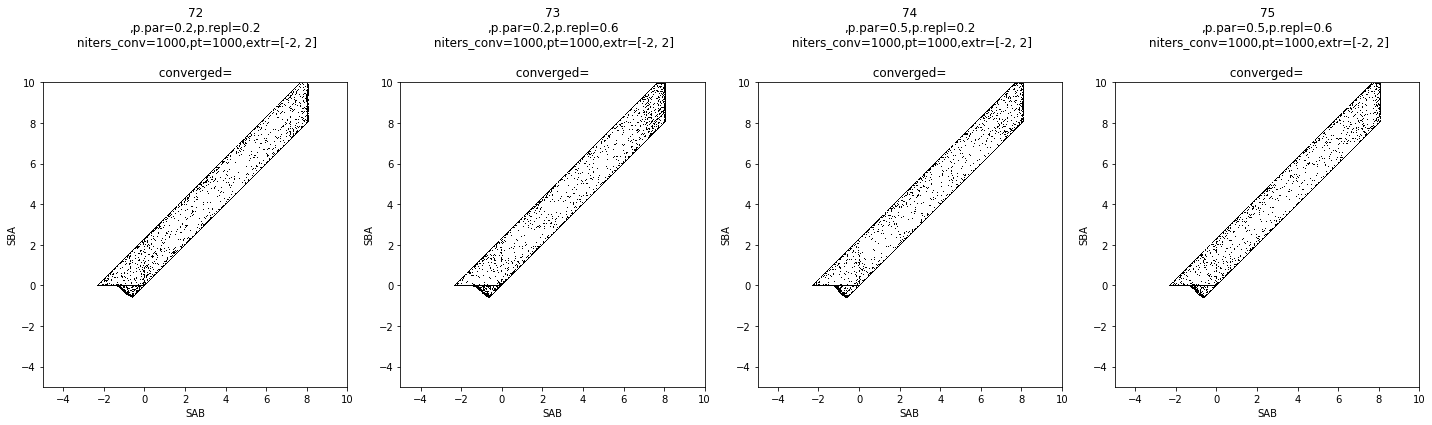

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


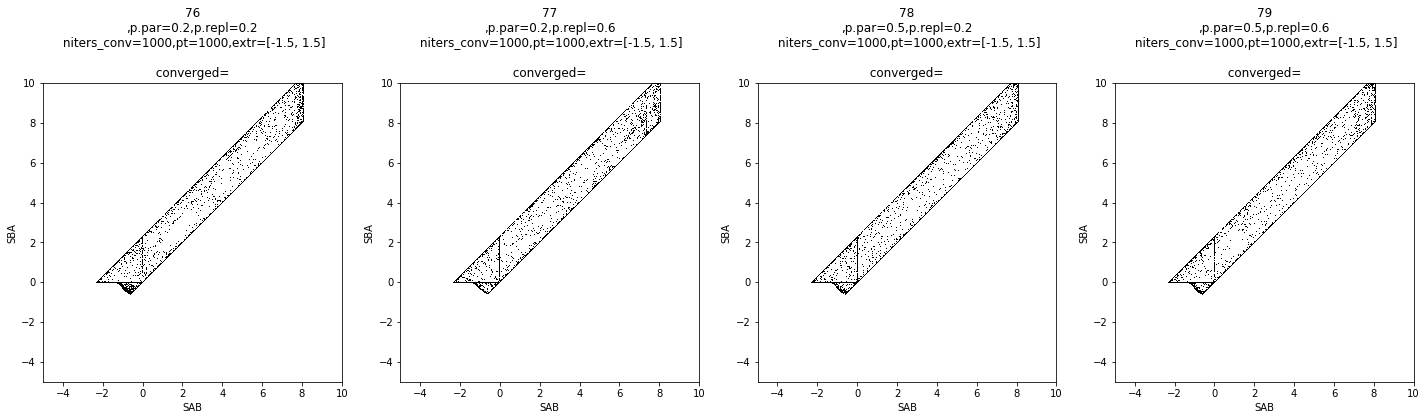

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


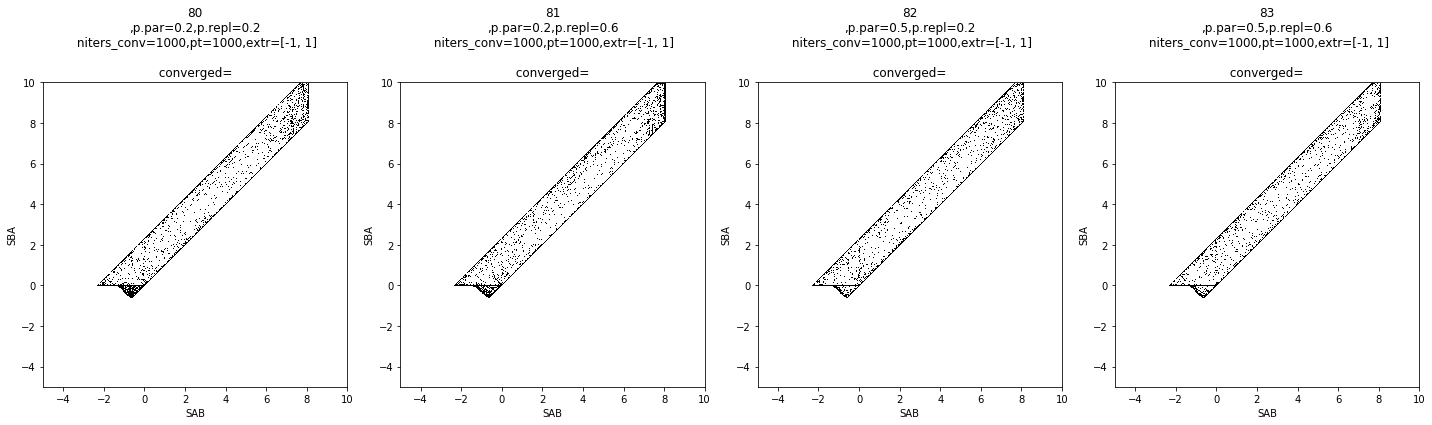

(601, 601)
difAD_difbnp_fcd=0.001_fcu=1000_fc1=10_fc2=10
[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


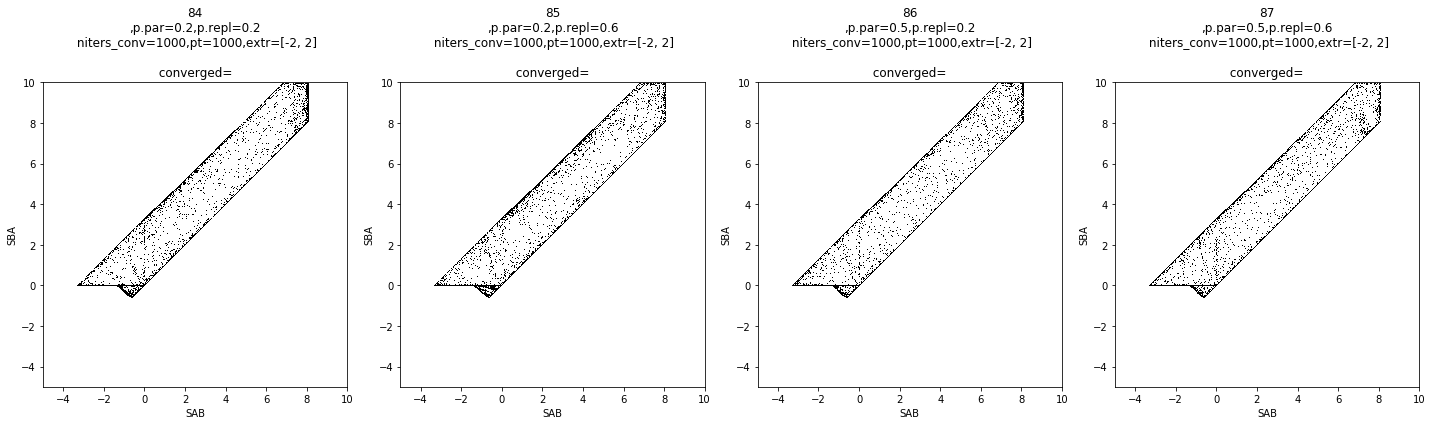

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


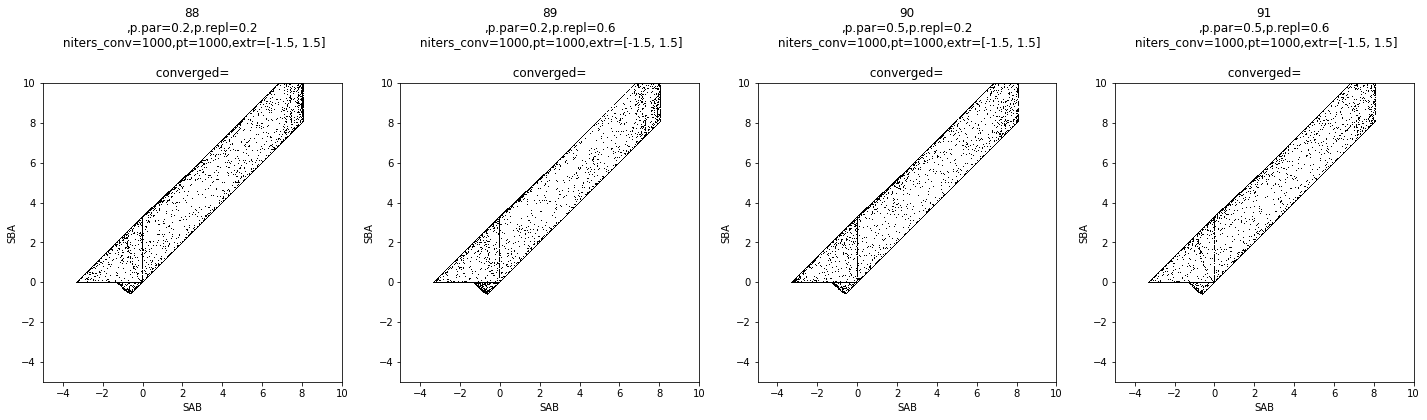

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


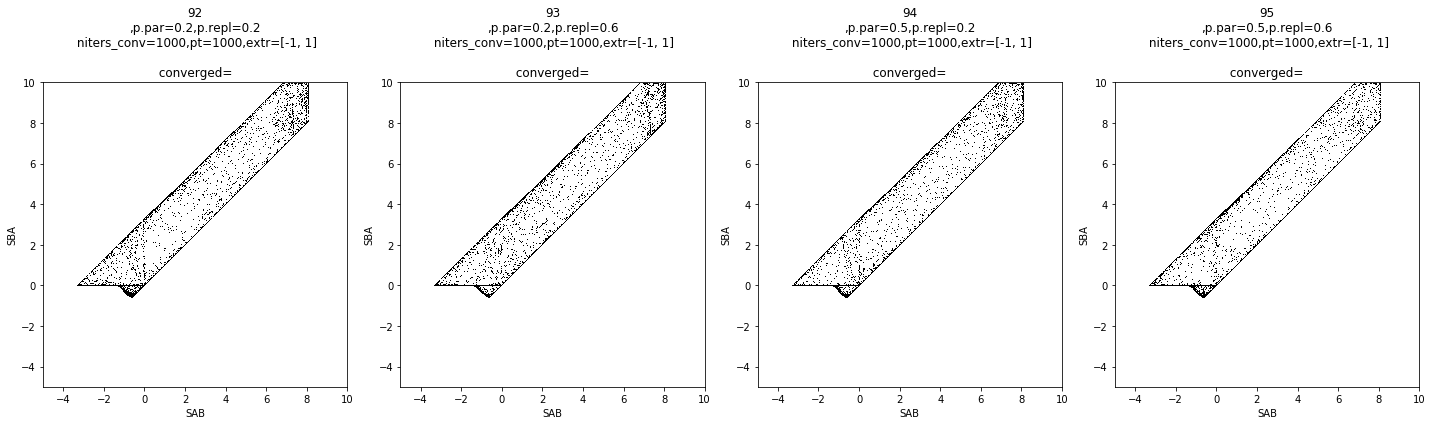

(601, 601)
difAD_samebnp_fcd=0.001_fcu=1000_fc1=5_fc2=2
[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


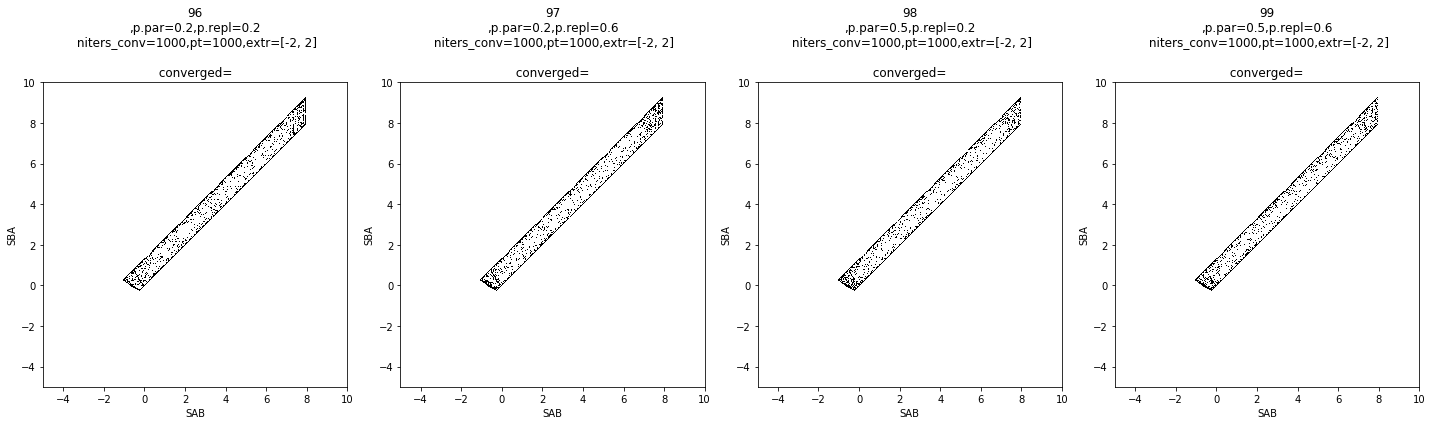

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


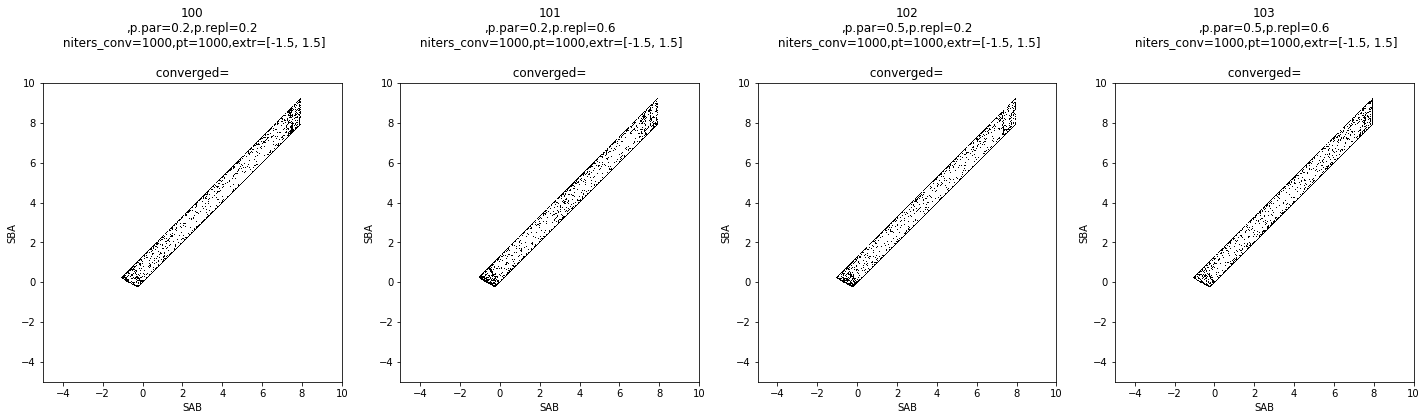

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


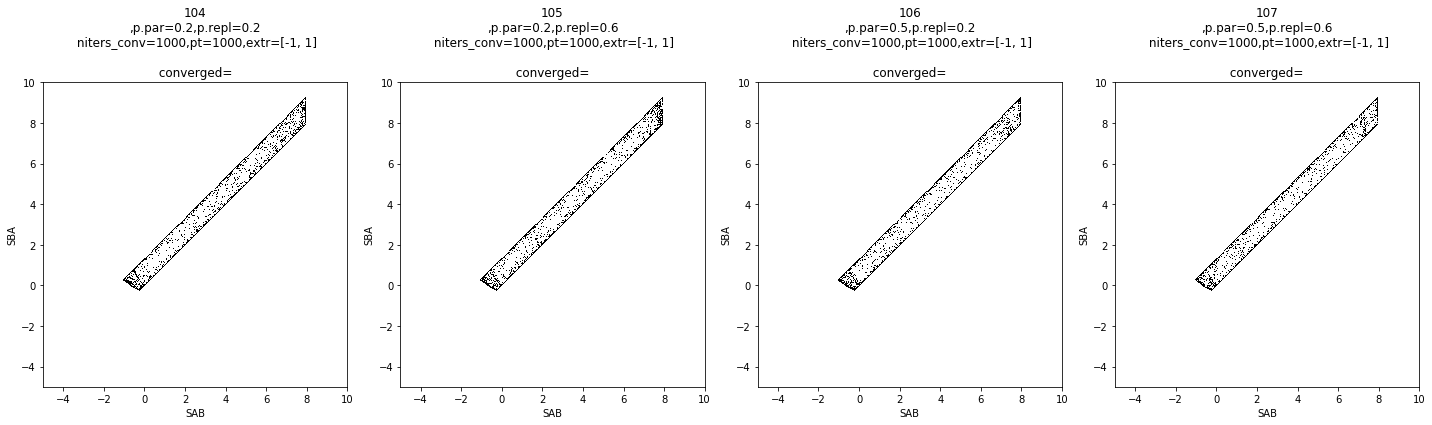

(601, 601)
difAD_samebnp_fcd=0.001_fcu=1000_fc1=5_fc2=5
[108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


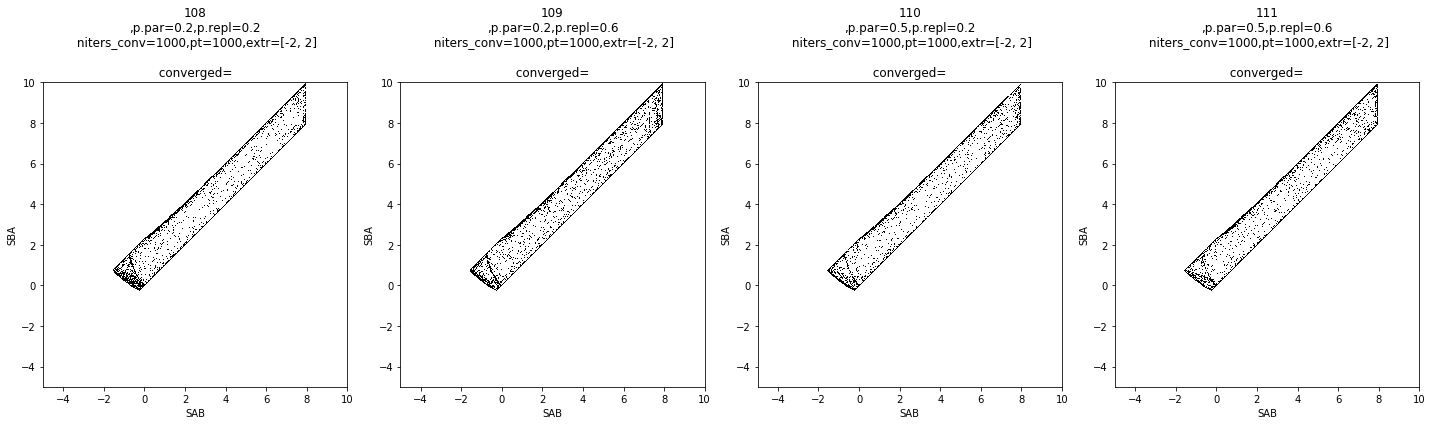

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


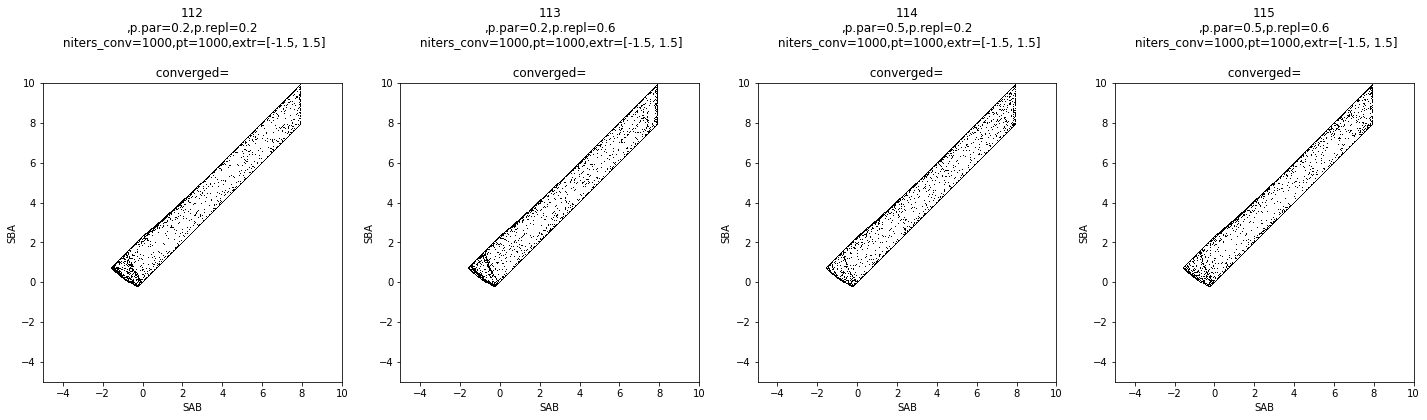

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


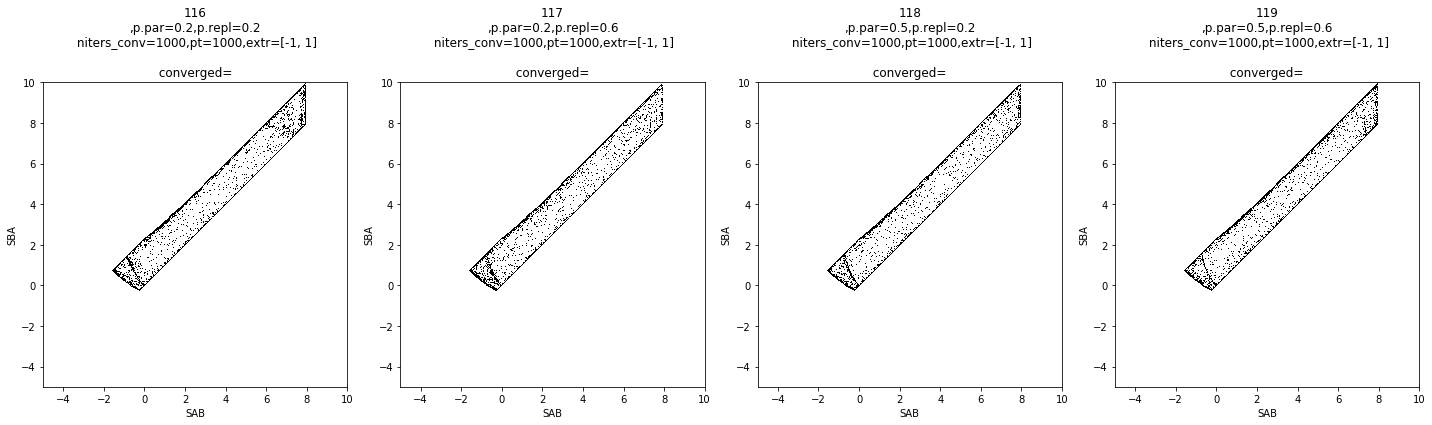

(601, 601)
difAD_samebnp_fcd=0.001_fcu=1000_fc1=10_fc2=5
[120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


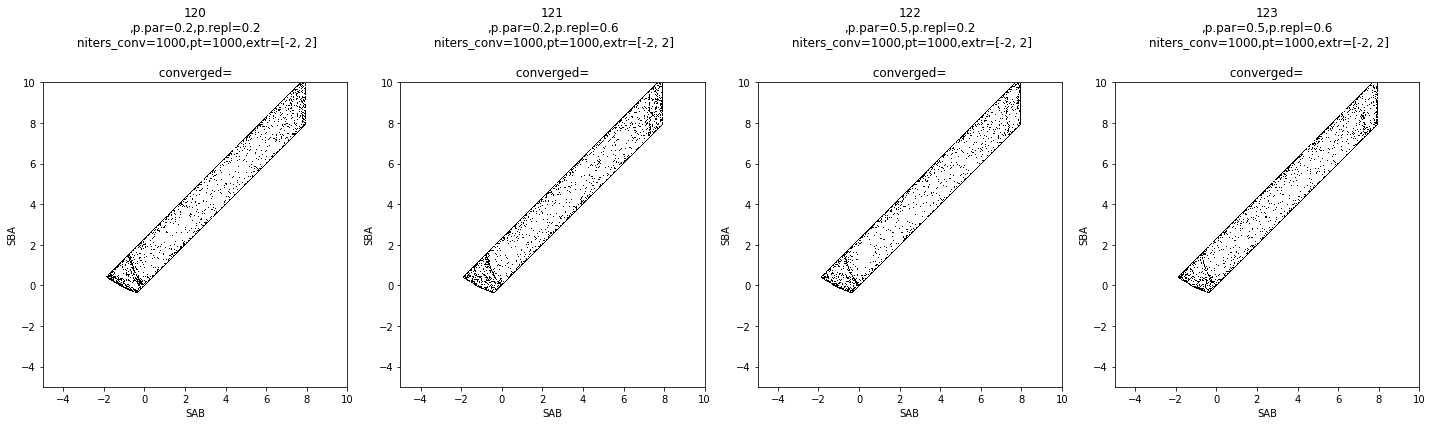

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


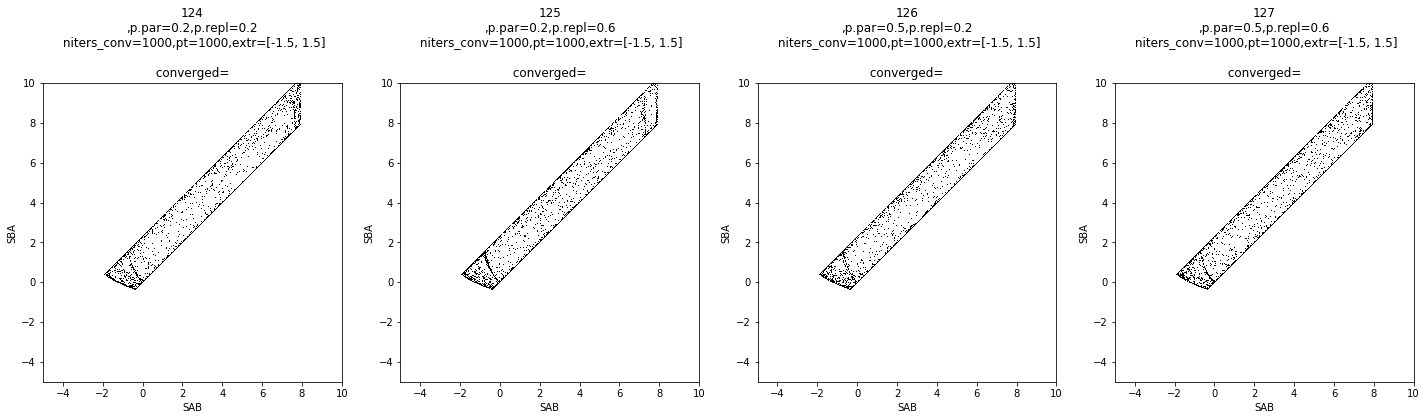

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


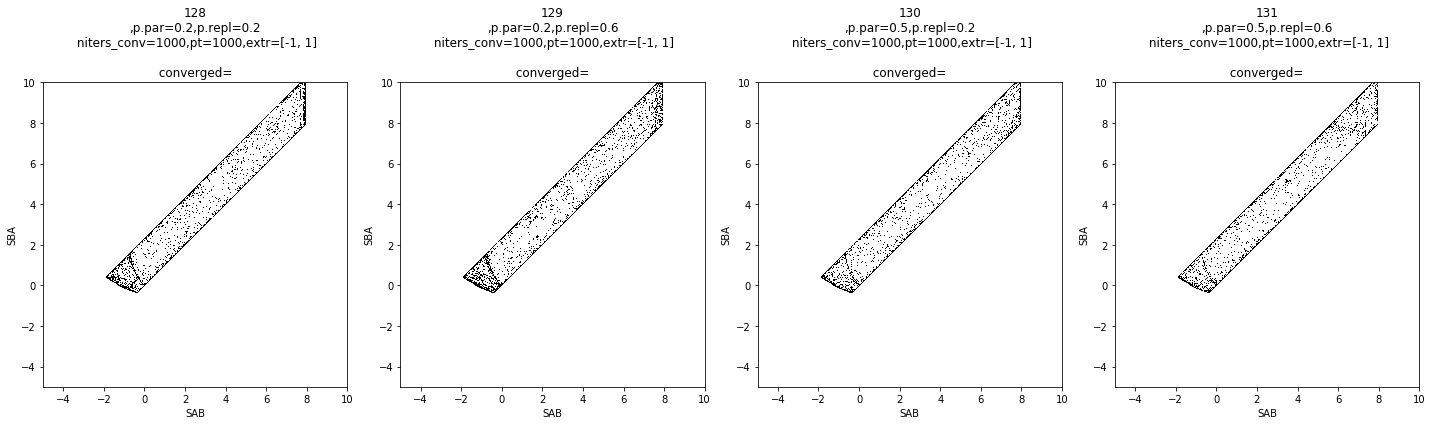

(601, 601)
difAD_samebnp_fcd=0.001_fcu=1000_fc1=10_fc2=10
[132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


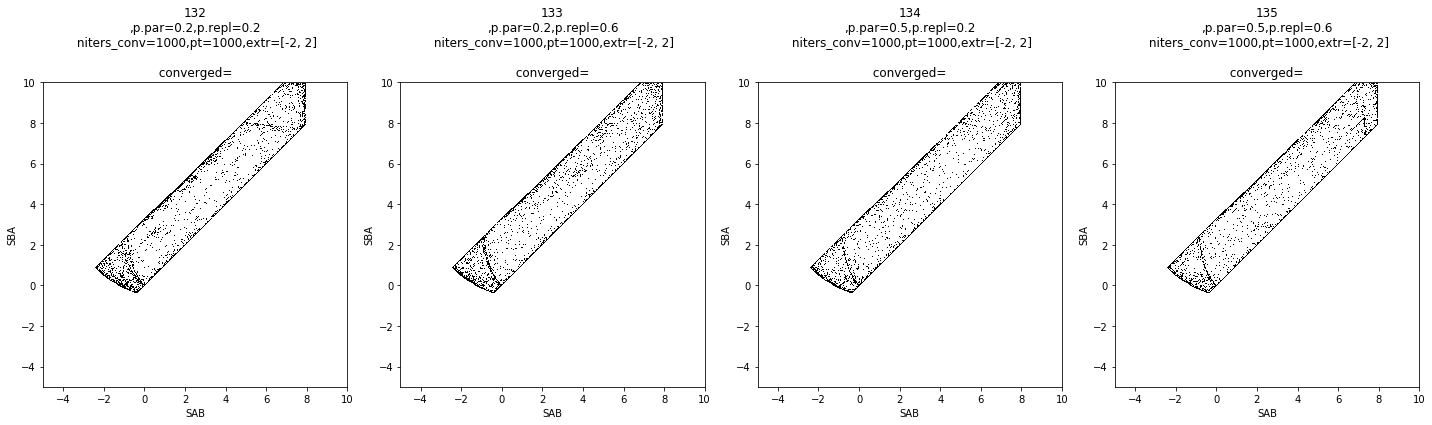

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


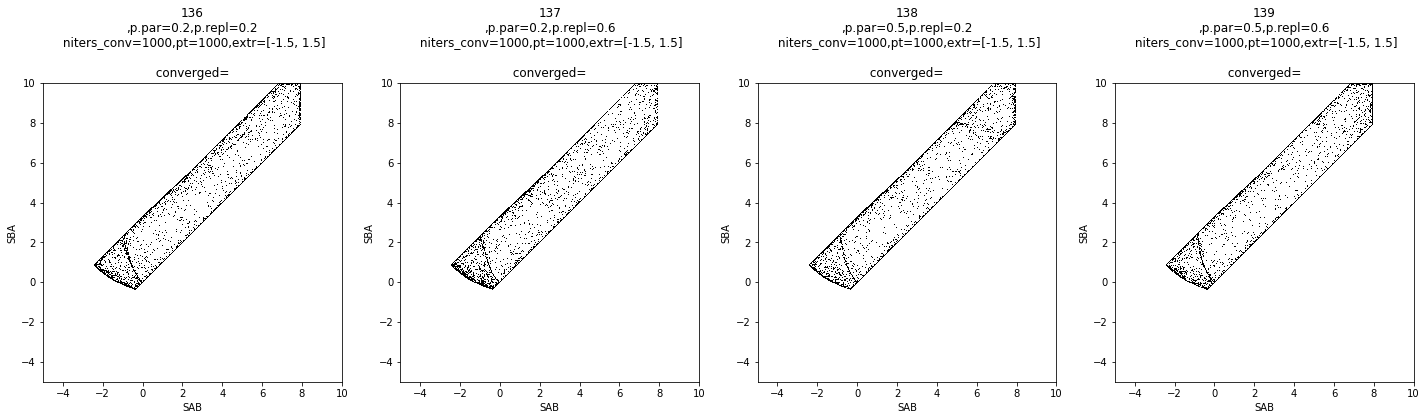

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


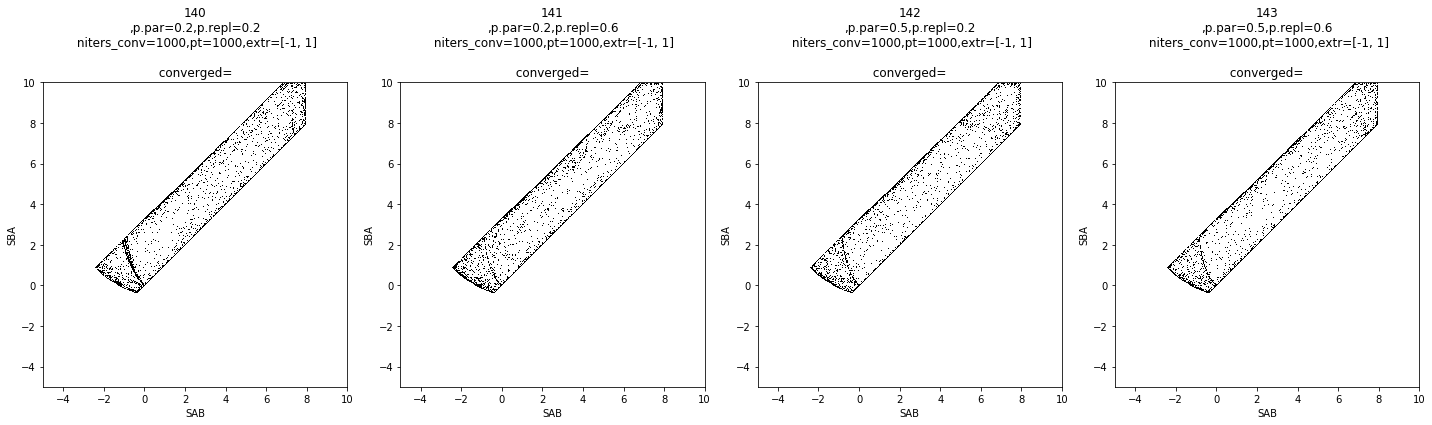

(601, 601)
difAD_samebnp_step12_fcd=0.001_fcu=1000_fc1=5_fc2=2
[144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


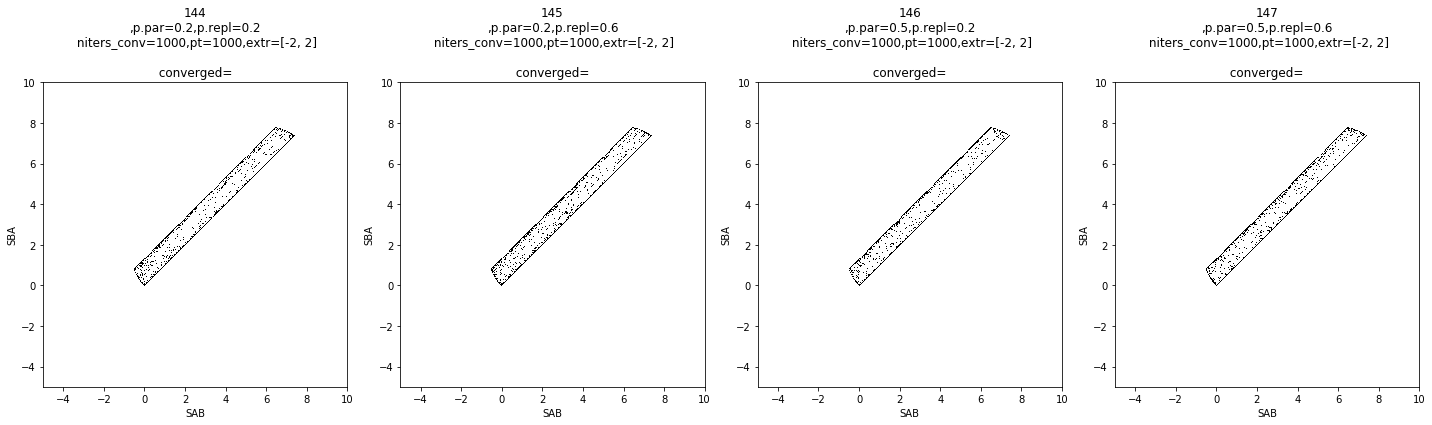

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


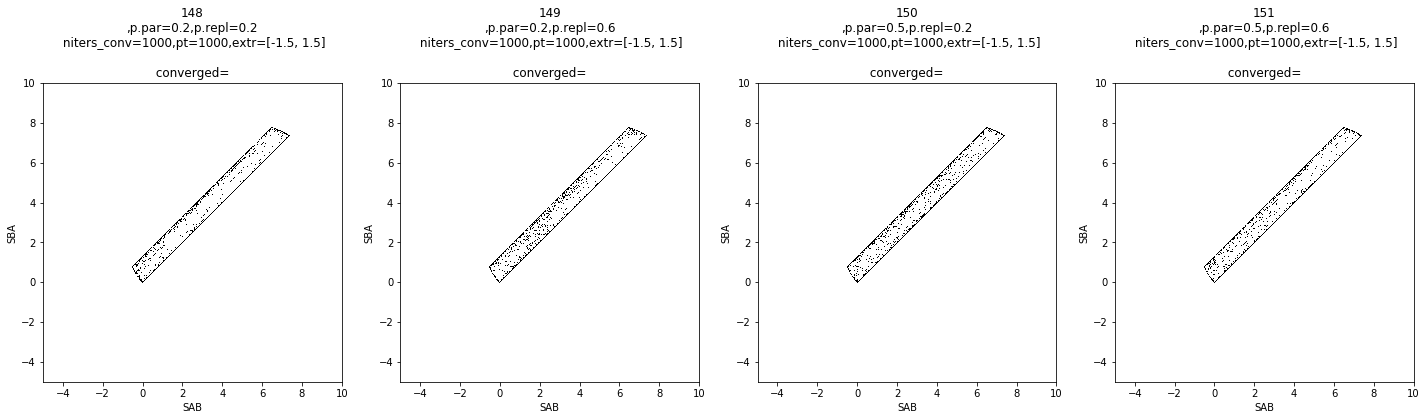

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


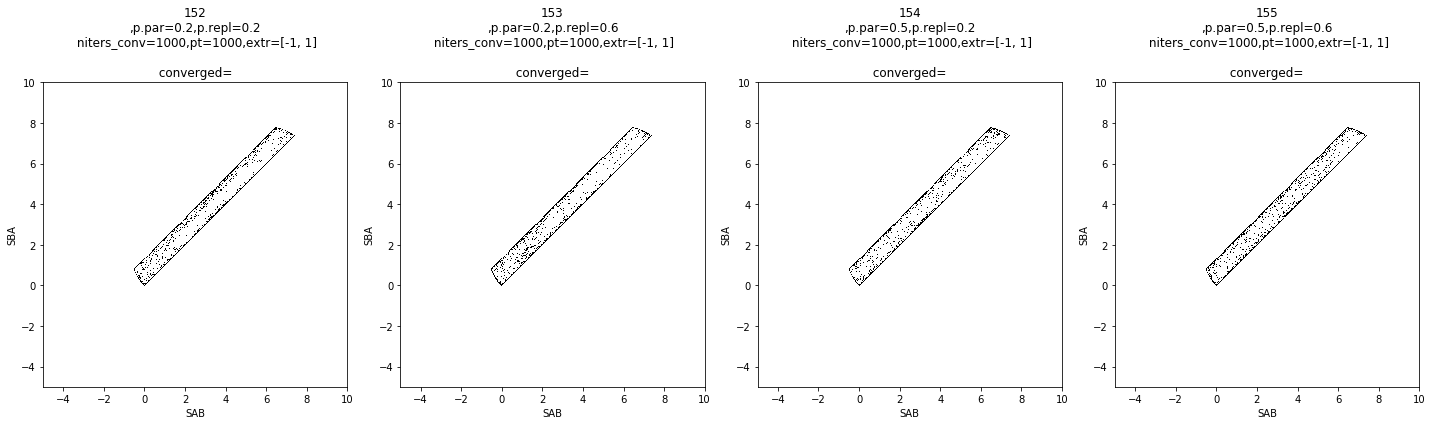

(601, 601)
difAD_samebnp_step12_fcd=0.001_fcu=1000_fc1=5_fc2=5
[156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


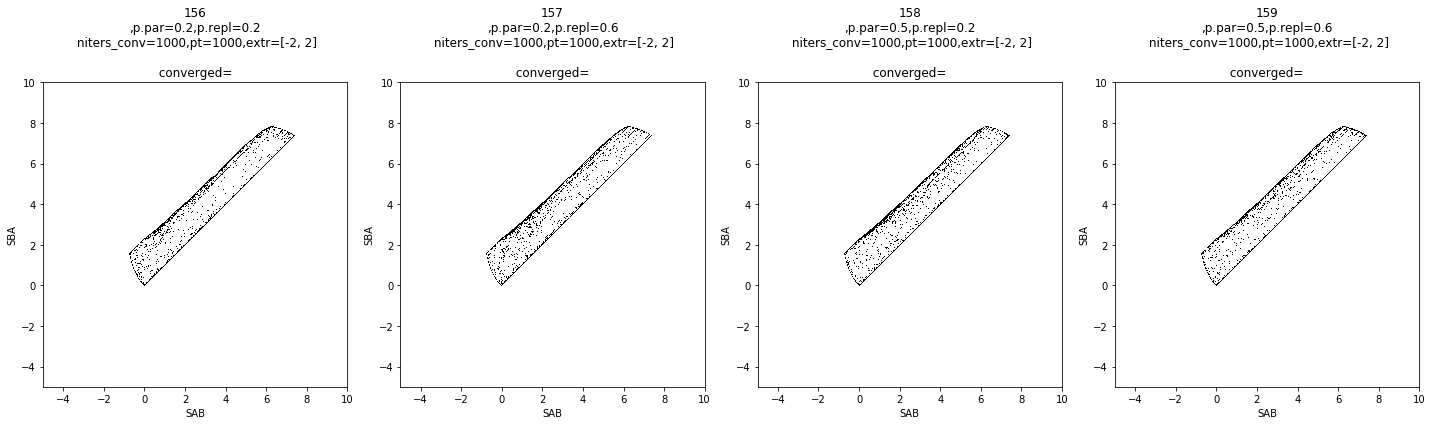

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


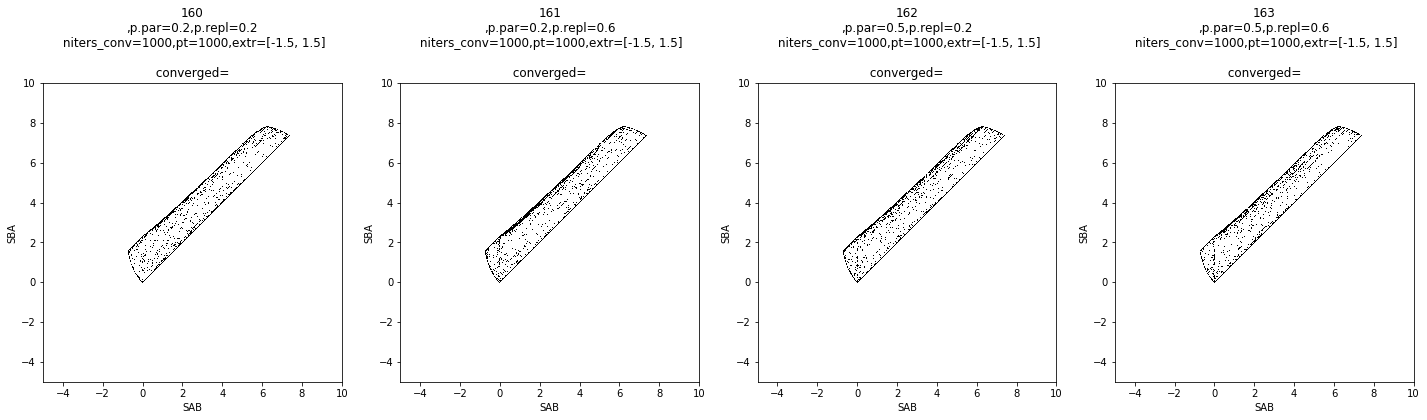

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


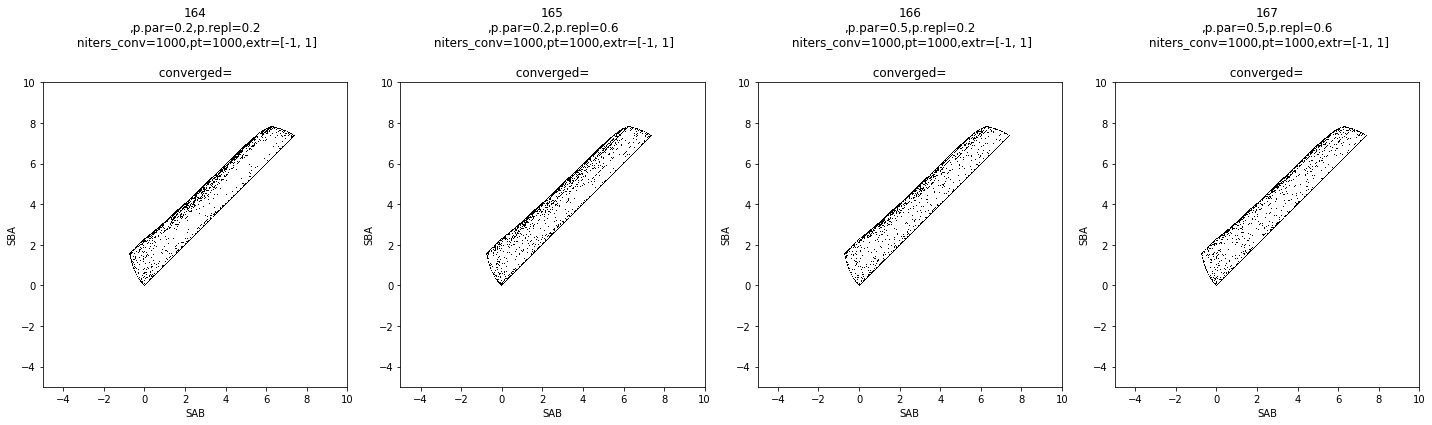

(601, 601)
difAD_samebnp_step12_fcd=0.001_fcu=1000_fc1=10_fc2=5
[168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


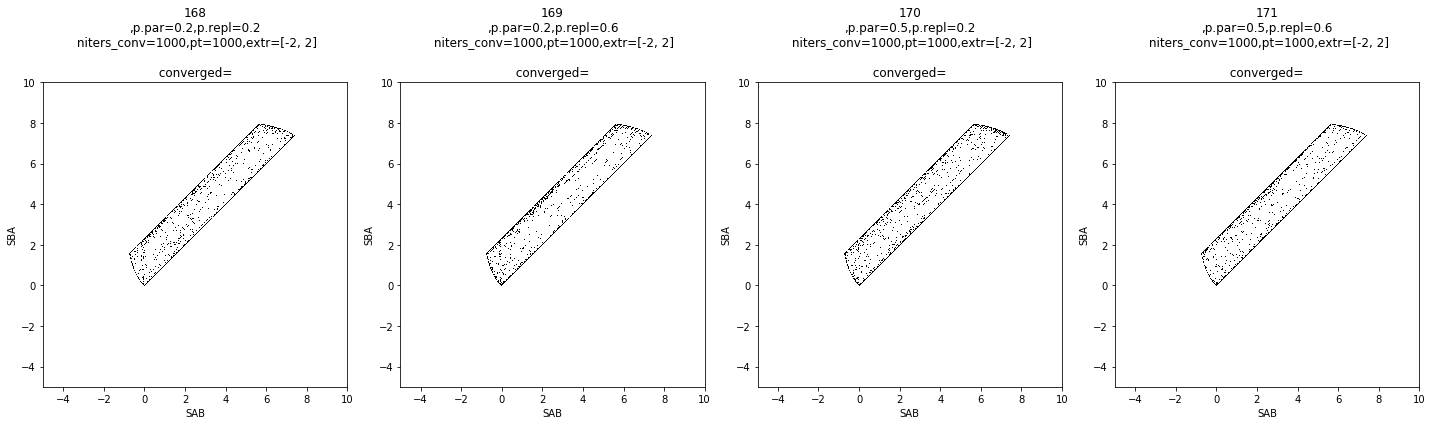

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


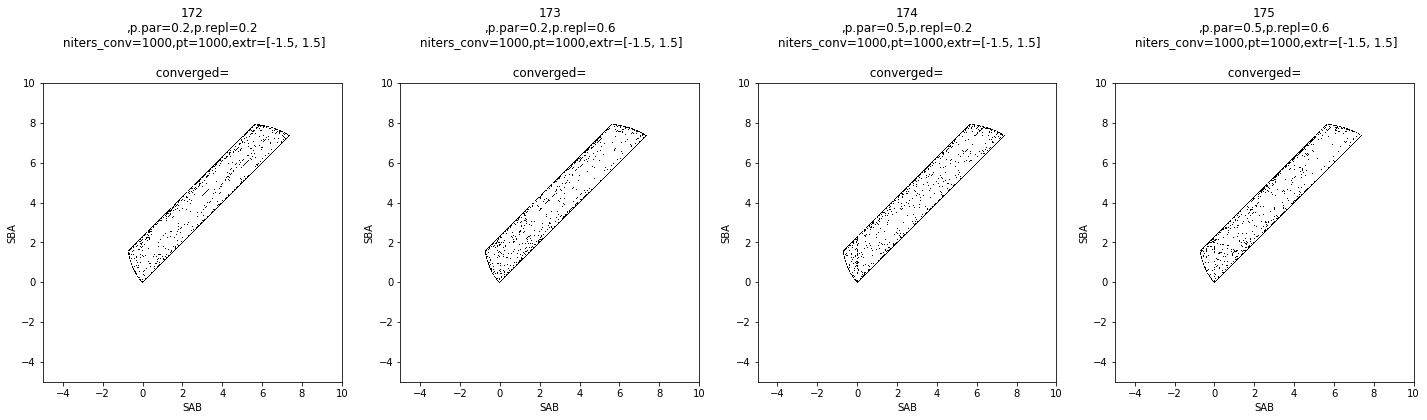

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


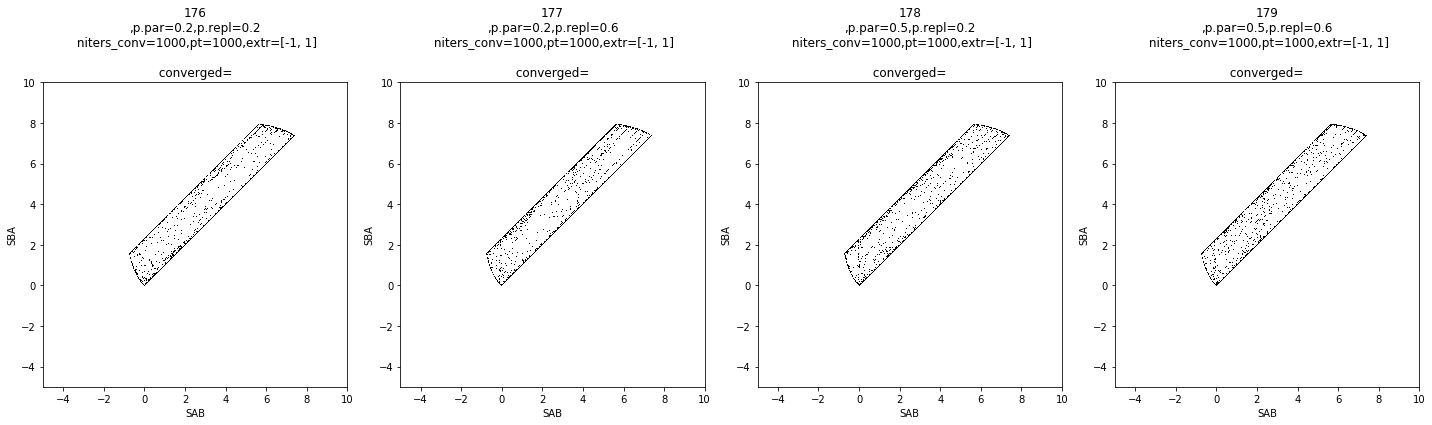

(601, 601)
difAD_samebnp_step12_fcd=0.001_fcu=1000_fc1=10_fc2=10
[180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


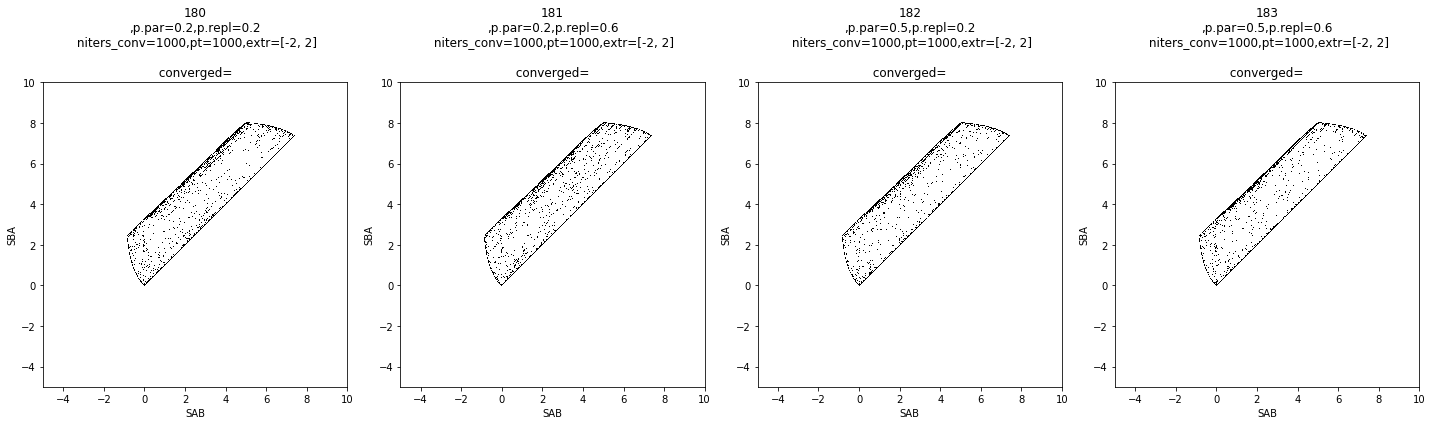

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


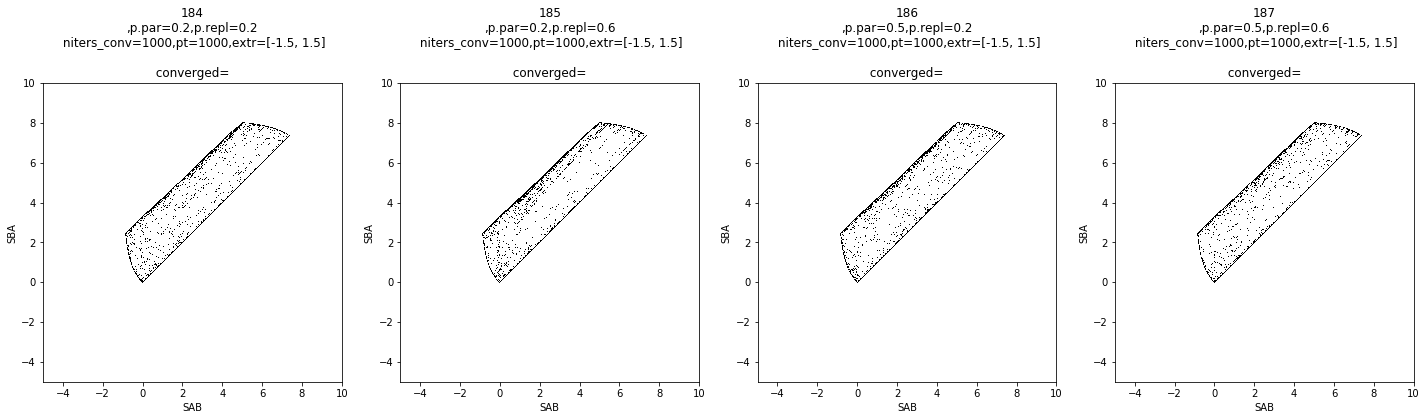

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


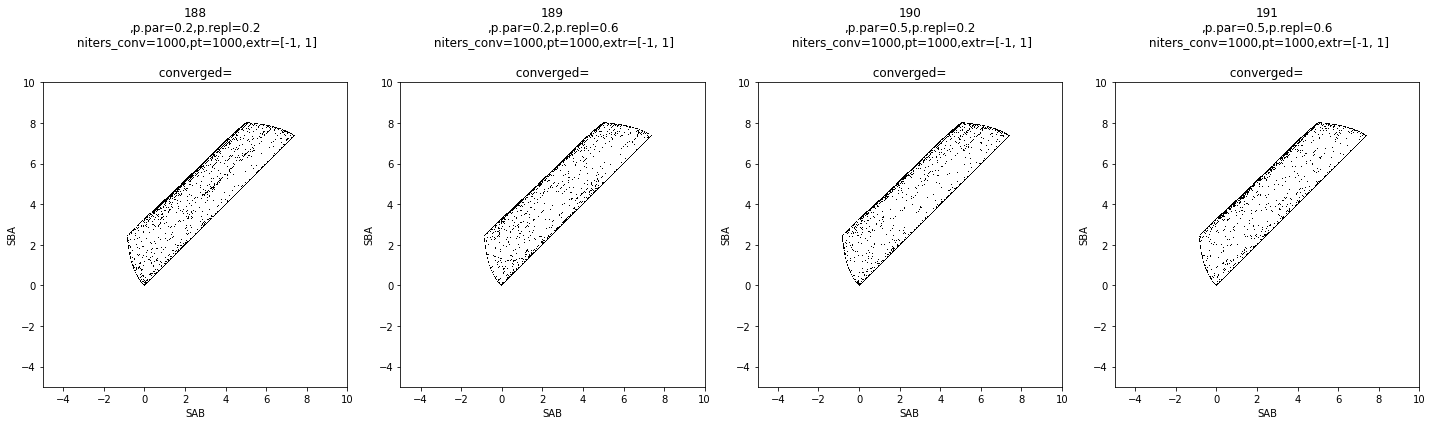

(601, 601)
difAD_samebnp_step13_fcd=0.001_fcu=1000_fc1=5_fc2=2
[192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


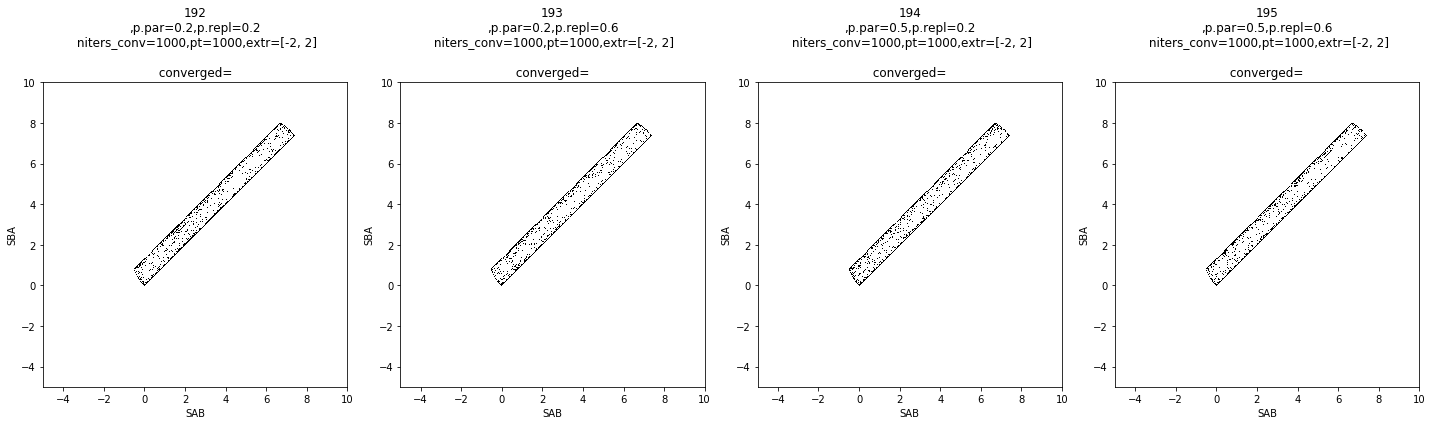

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


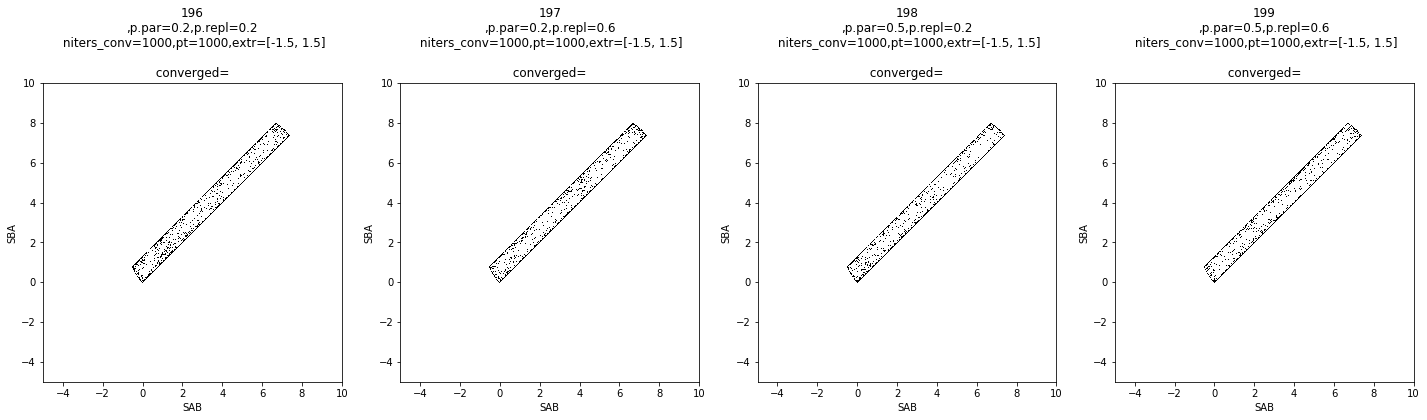

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


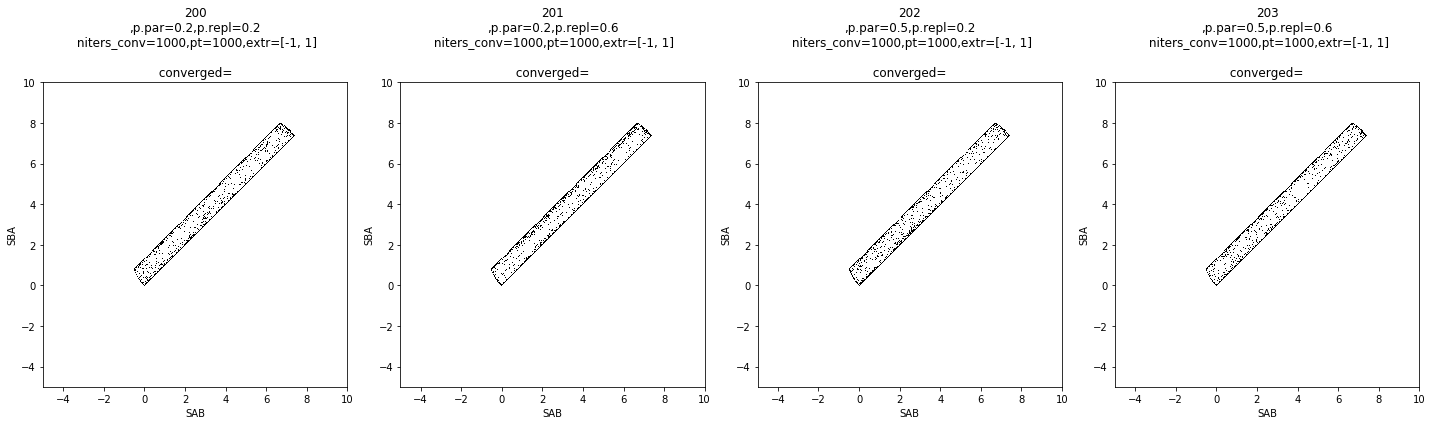

(601, 601)
difAD_samebnp_step13_fcd=0.001_fcu=1000_fc1=5_fc2=5
[204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


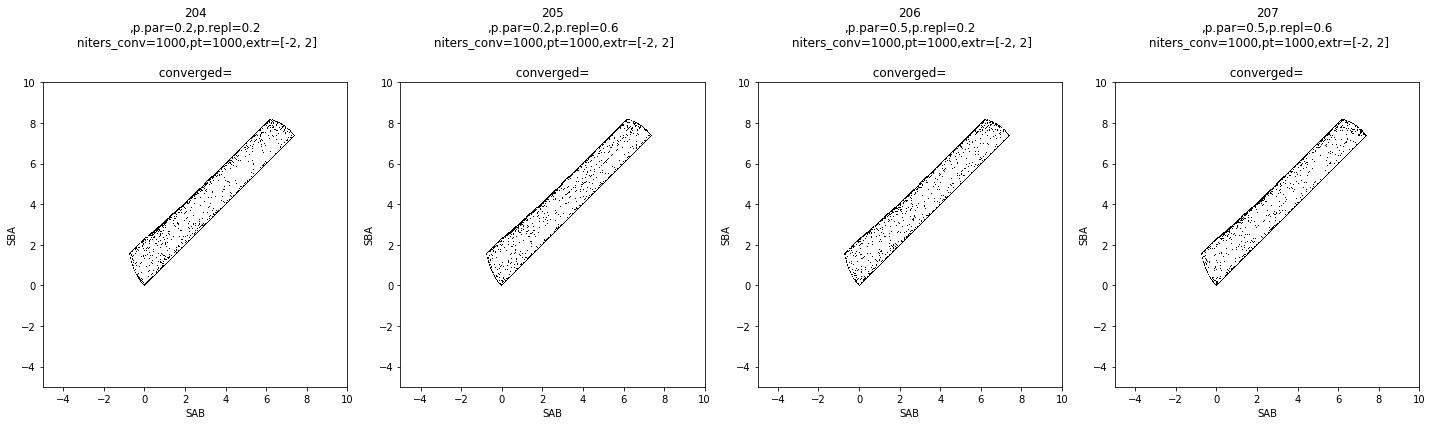

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


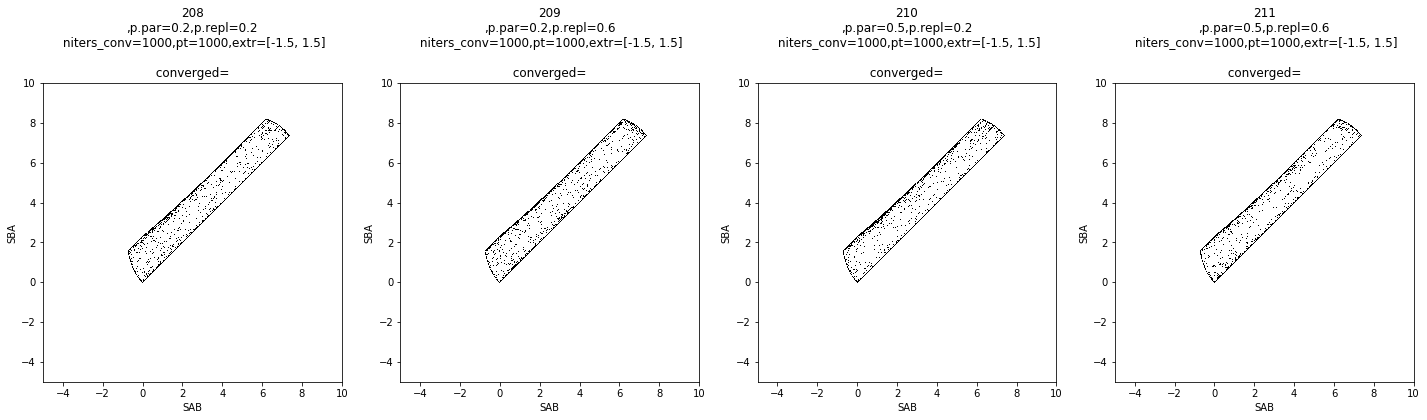

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


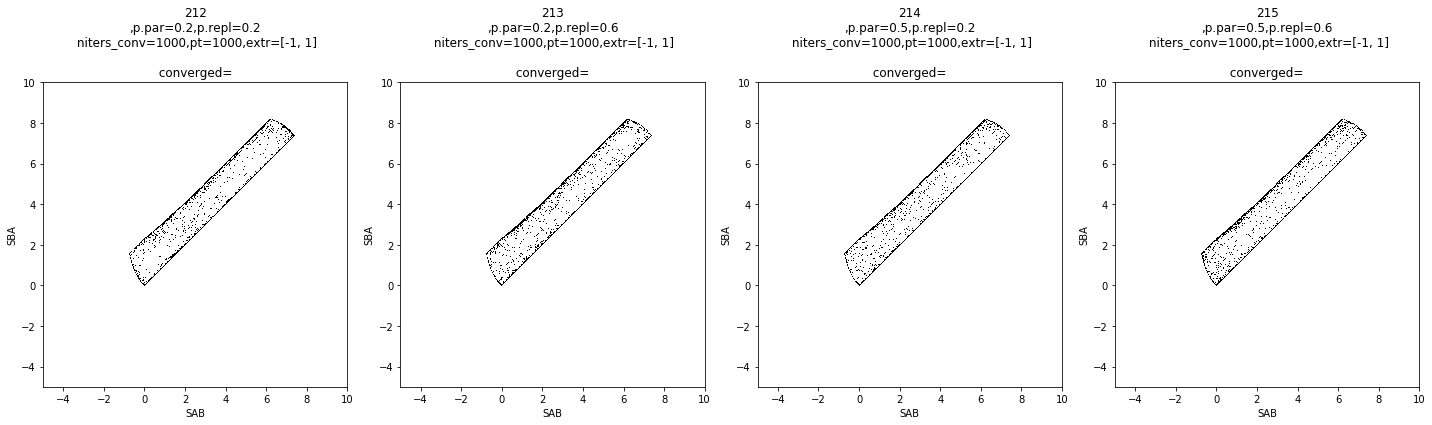

(601, 601)
difAD_samebnp_step13_fcd=0.001_fcu=1000_fc1=10_fc2=5
[216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


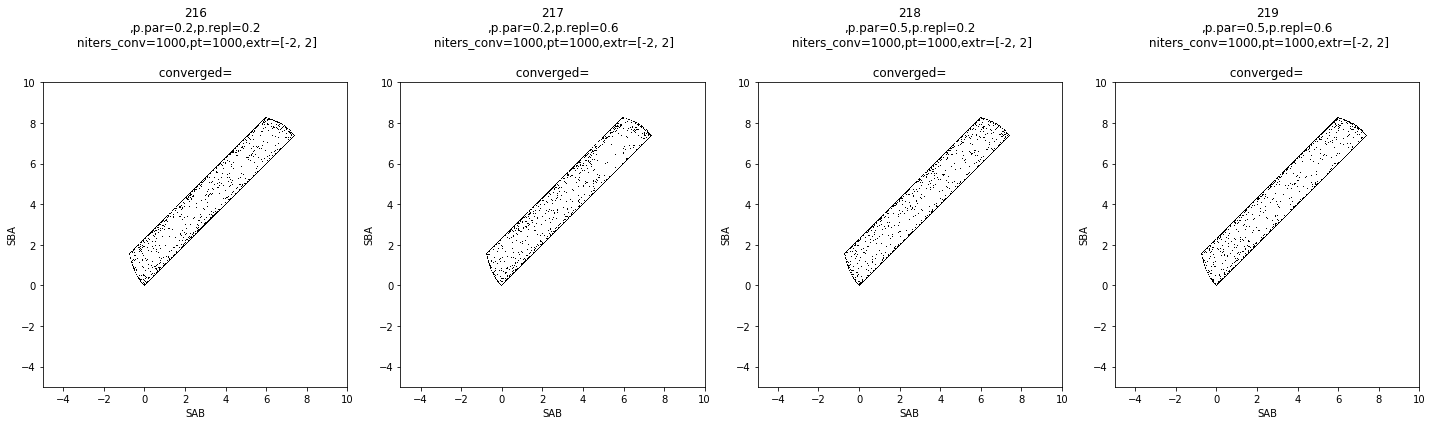

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


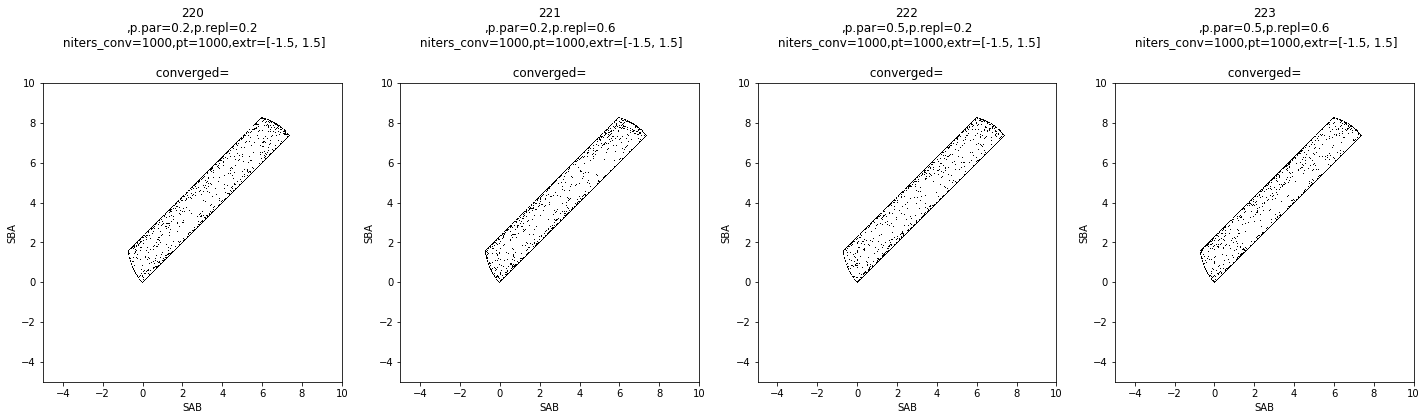

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


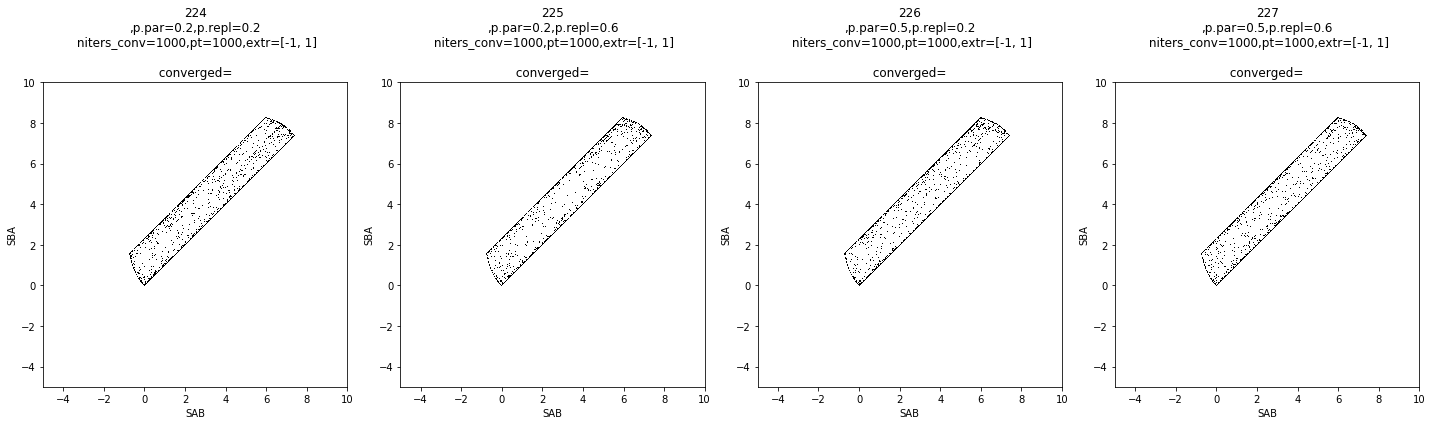

(601, 601)
difAD_samebnp_step13_fcd=0.001_fcu=1000_fc1=10_fc2=10
[228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


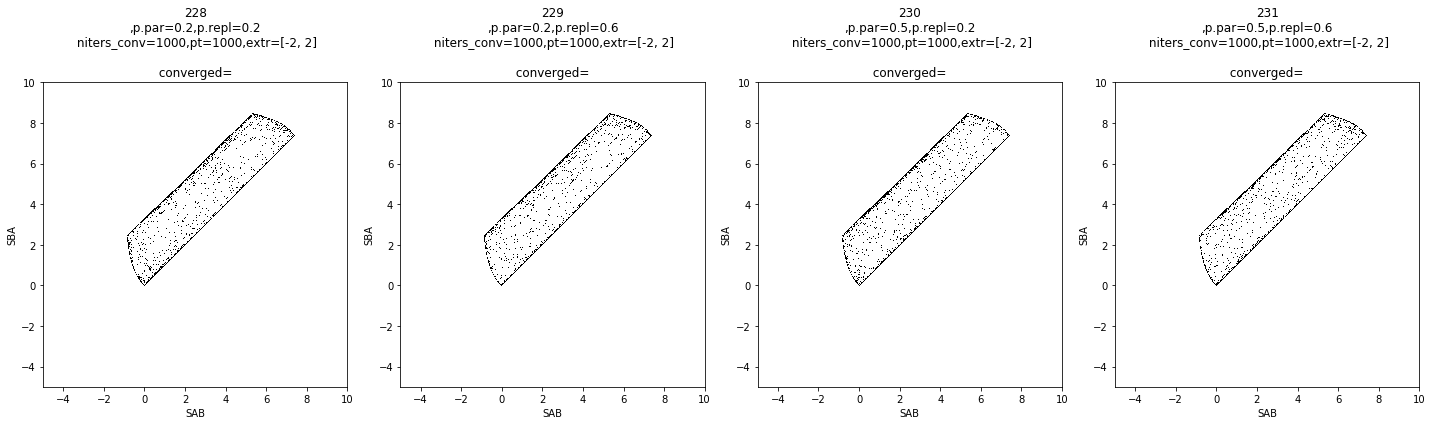

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


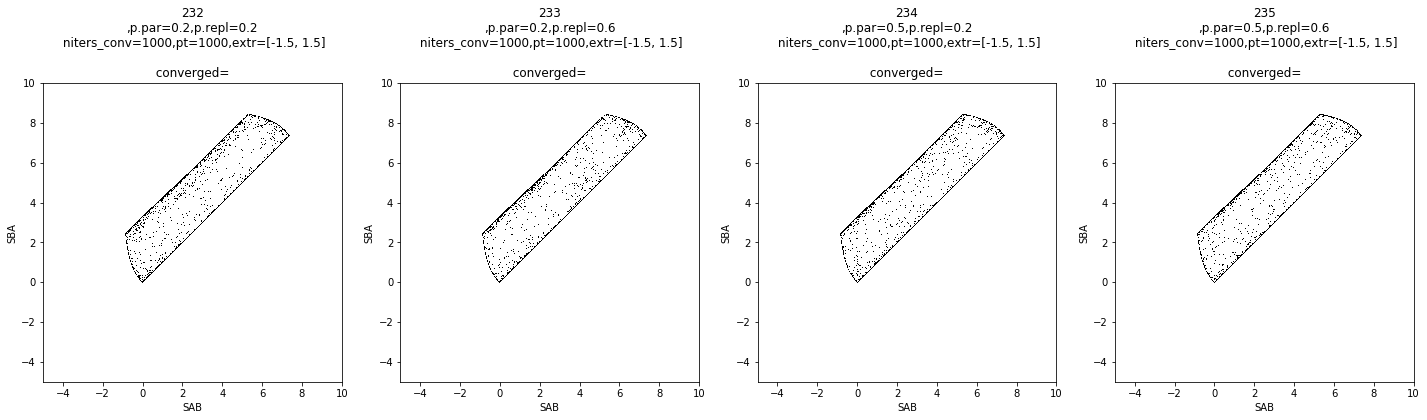

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


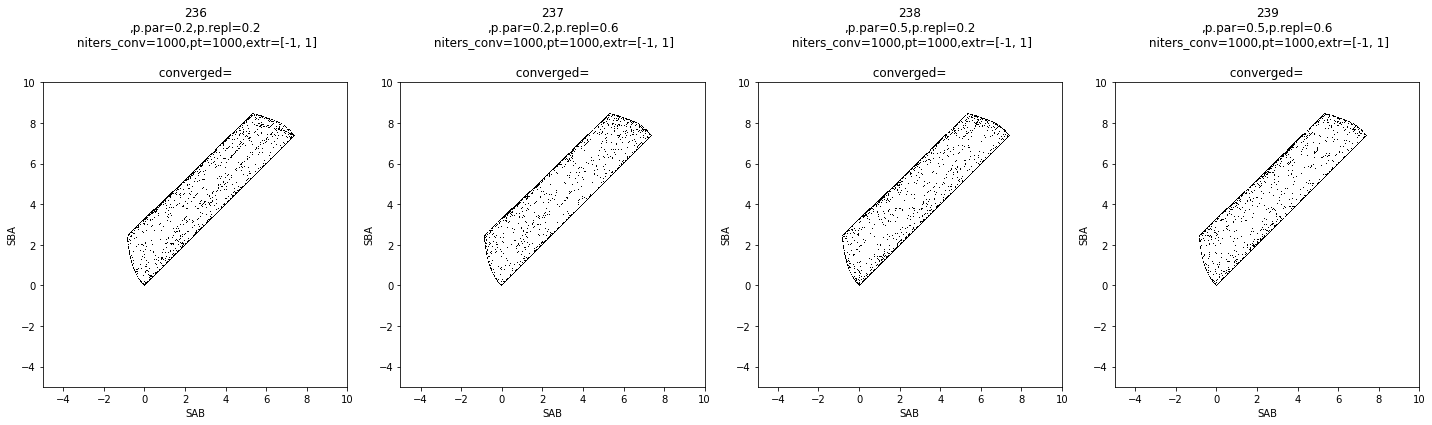

(601, 601)
difAD_samebnp_step23_fcd=0.001_fcu=1000_fc1=5_fc2=2
[240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


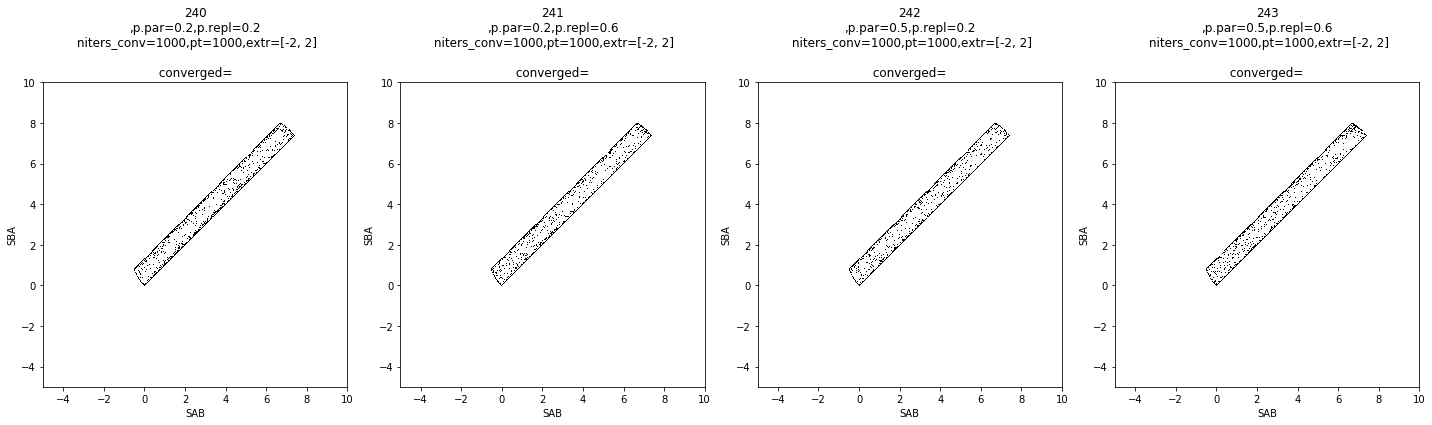

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


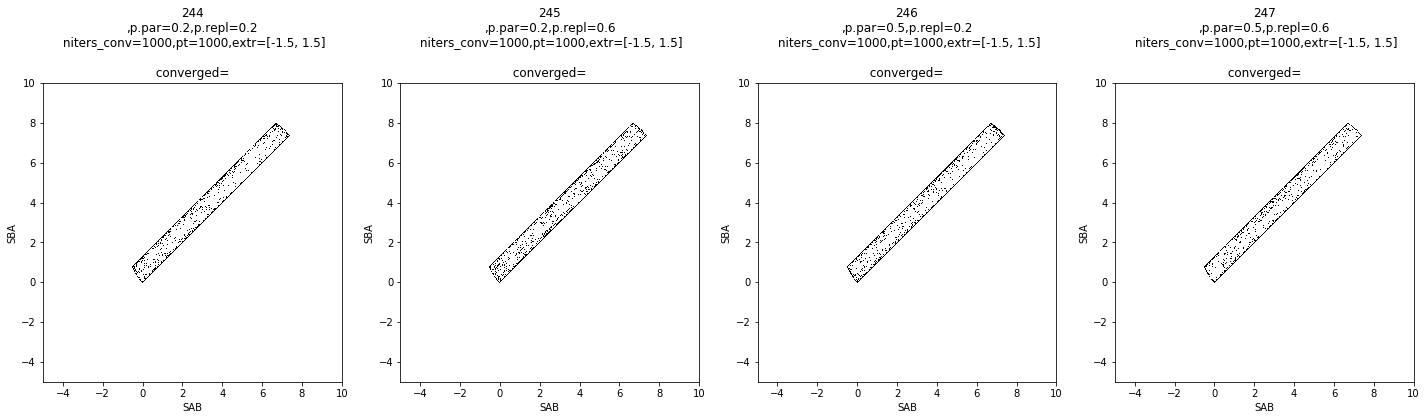

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


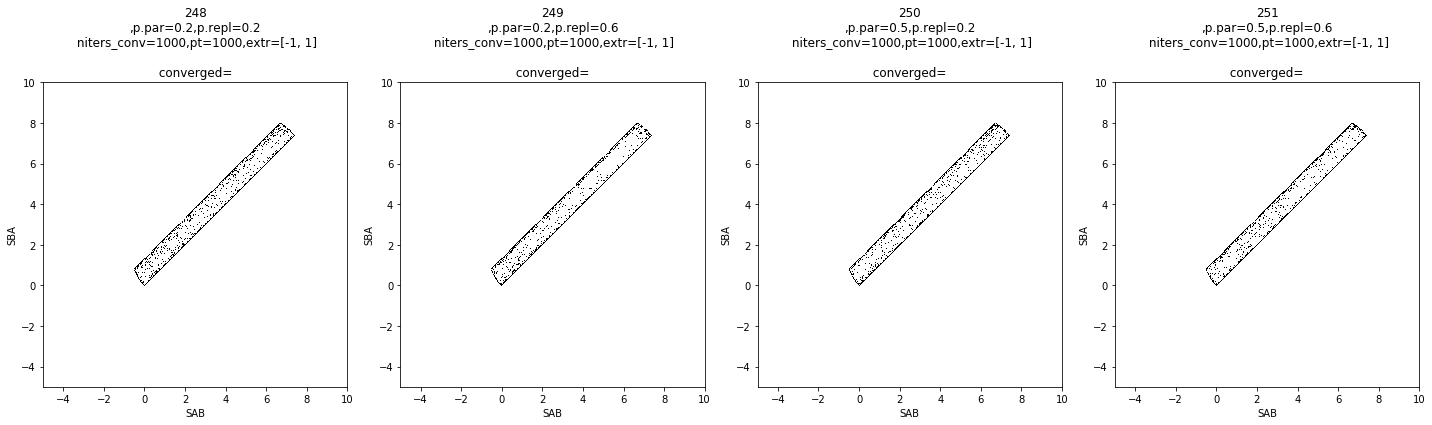

(601, 601)
difAD_samebnp_step23_fcd=0.001_fcu=1000_fc1=5_fc2=5
[252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


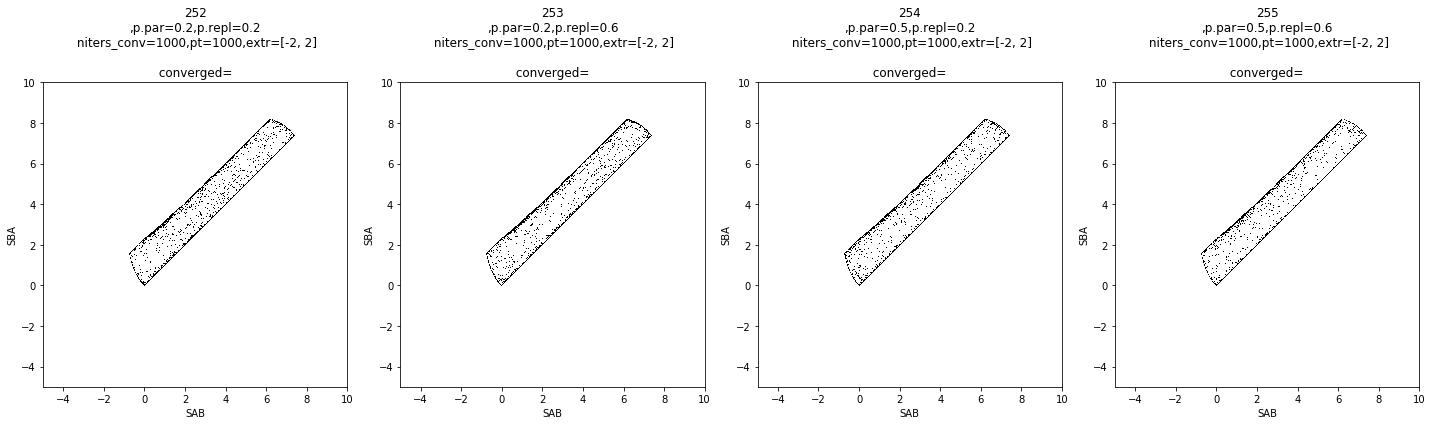

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


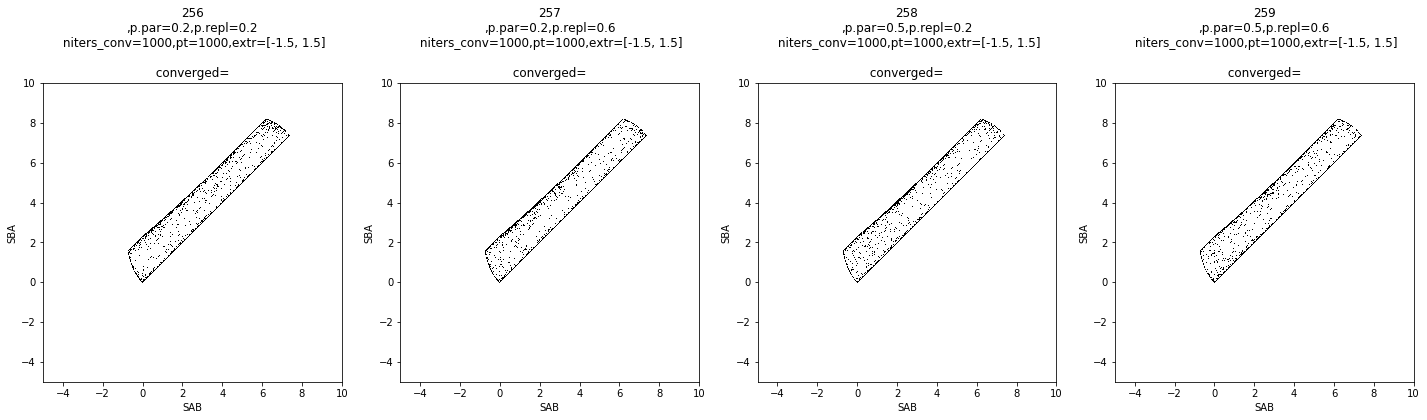

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


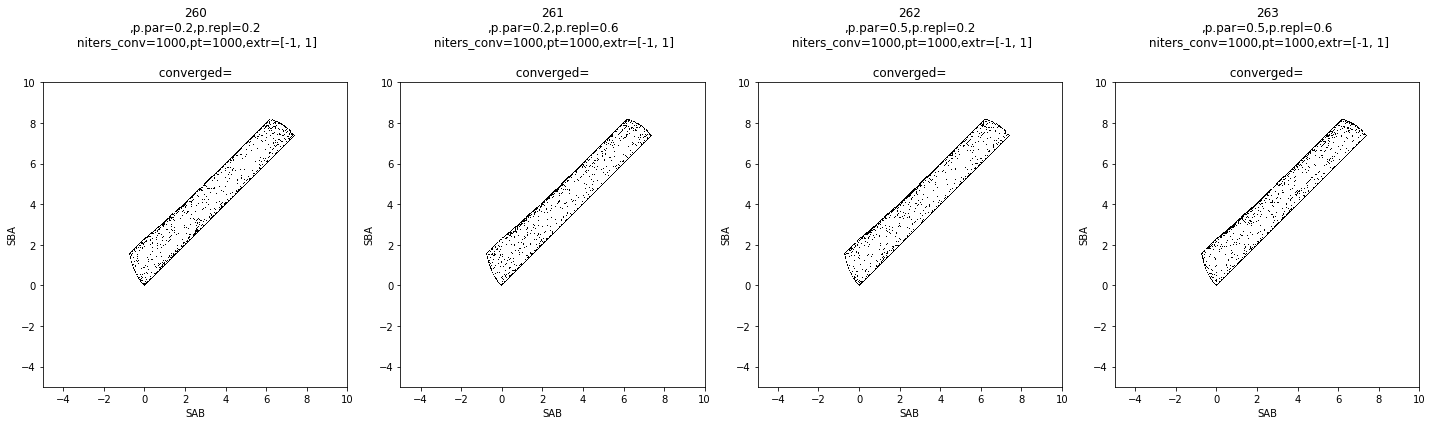

(601, 601)
difAD_samebnp_step23_fcd=0.001_fcu=1000_fc1=10_fc2=5
[264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


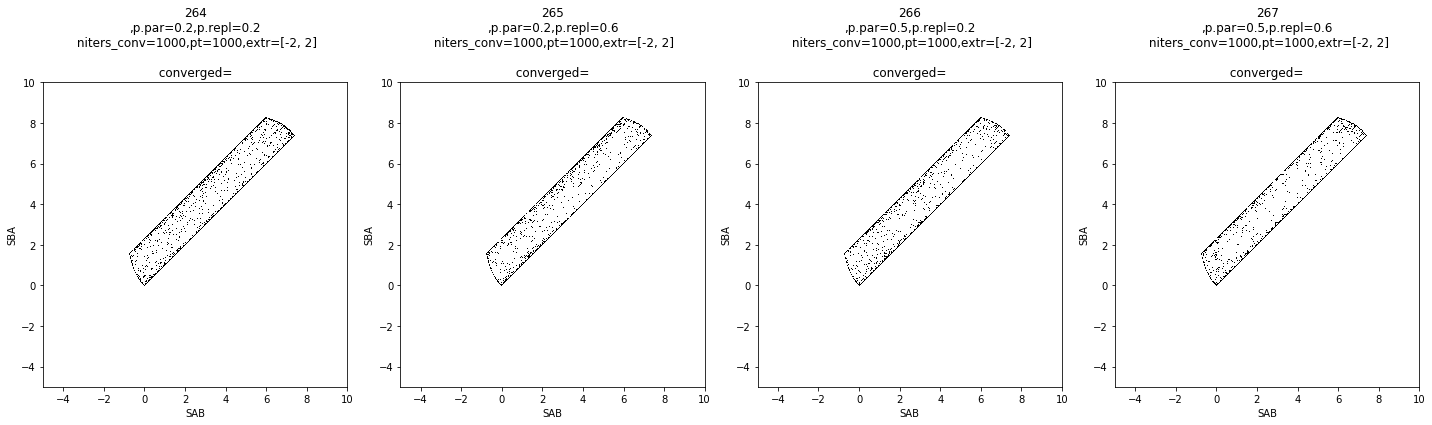

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


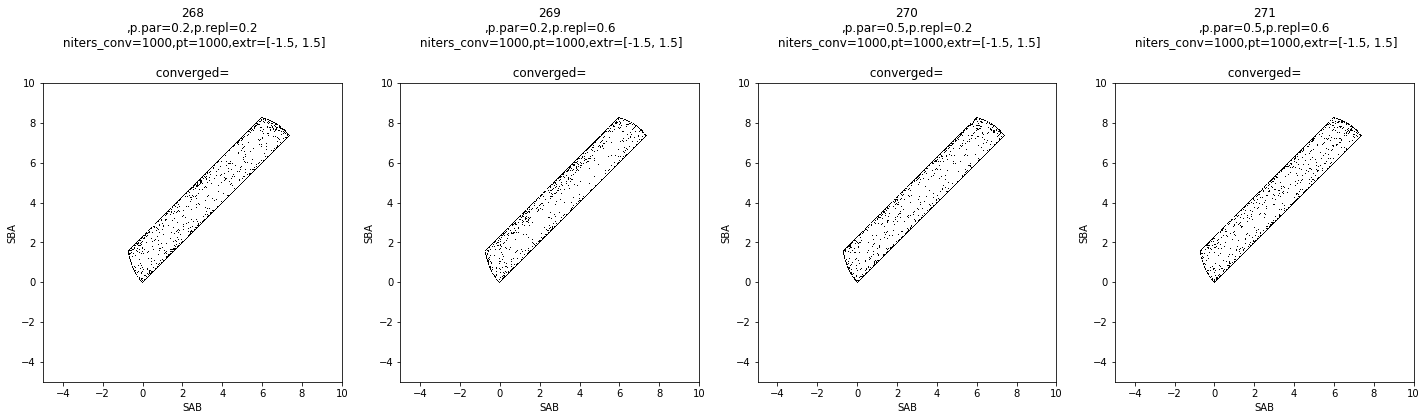

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


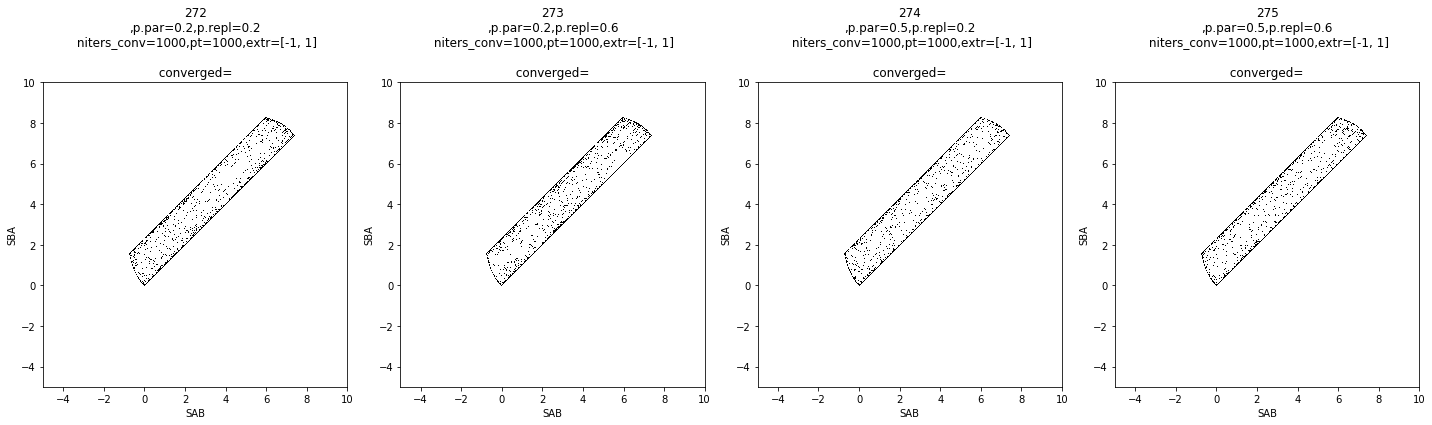

(601, 601)
difAD_samebnp_step23_fcd=0.001_fcu=1000_fc1=10_fc2=10
[276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


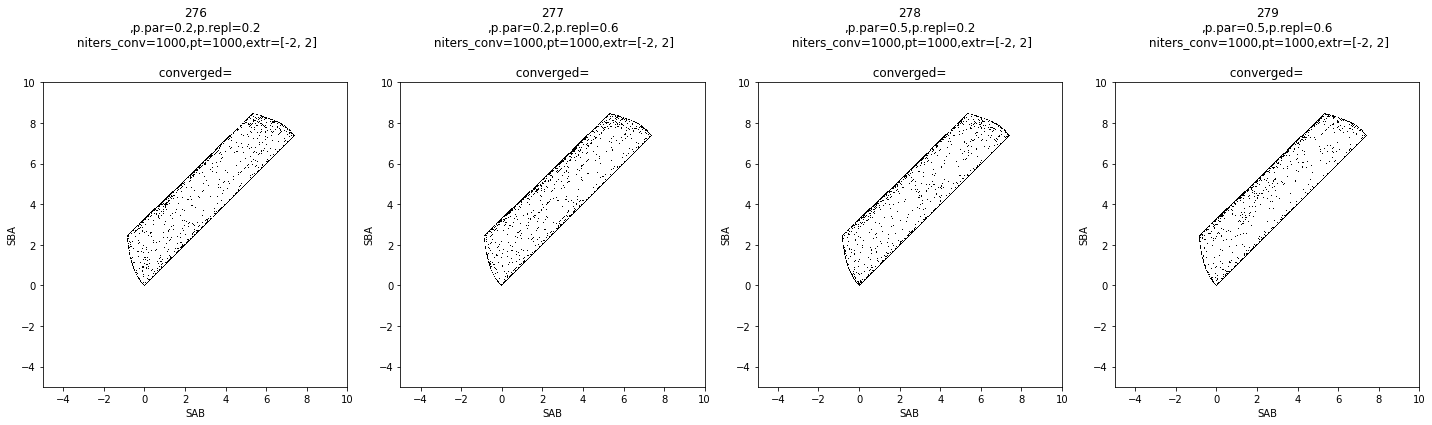

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


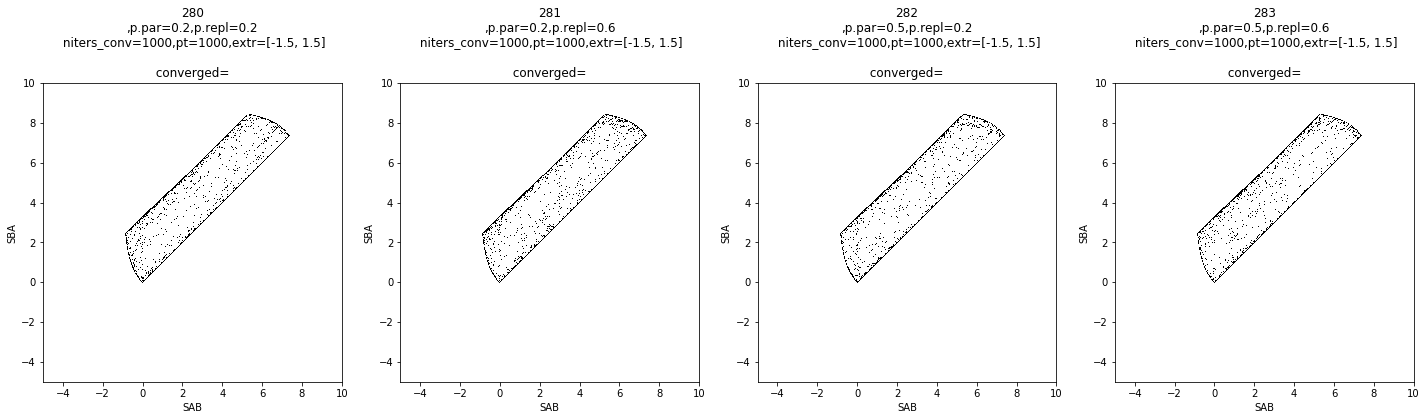

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


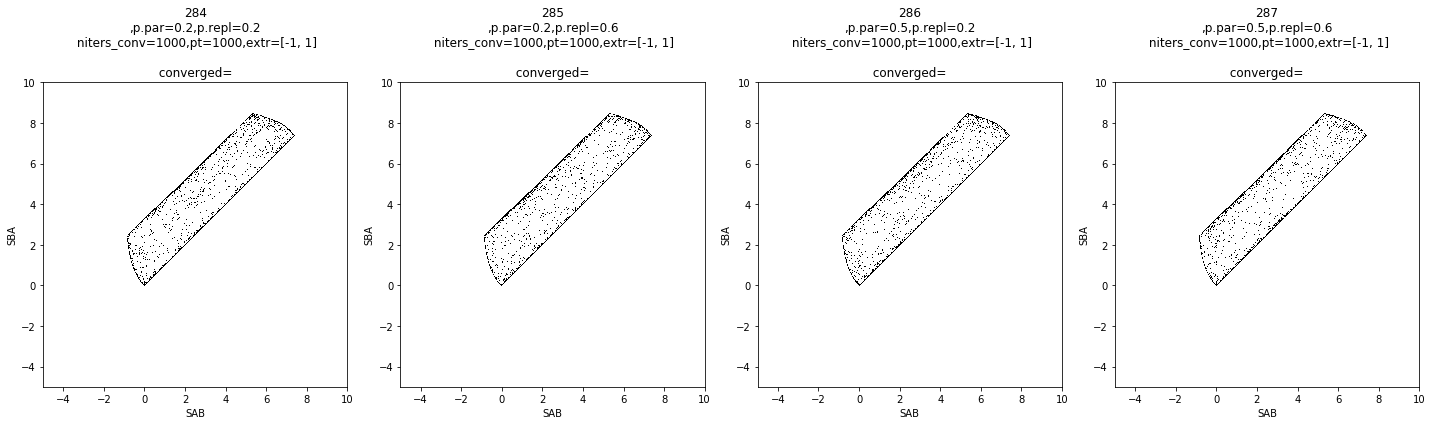

(601, 601)
difAD_samebnp_step11_fcd=0.001_fcu=1000_fc1=5_fc2=2
[288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


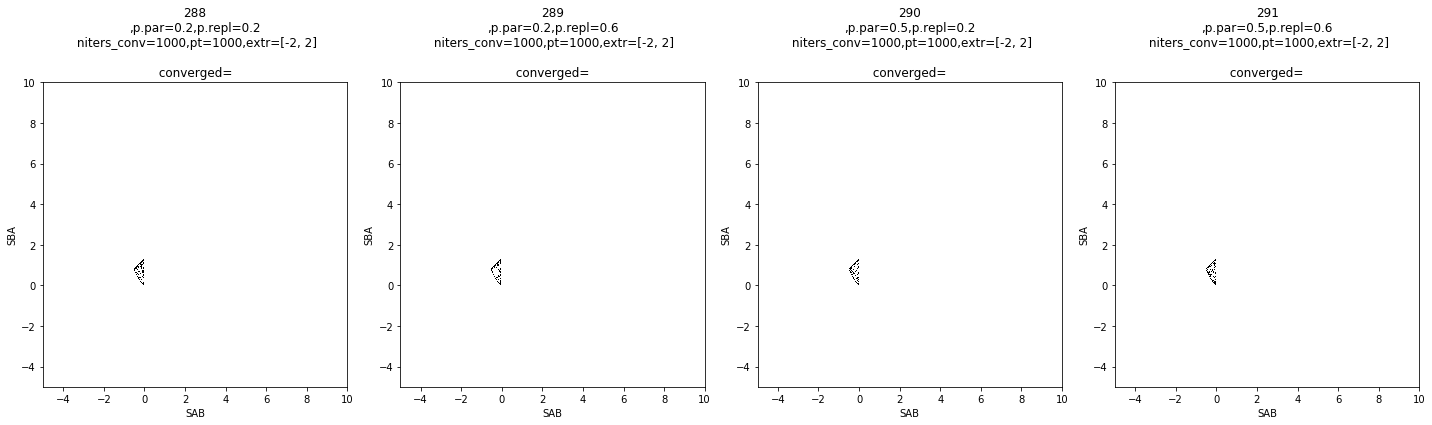

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


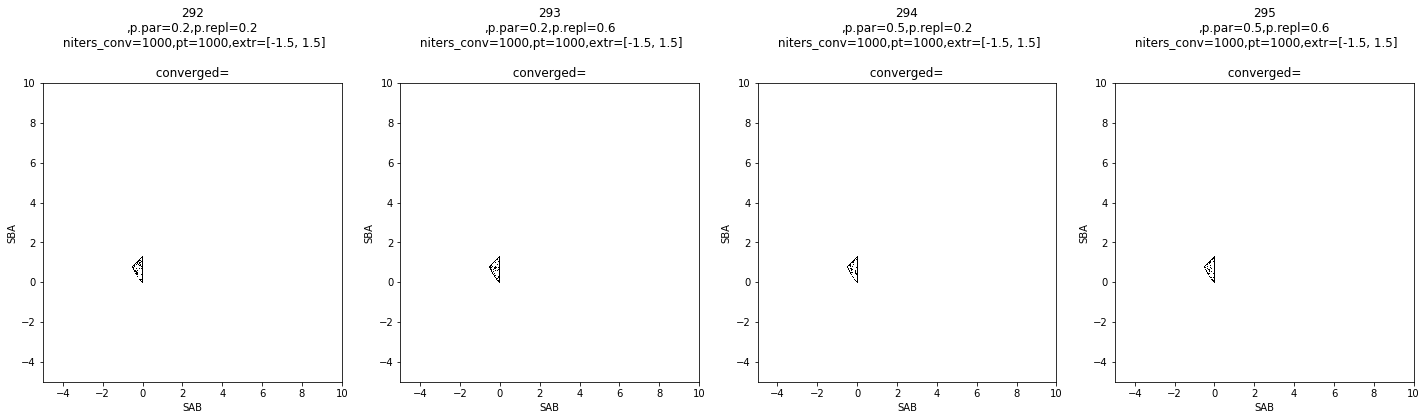

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


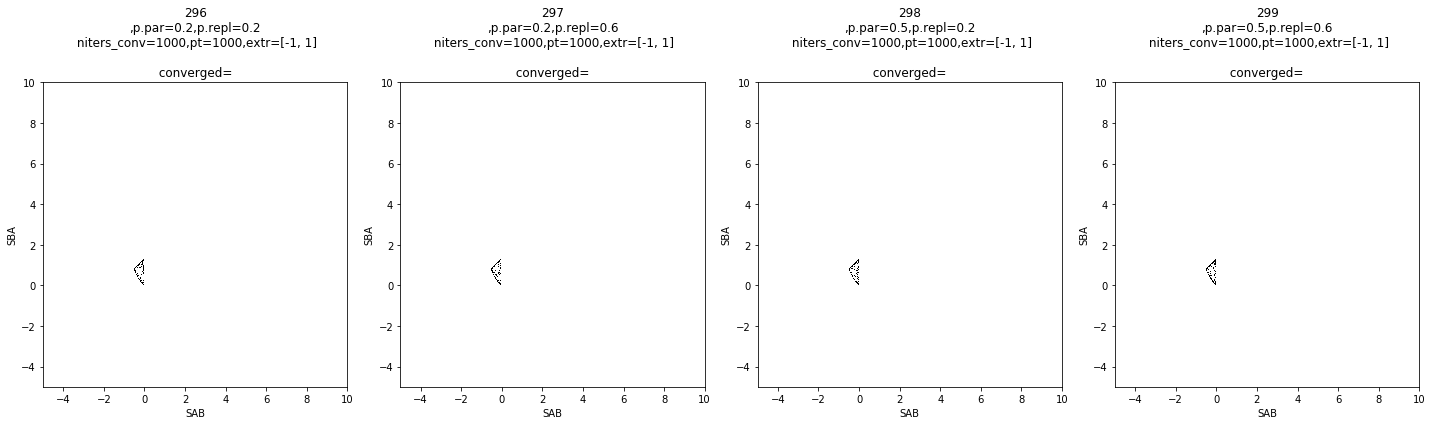

(601, 601)
difAD_samebnp_step11_fcd=0.001_fcu=1000_fc1=5_fc2=5
[300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


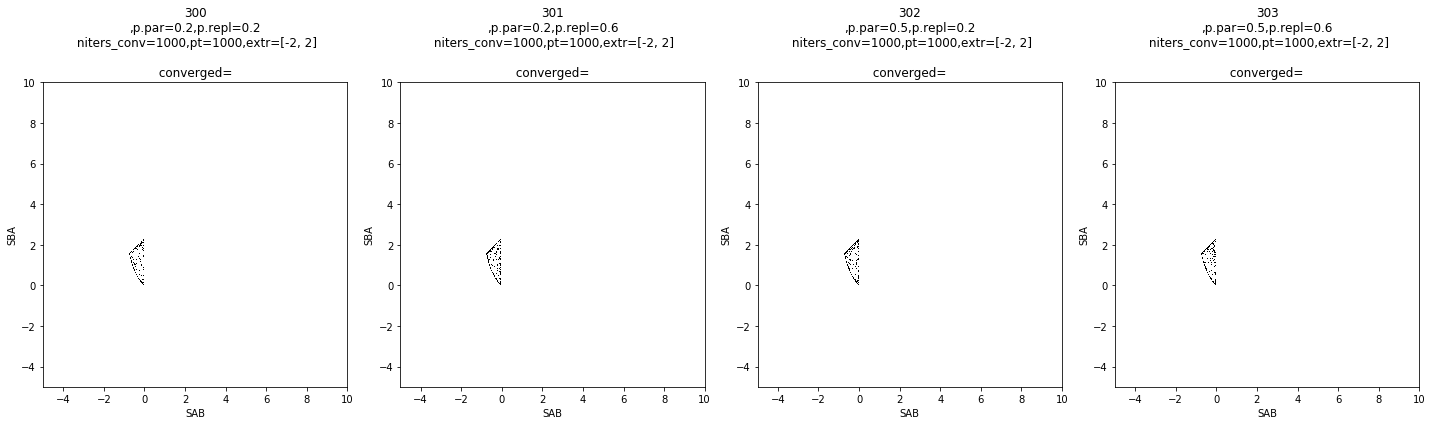

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


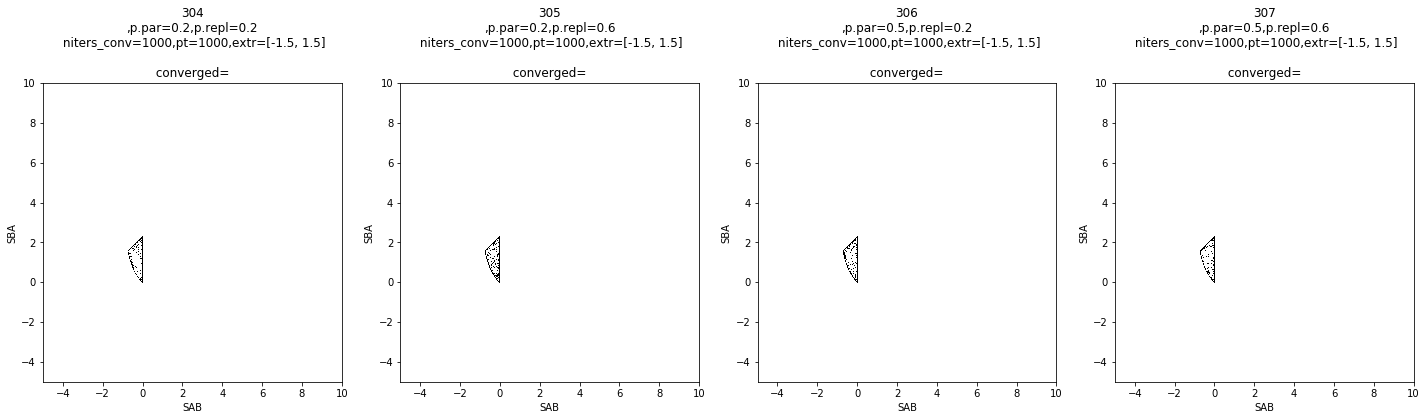

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


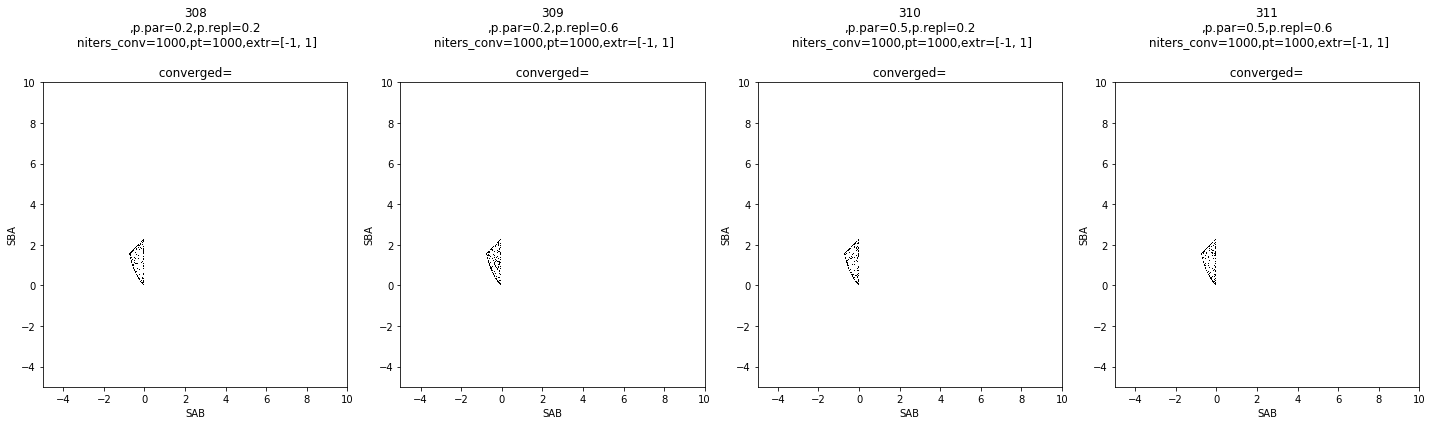

(601, 601)
difAD_samebnp_step11_fcd=0.001_fcu=1000_fc1=10_fc2=5
[312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


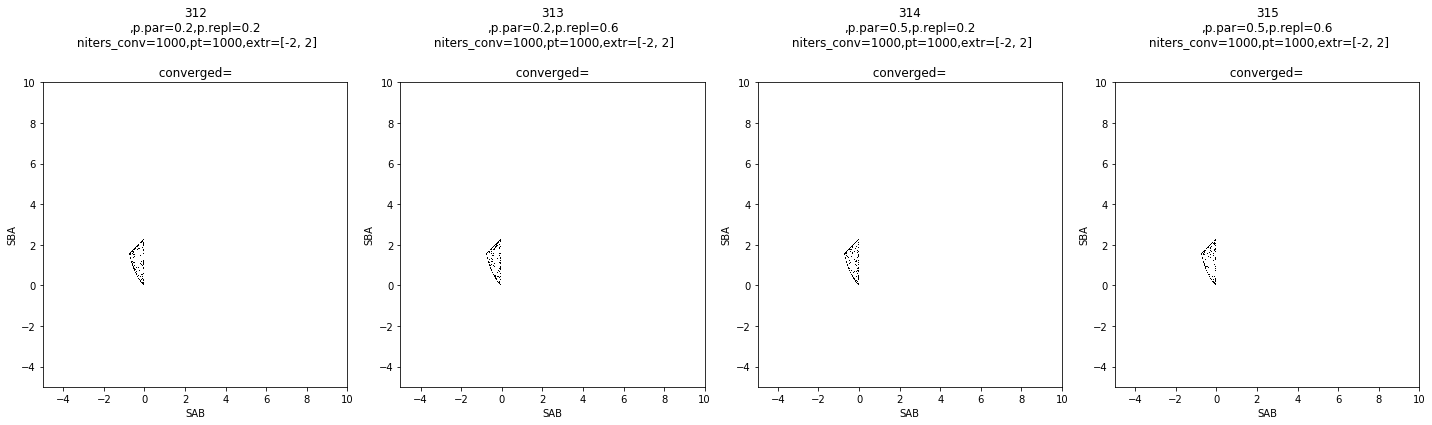

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


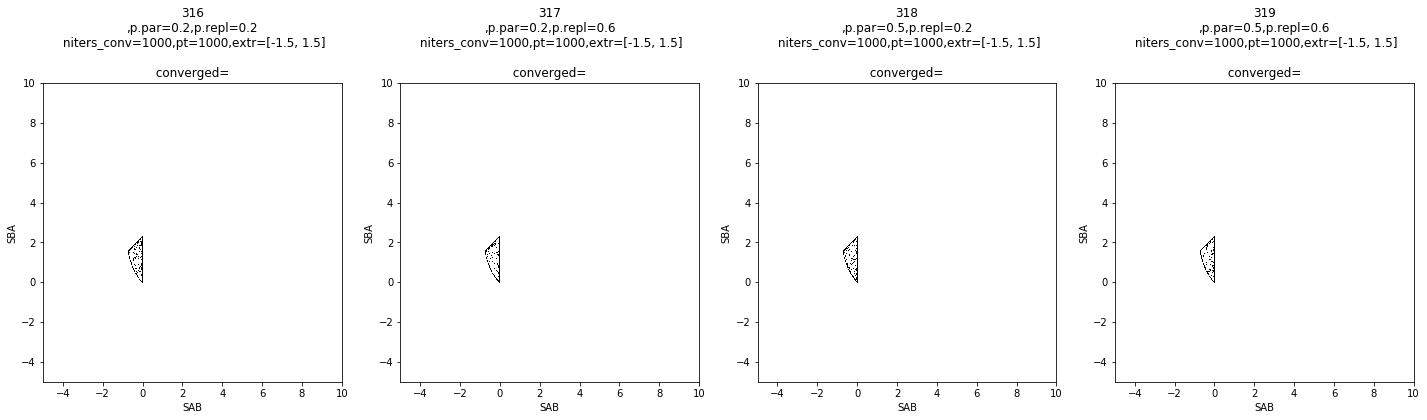

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


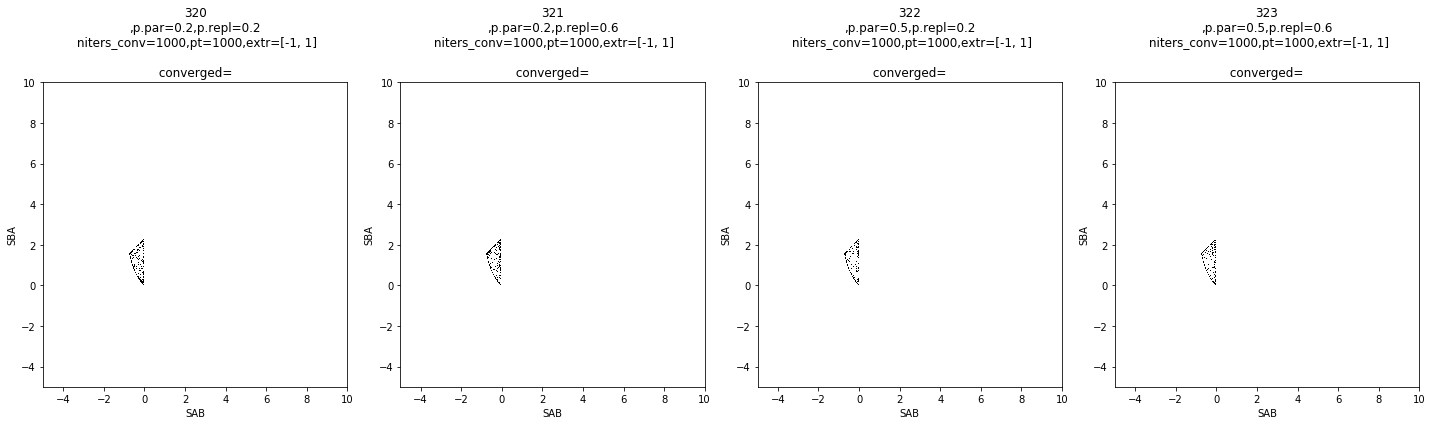

(601, 601)
difAD_samebnp_step11_fcd=0.001_fcu=1000_fc1=10_fc2=10
[324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


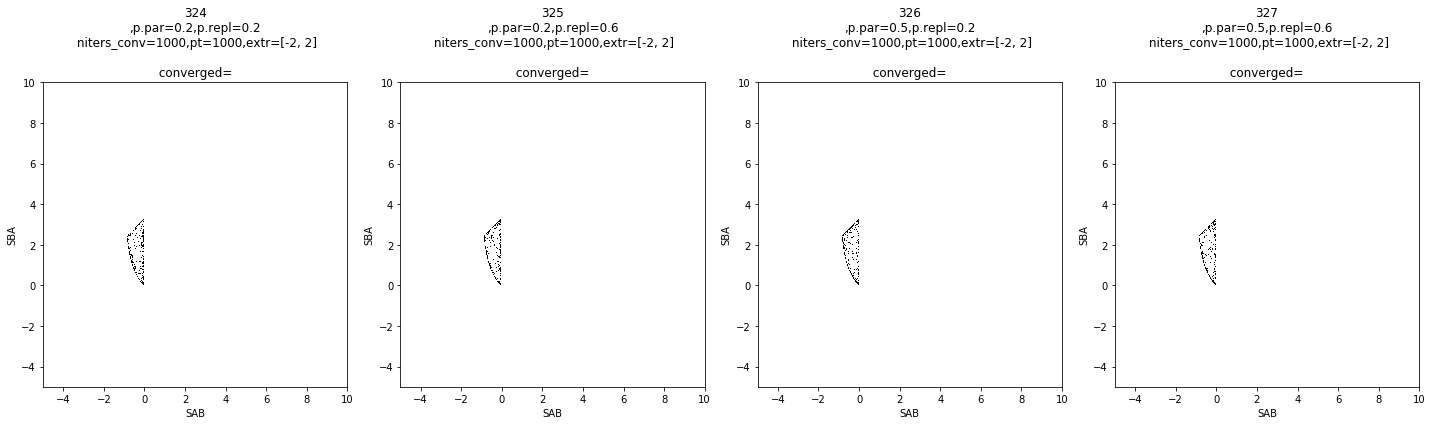

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


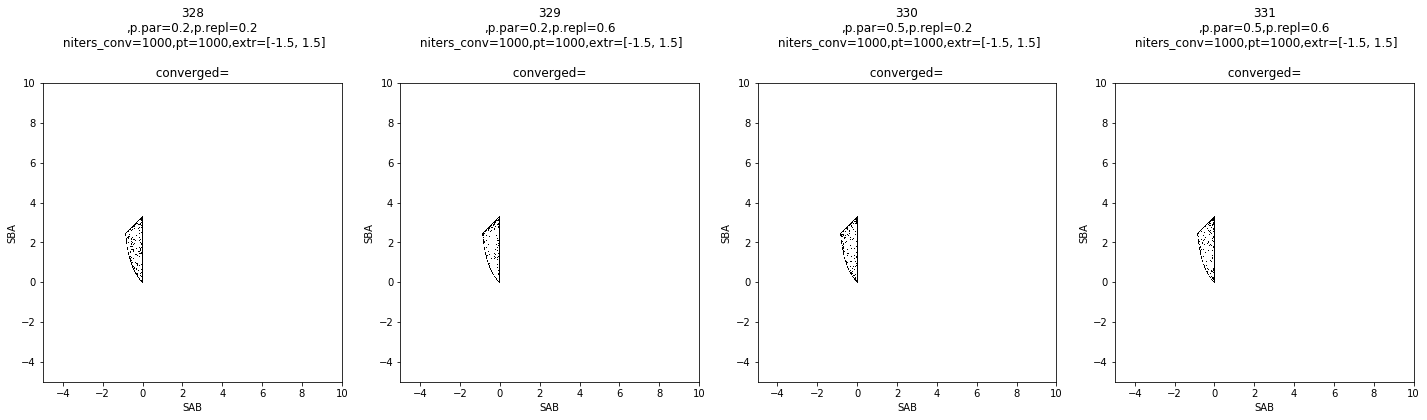

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


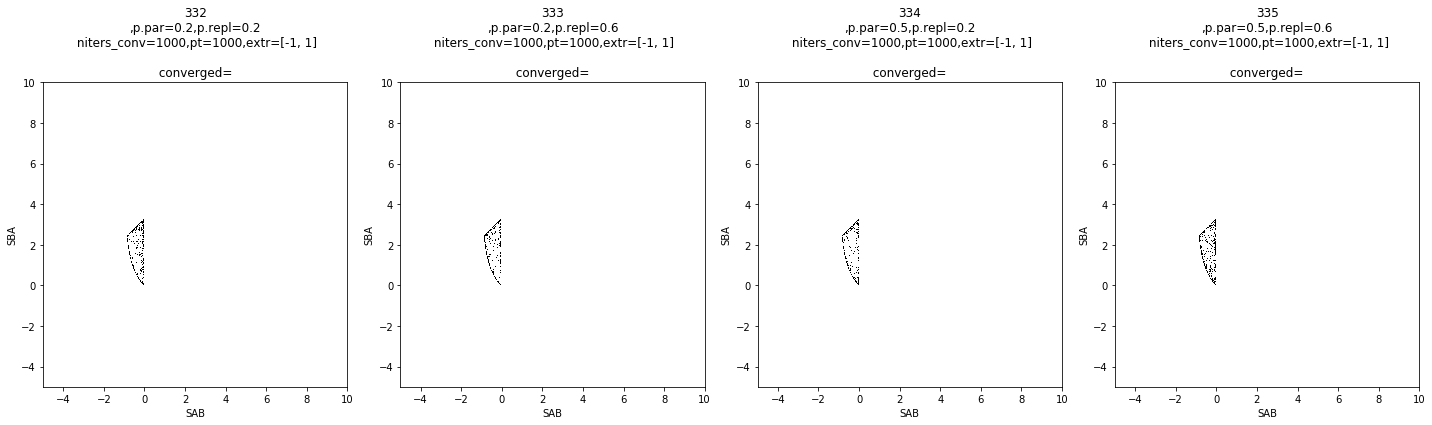

(601, 601)
sameAD_difbp_fcd=0.001_fcu=1000_fc1=5_fc2=2
[336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


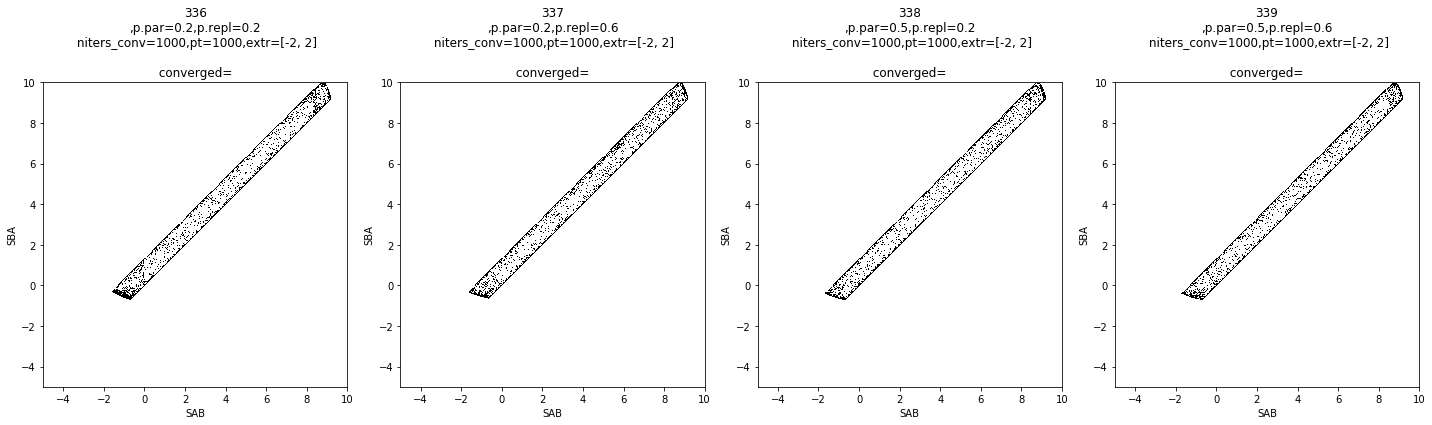

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


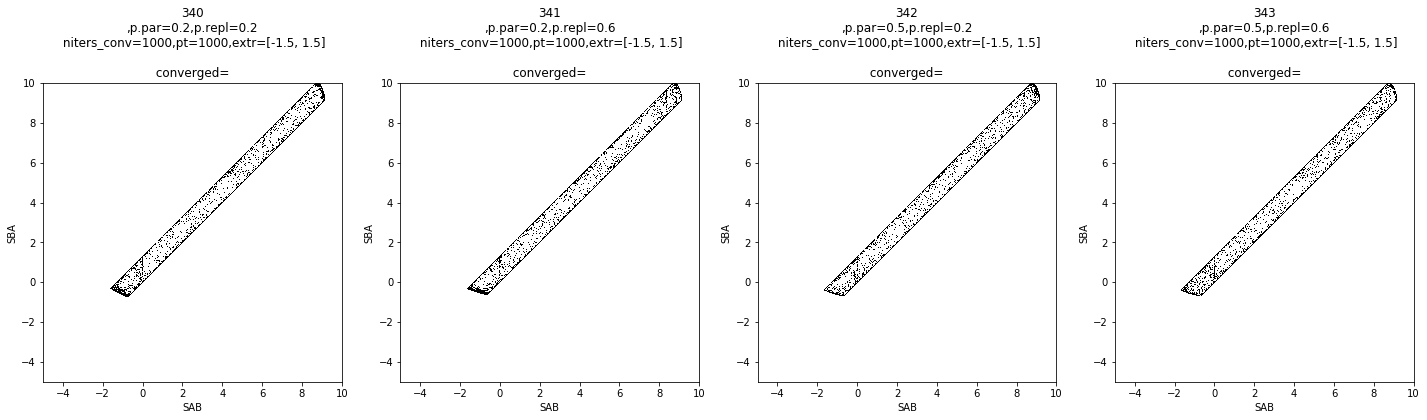

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


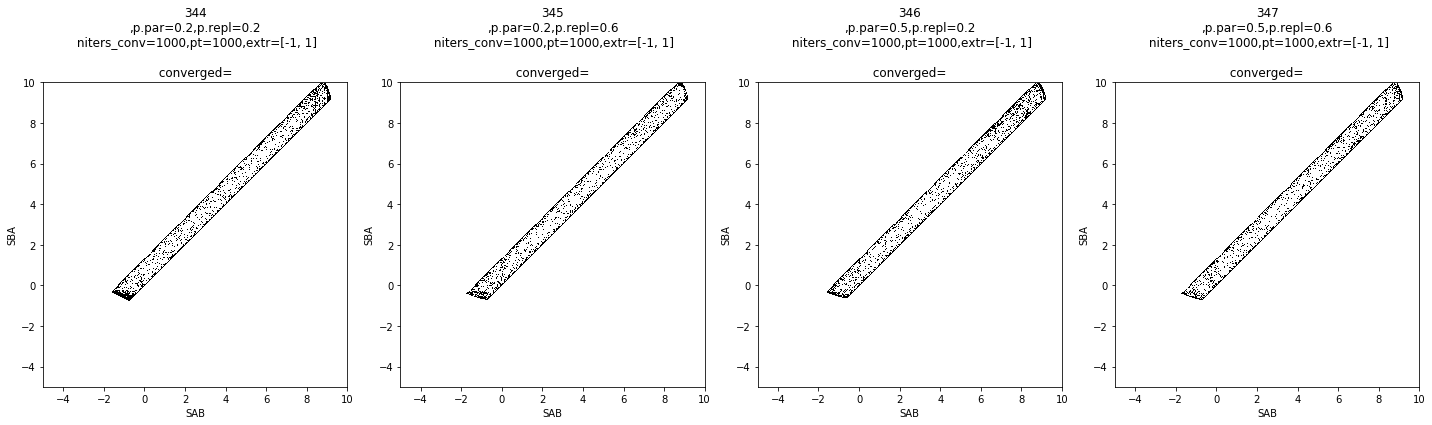

(601, 601)
sameAD_difbp_fcd=0.001_fcu=1000_fc1=5_fc2=5
[348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


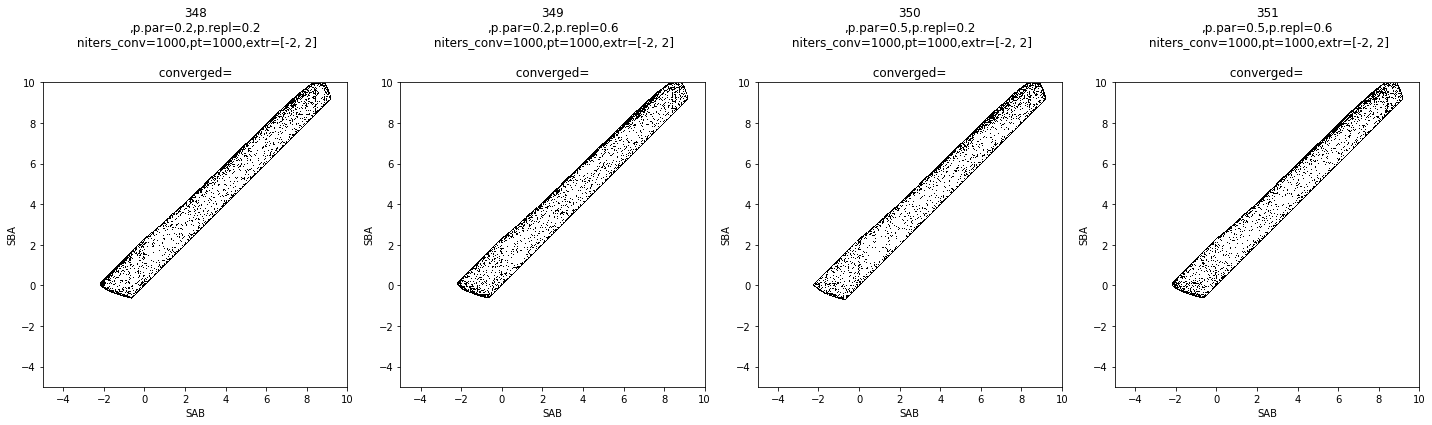

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


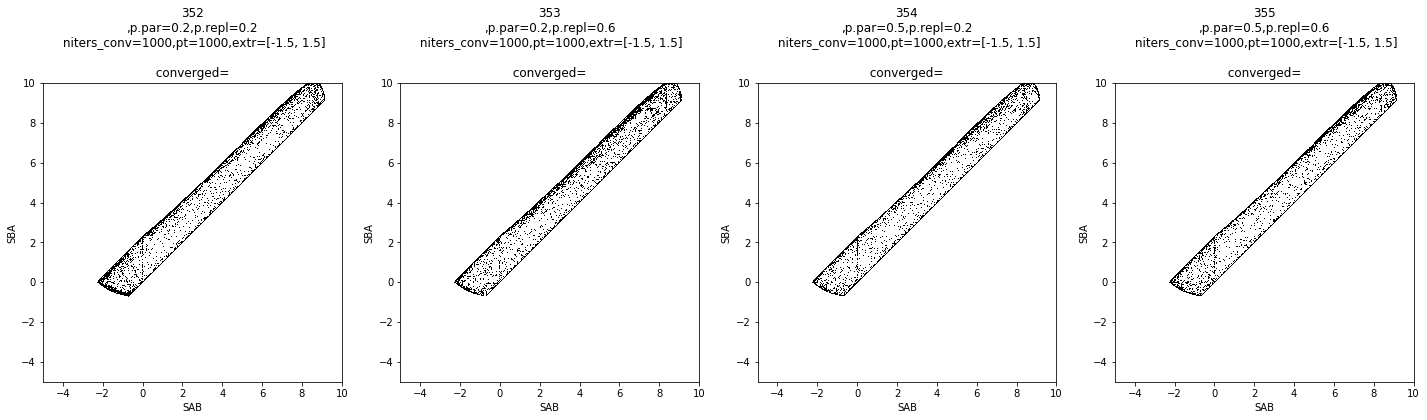

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


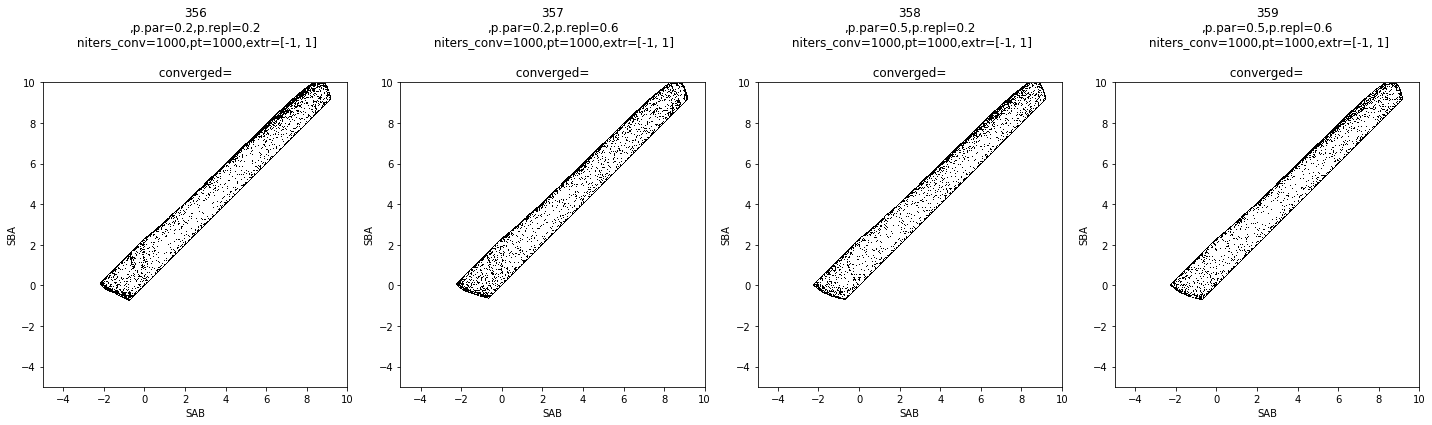

(601, 601)
sameAD_difbp_fcd=0.001_fcu=1000_fc1=10_fc2=5
[360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


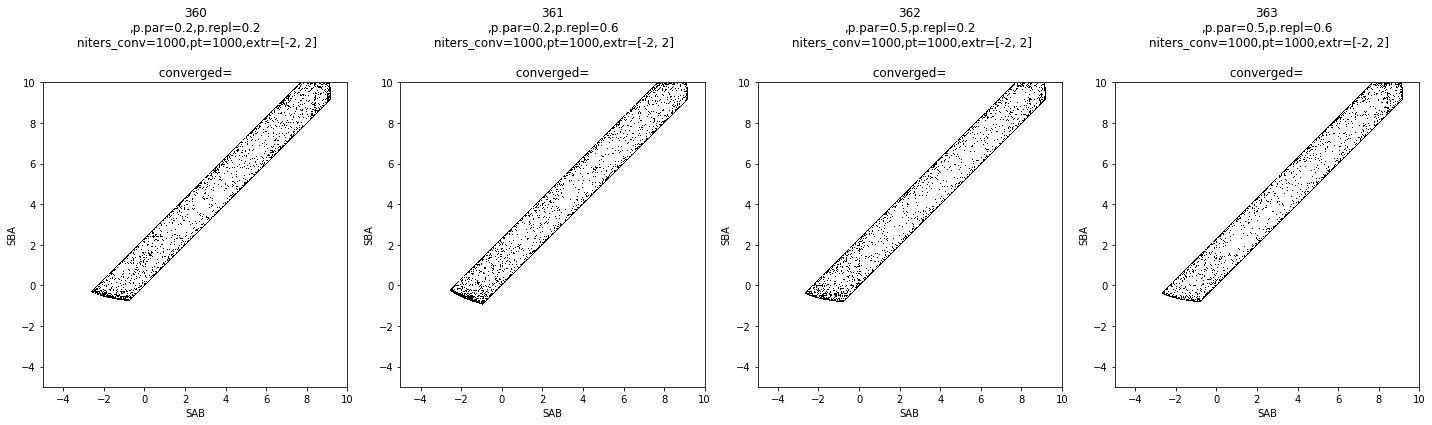

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


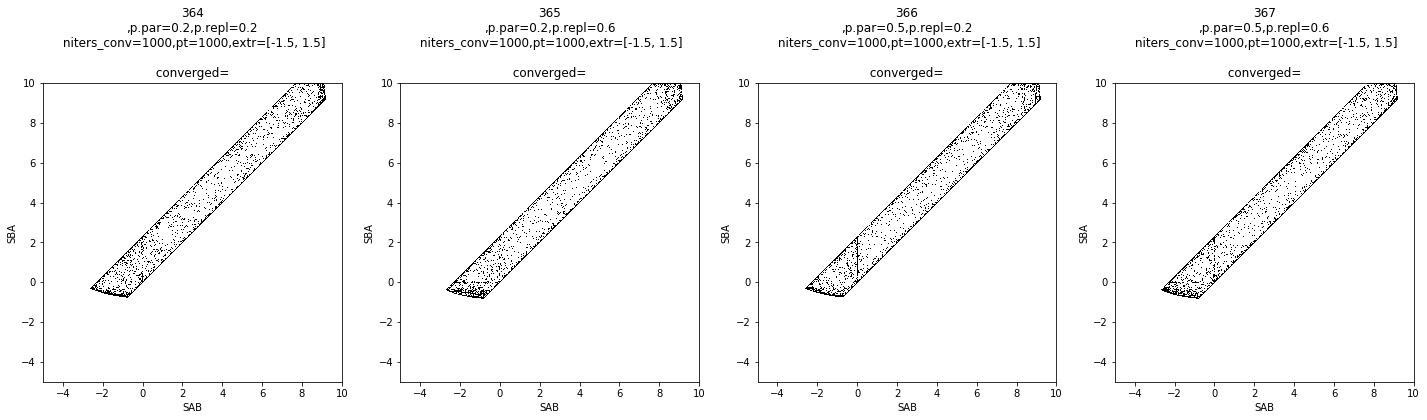

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


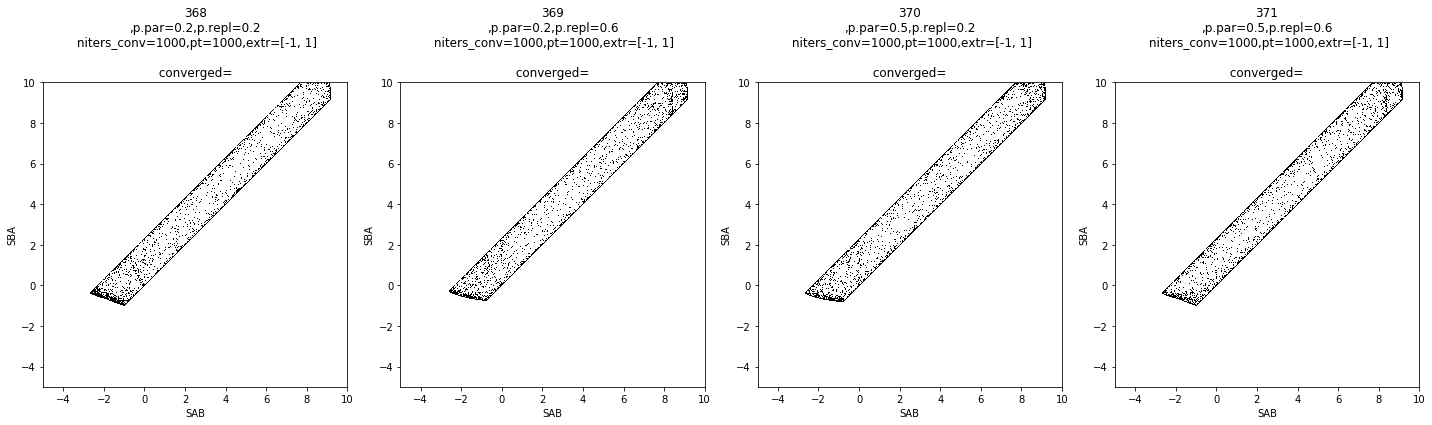

(601, 601)
sameAD_difbp_fcd=0.001_fcu=1000_fc1=10_fc2=10
[372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


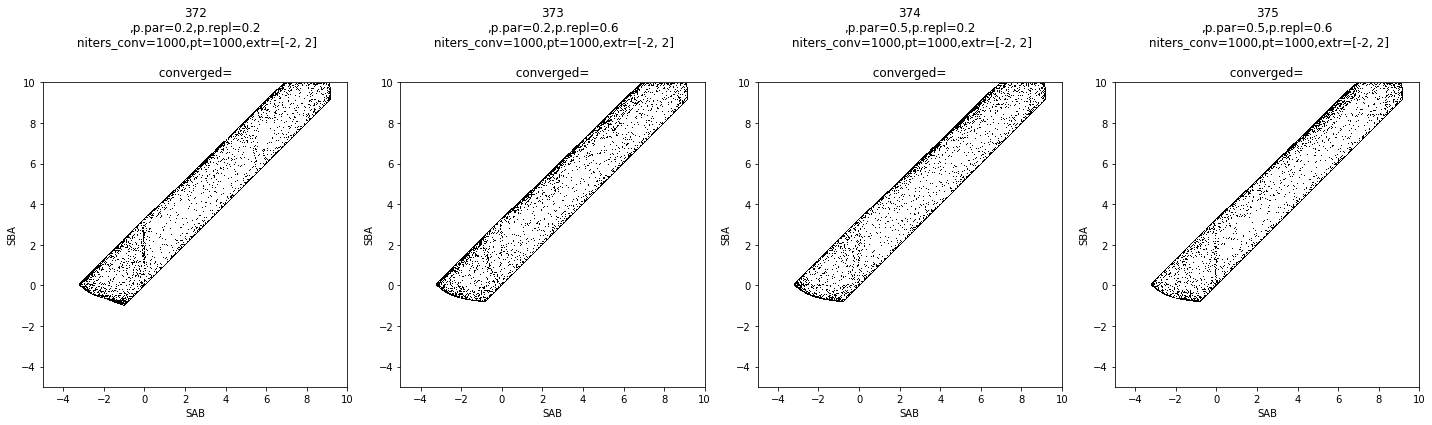

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


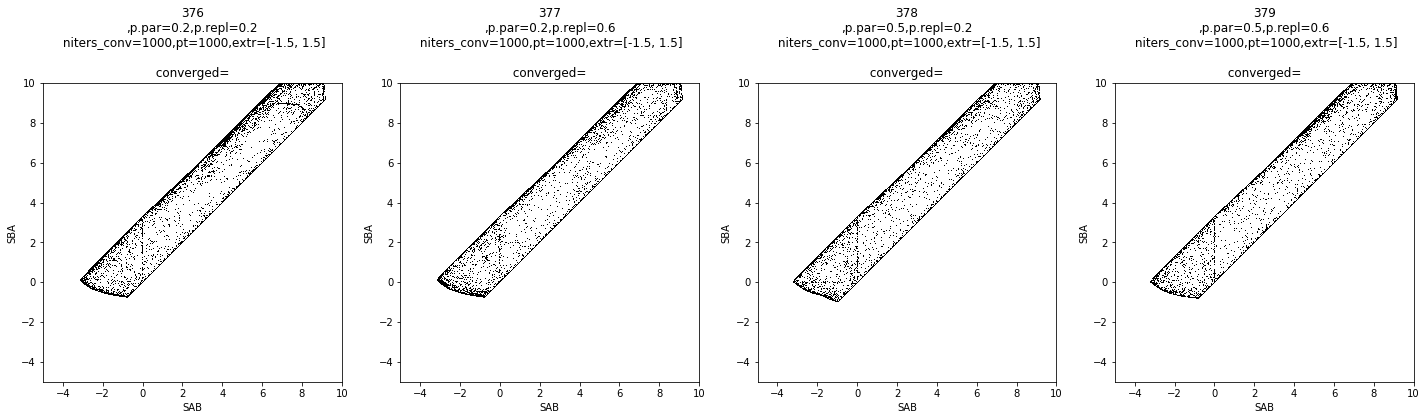

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


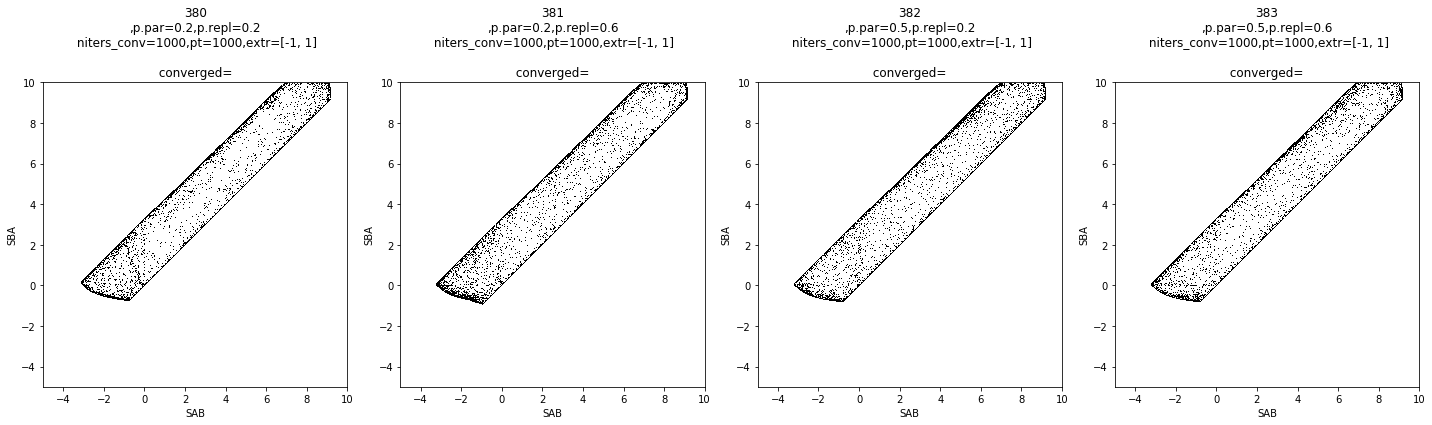

(601, 601)
sameAD_difbp_kuonly_fcd=0.001_fcu=1000_fc1=5_fc2=2
[384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


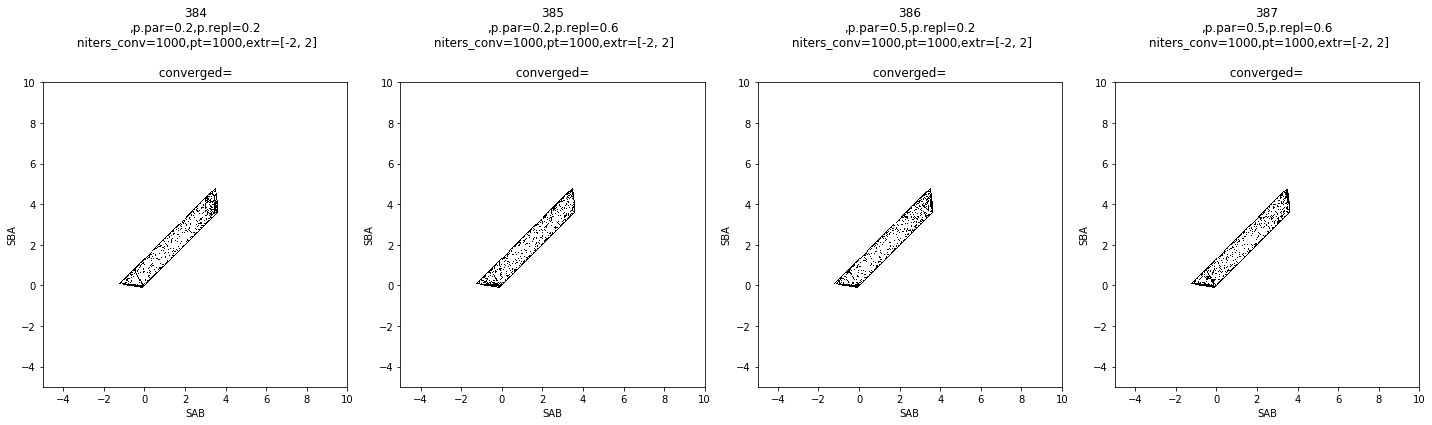

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


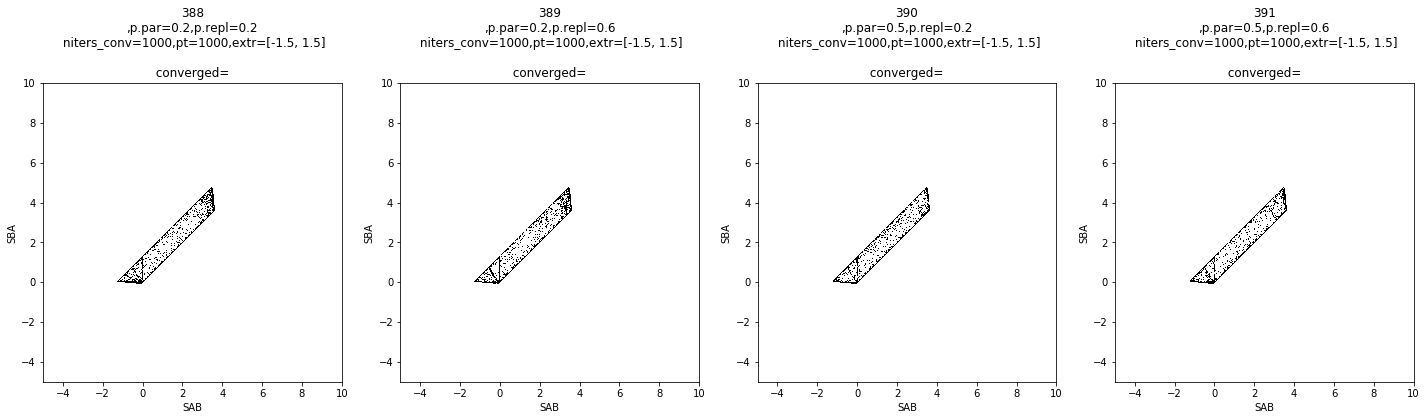

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


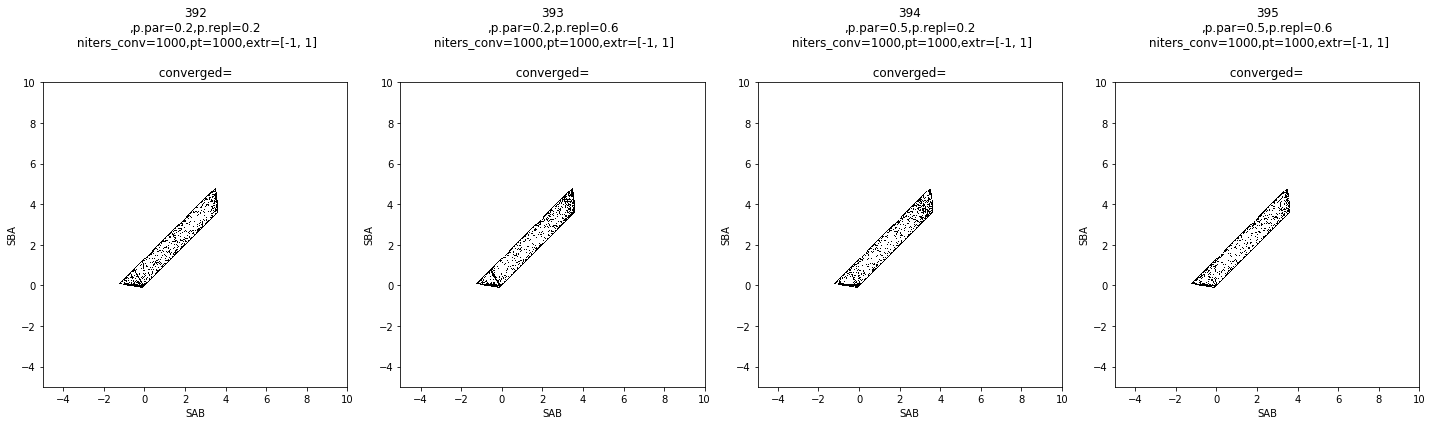

(601, 601)
sameAD_difbp_kuonly_fcd=0.001_fcu=1000_fc1=5_fc2=5
[396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


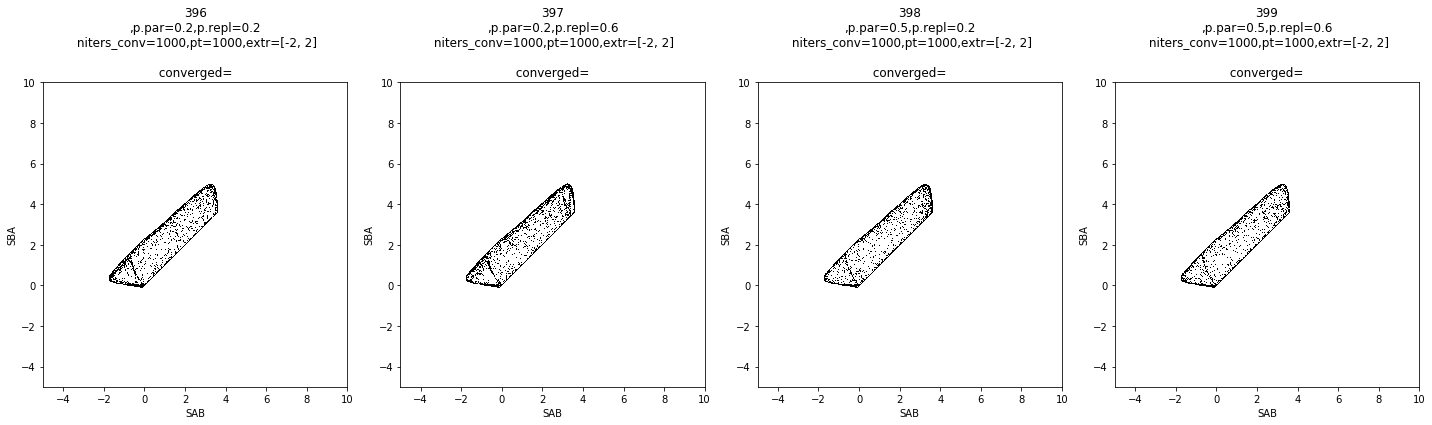

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


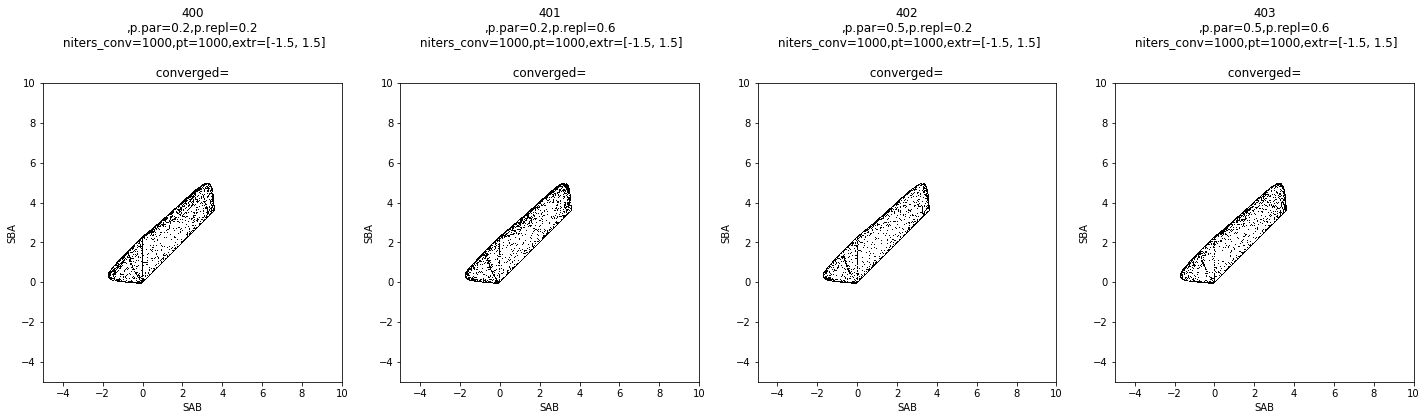

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


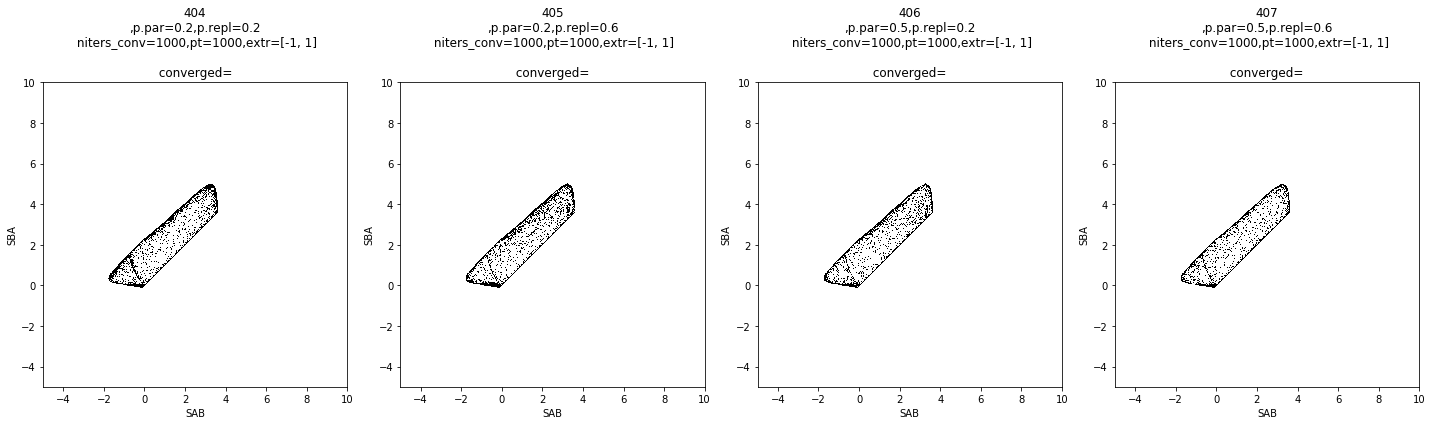

(601, 601)
sameAD_difbp_kuonly_fcd=0.001_fcu=1000_fc1=10_fc2=5
[409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


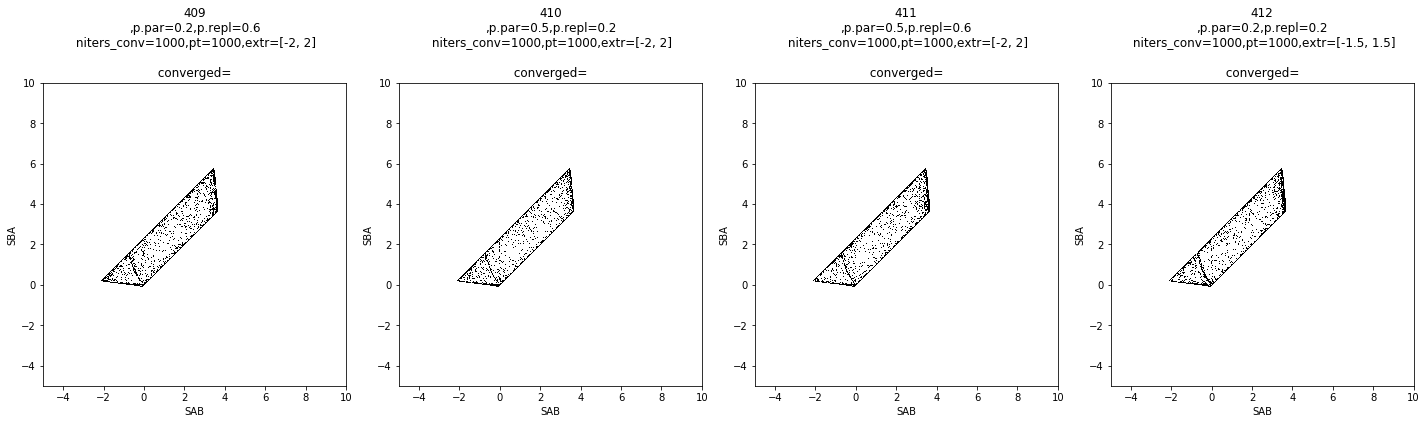

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


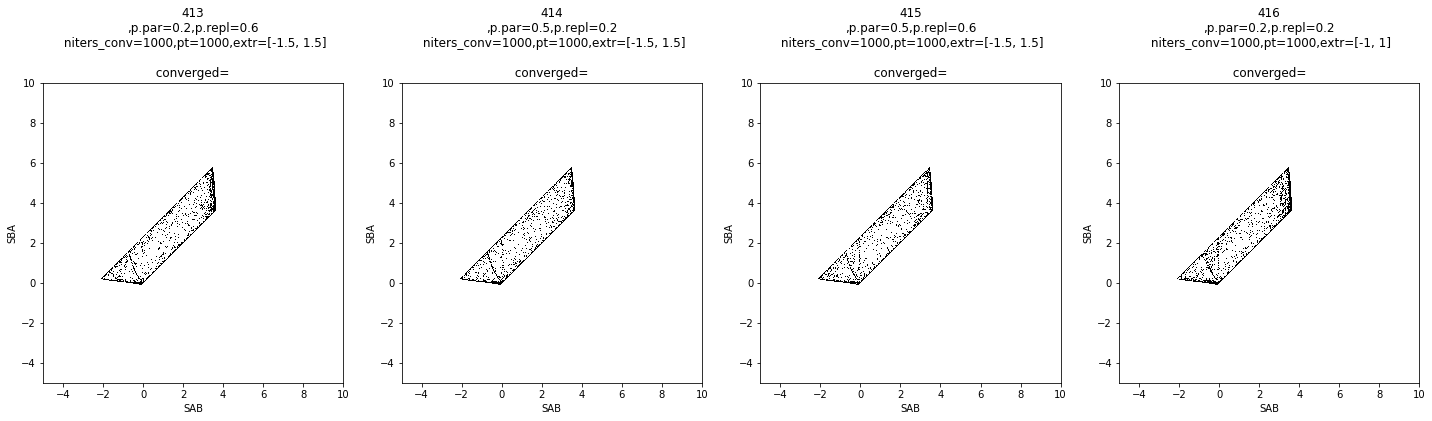

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


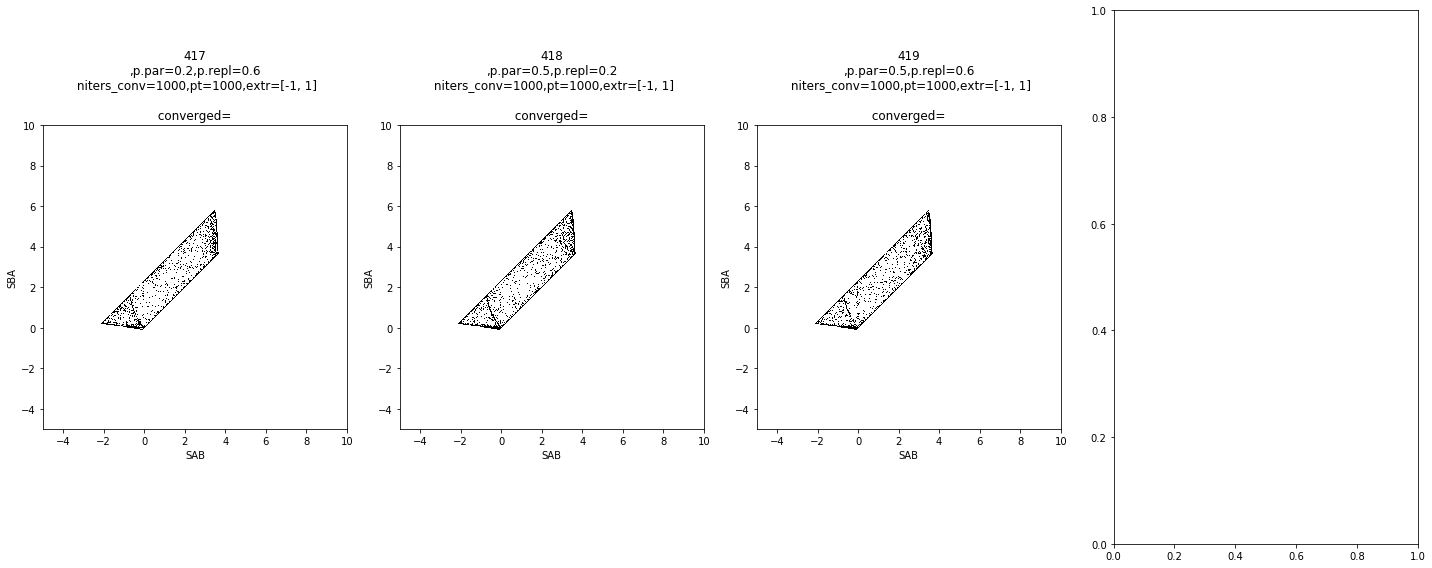

(601, 601)
sameAD_difbp_kuonly_fcd=0.001_fcu=1000_fc1=10_fc2=10
[420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


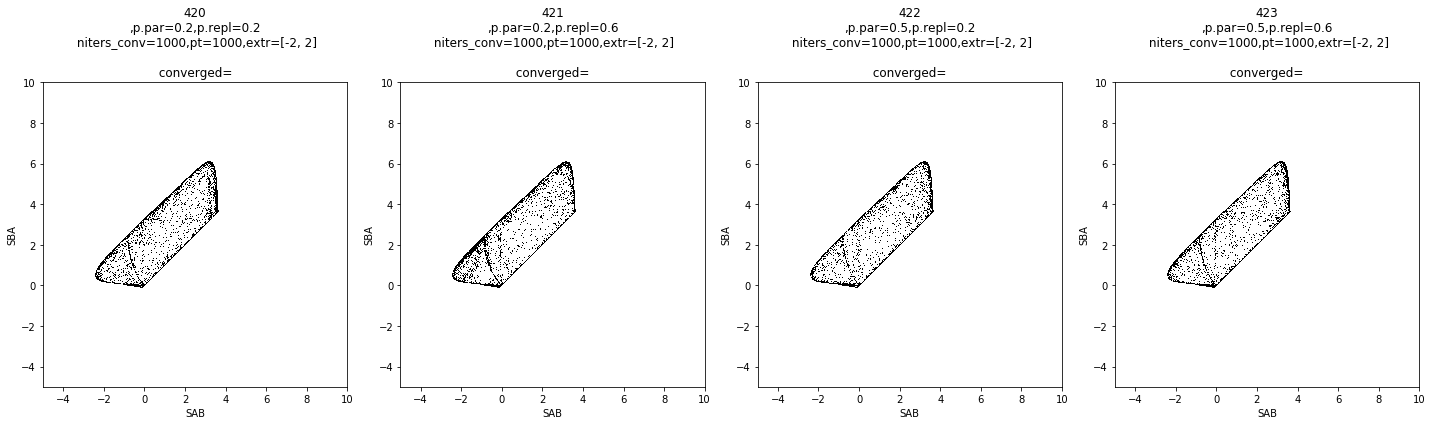

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


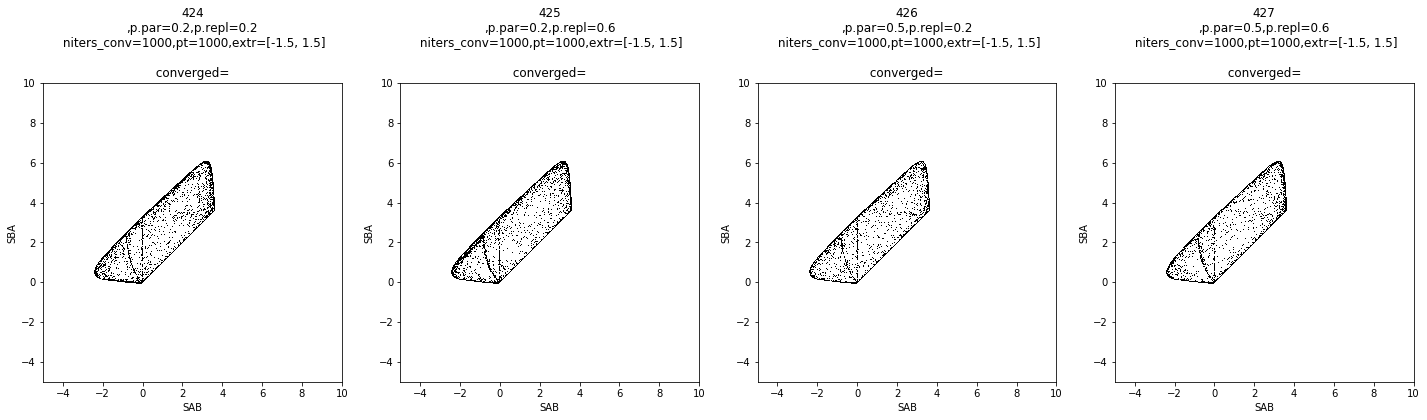

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


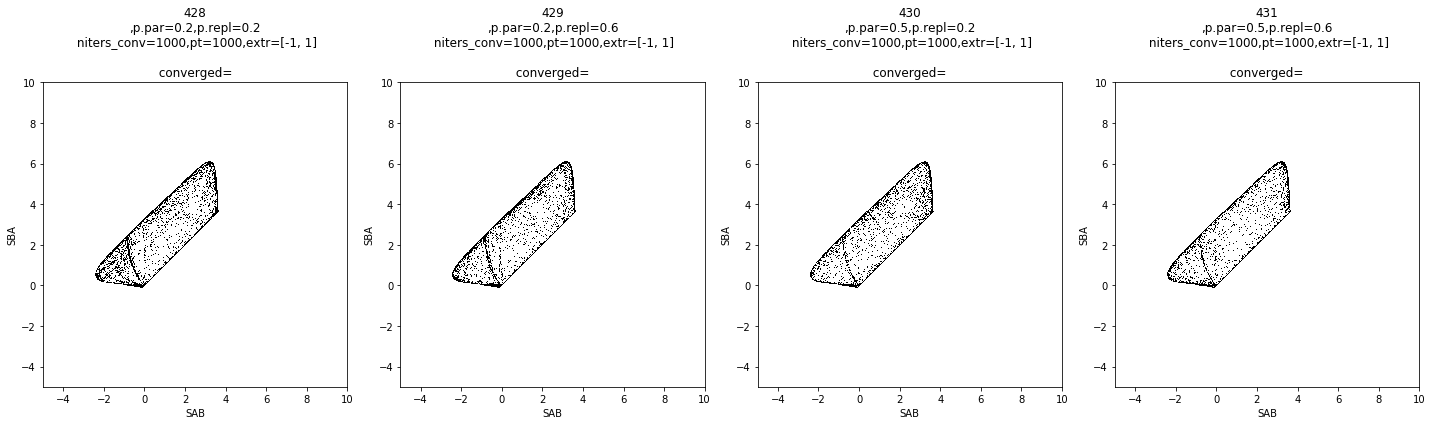

(601, 601)
sameAD_difbnp_fcd=0.001_fcu=1000_fc1=5_fc2=2
[432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


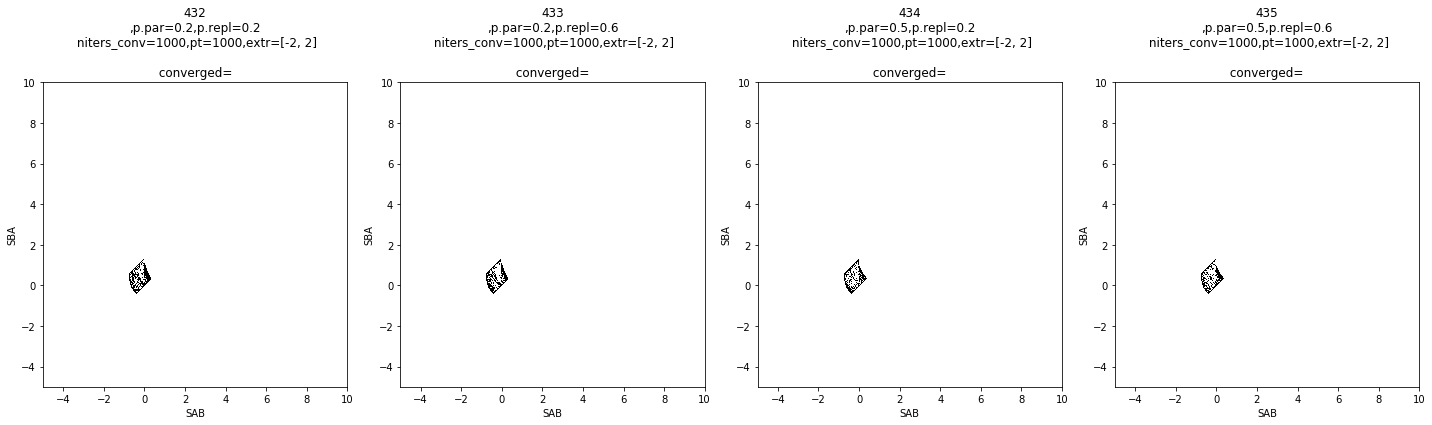

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


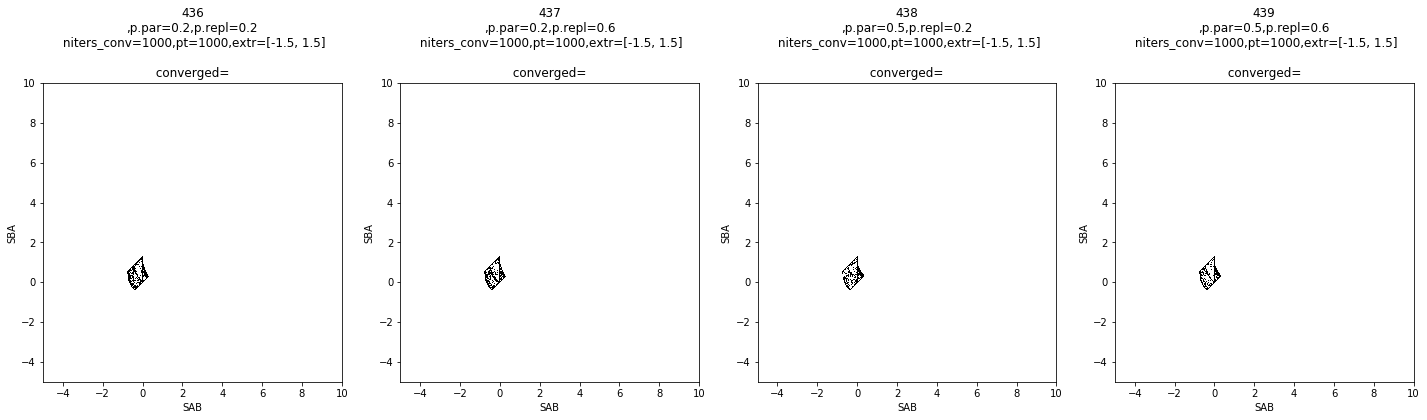

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


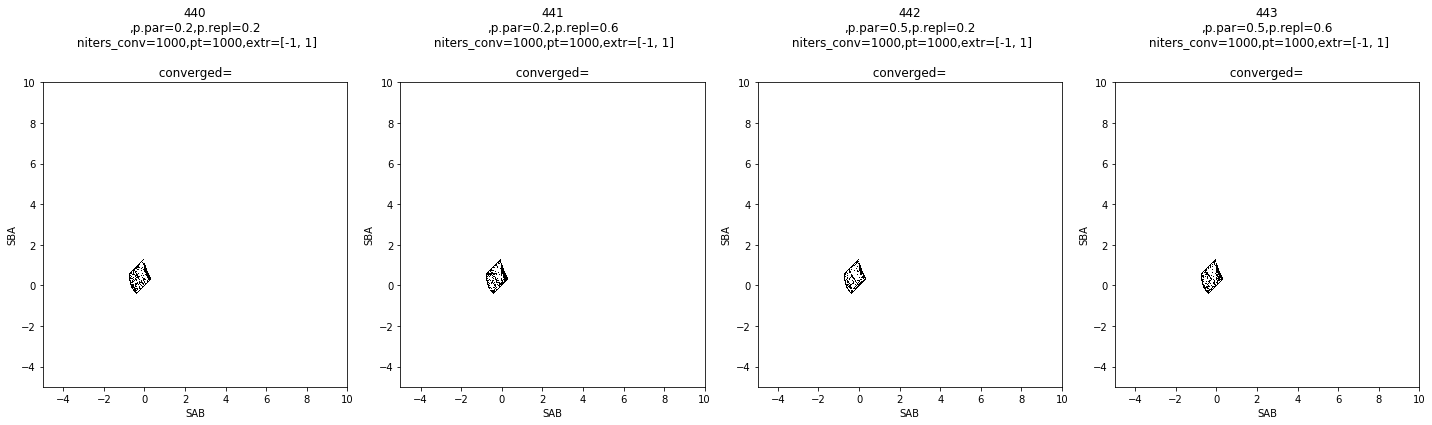

(601, 601)
sameAD_difbnp_fcd=0.001_fcu=1000_fc1=5_fc2=5
[444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


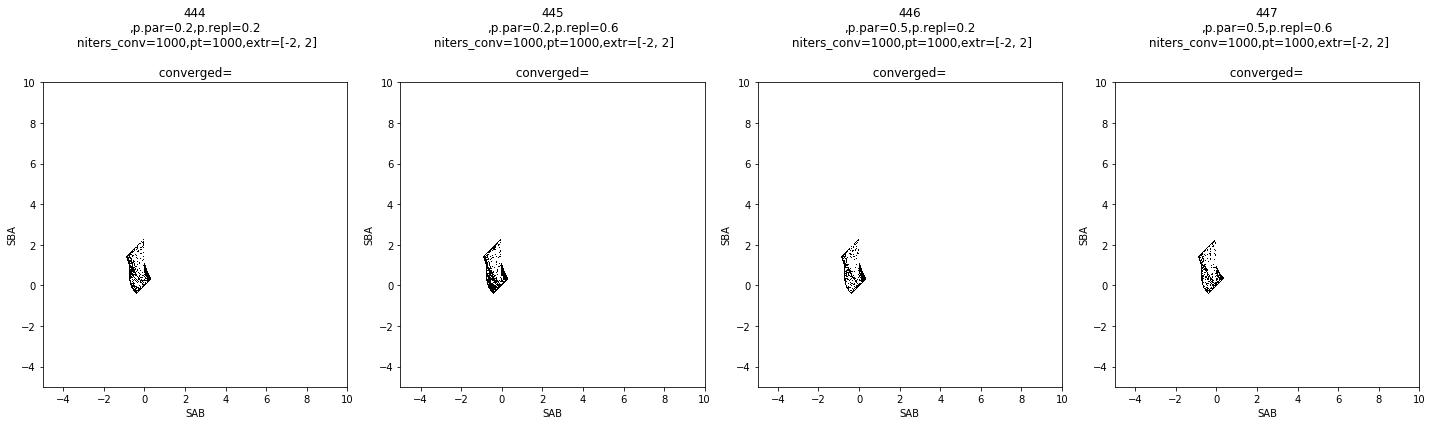

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


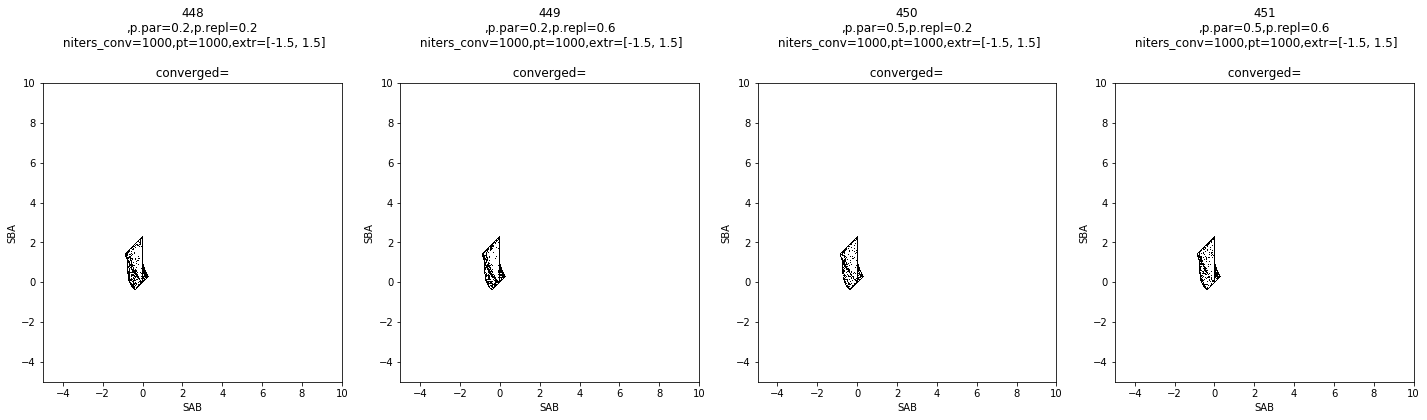

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


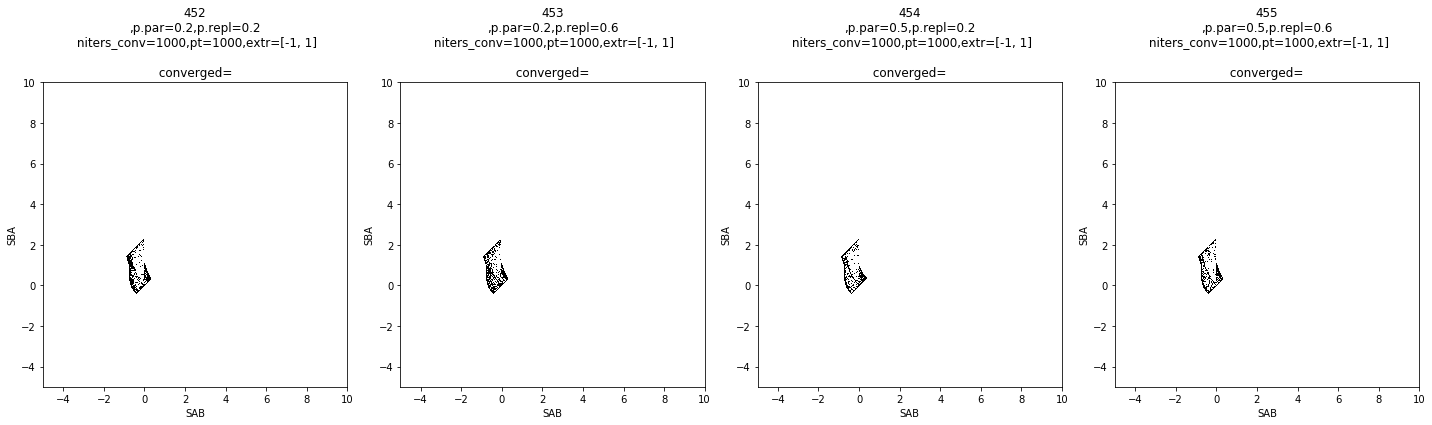

(601, 601)
sameAD_difbnp_fcd=0.001_fcu=1000_fc1=10_fc2=5
[456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


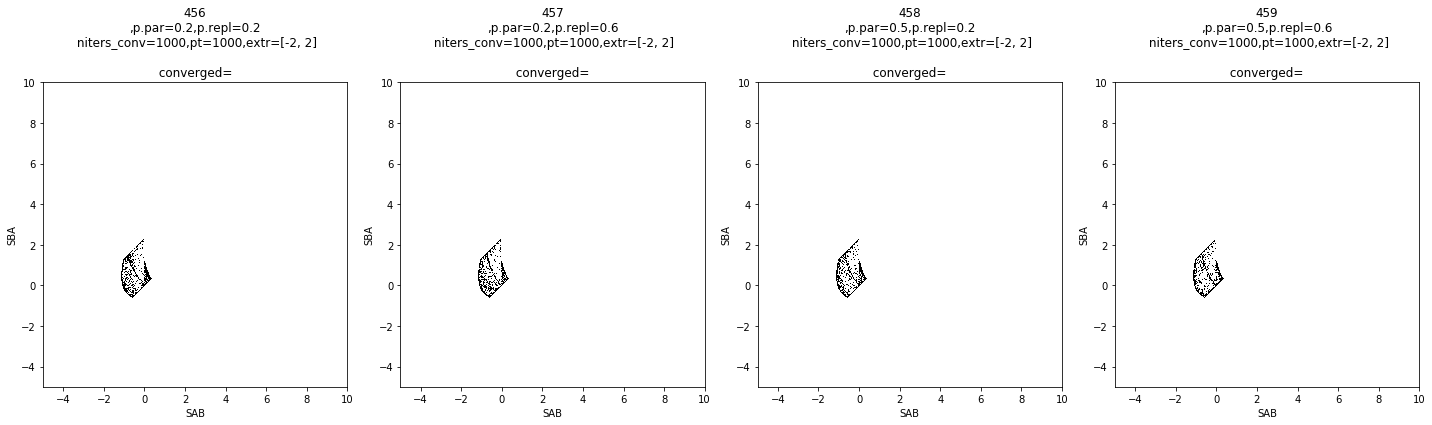

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


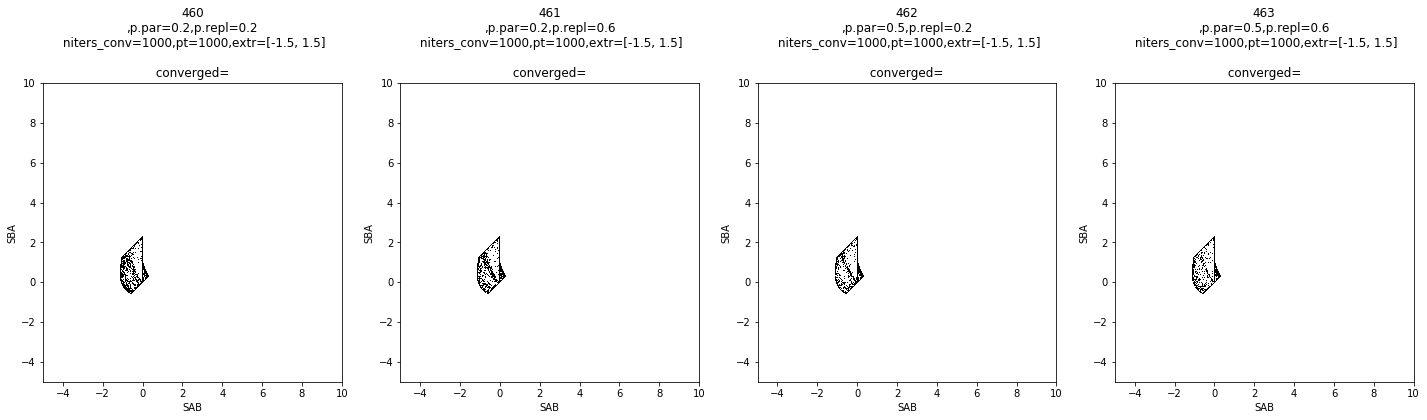

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


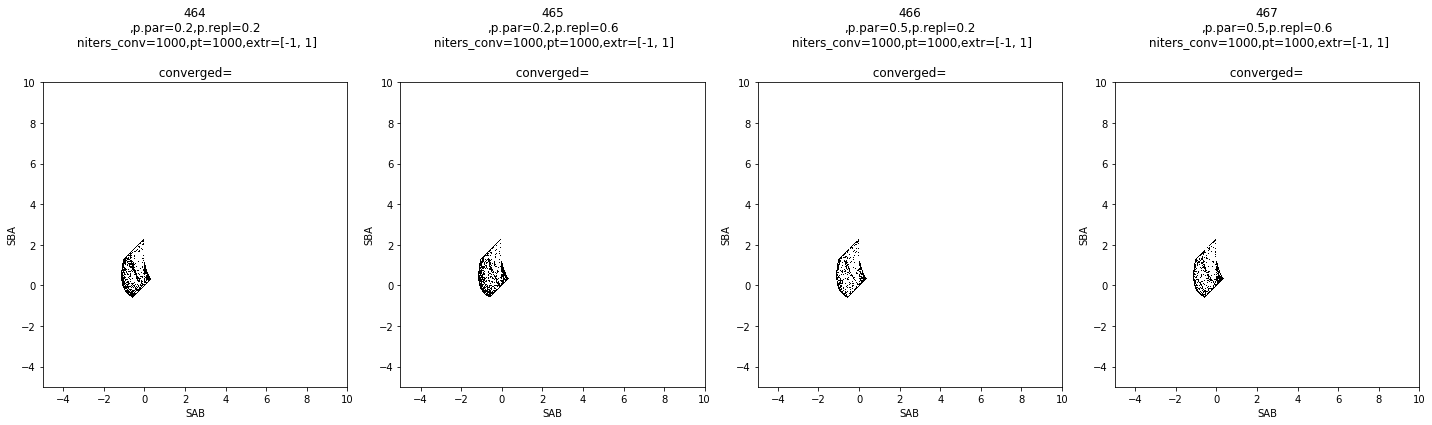

(601, 601)
sameAD_difbnp_fcd=0.001_fcu=1000_fc1=10_fc2=10
[468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


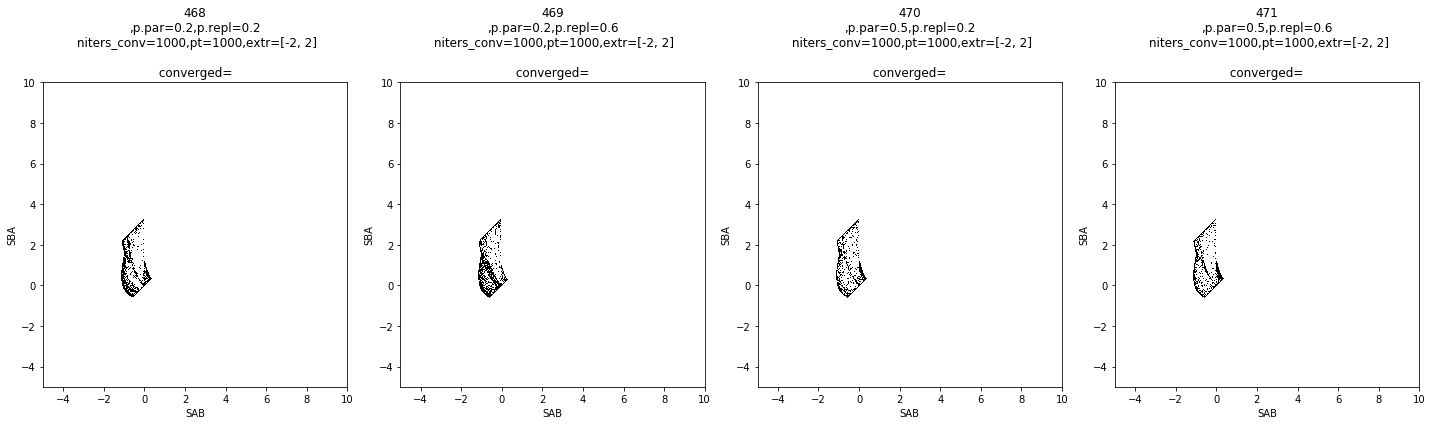

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


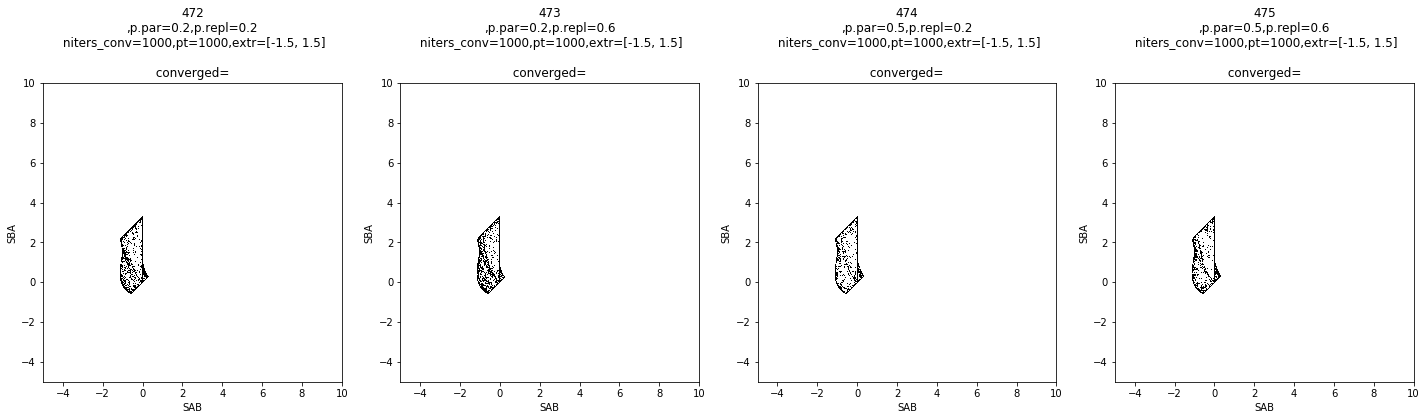

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


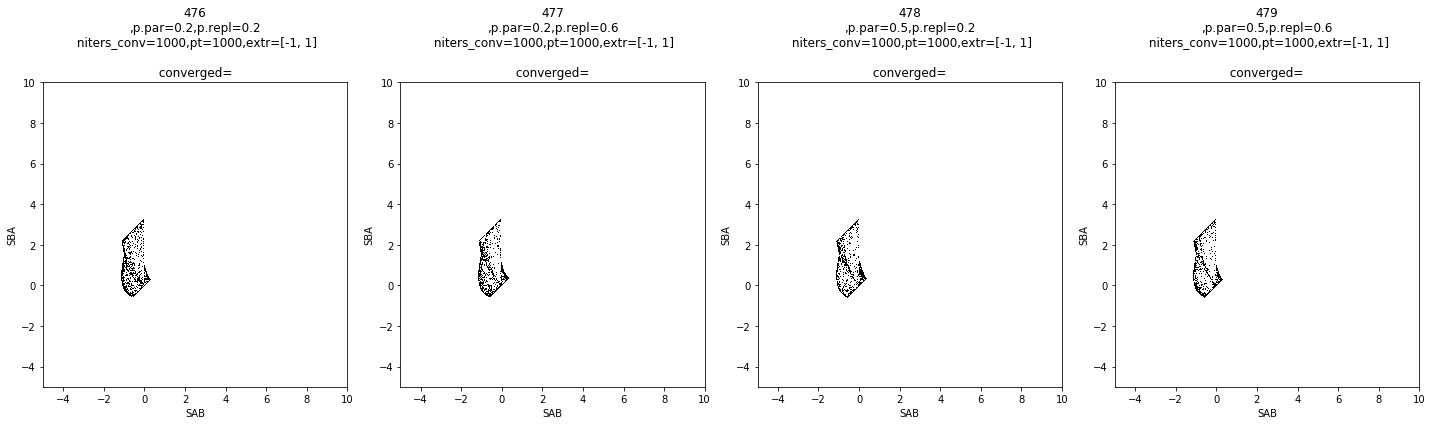

(601, 601)
empty_fcd=0.001_fcu=1000_fc1=5_fc2=2
[480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


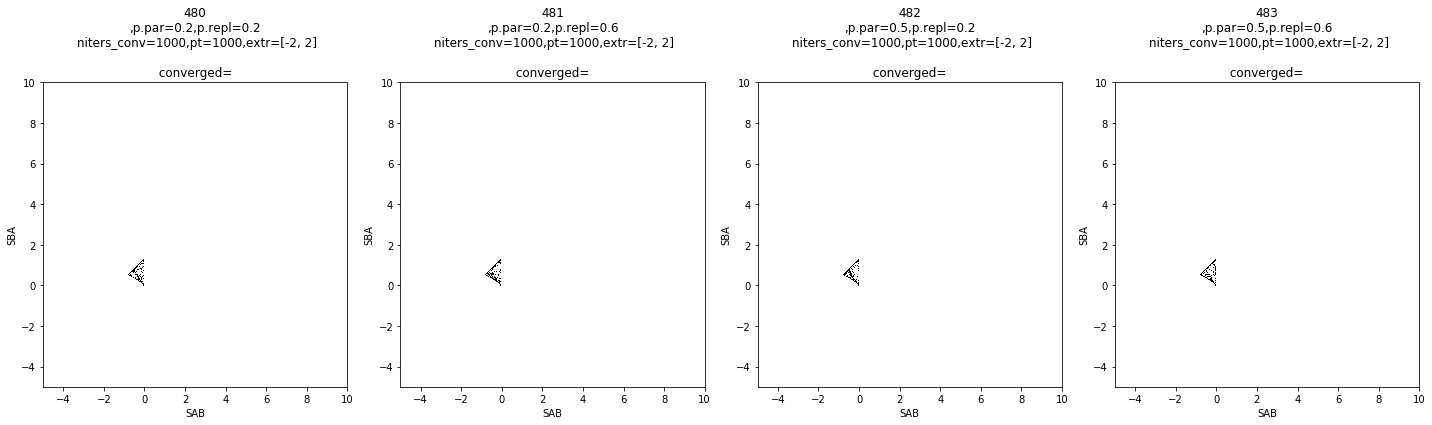

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


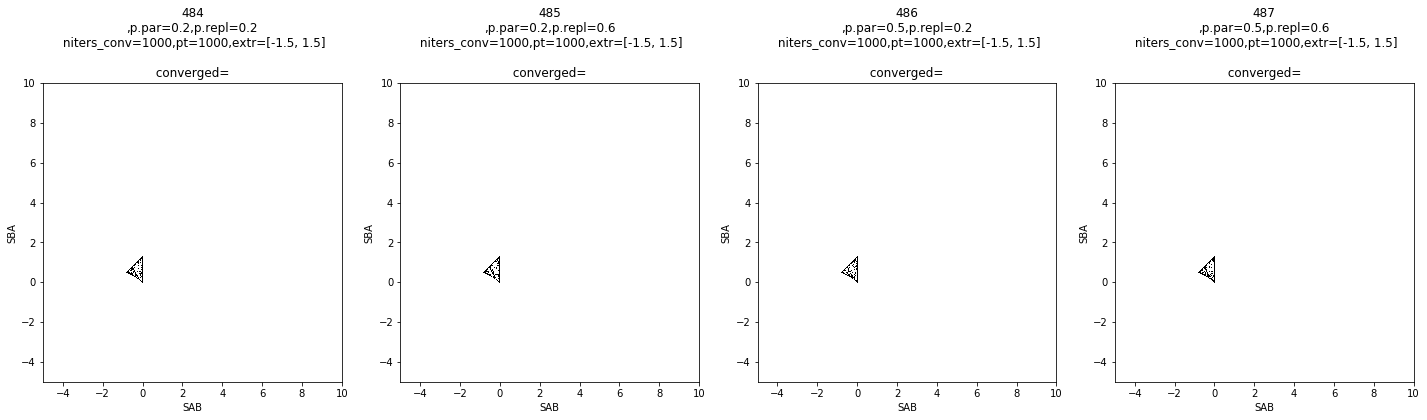

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


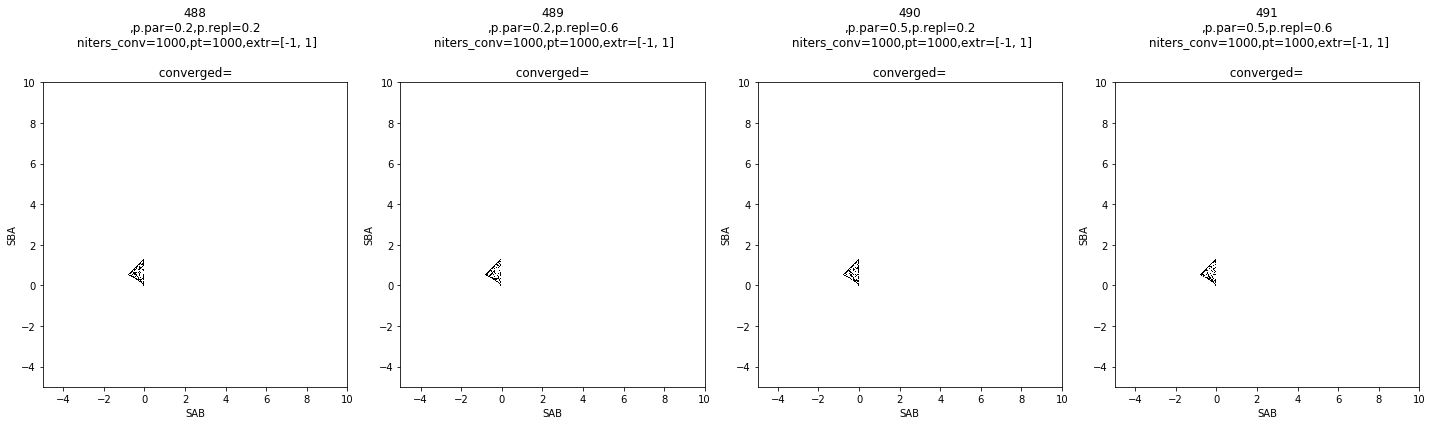

(601, 601)
empty_fcd=0.001_fcu=1000_fc1=5_fc2=5
[492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


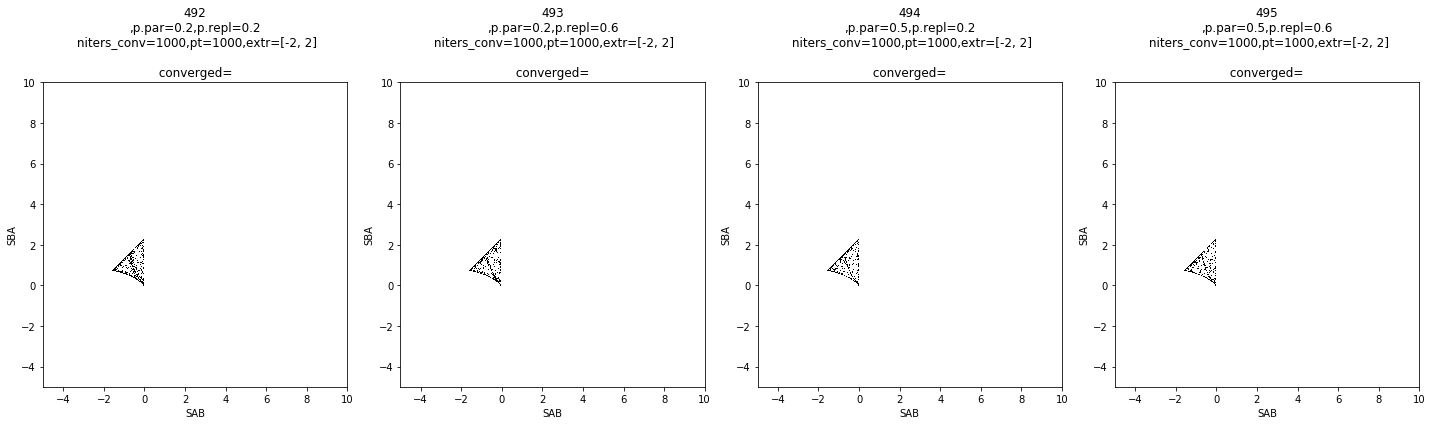

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


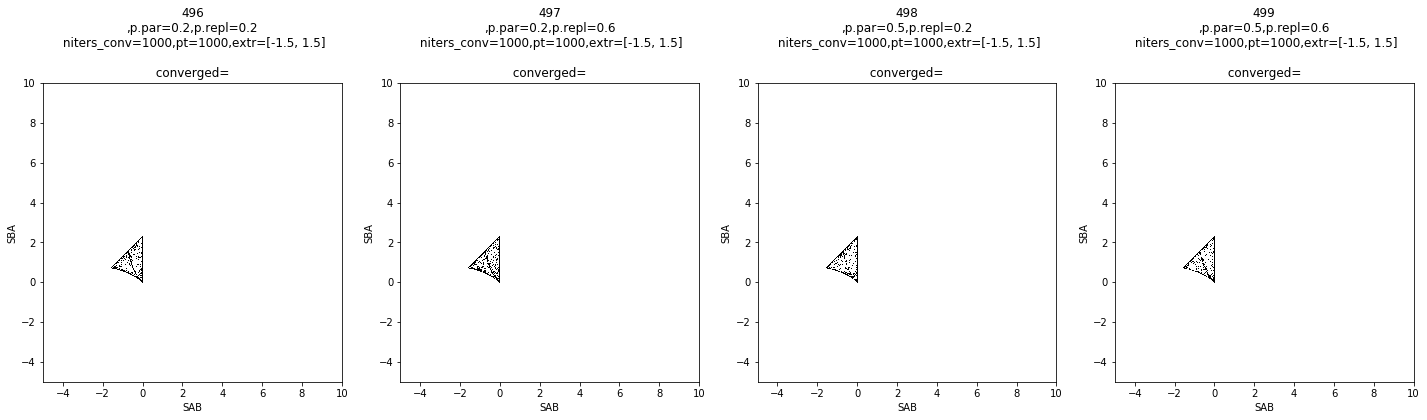

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


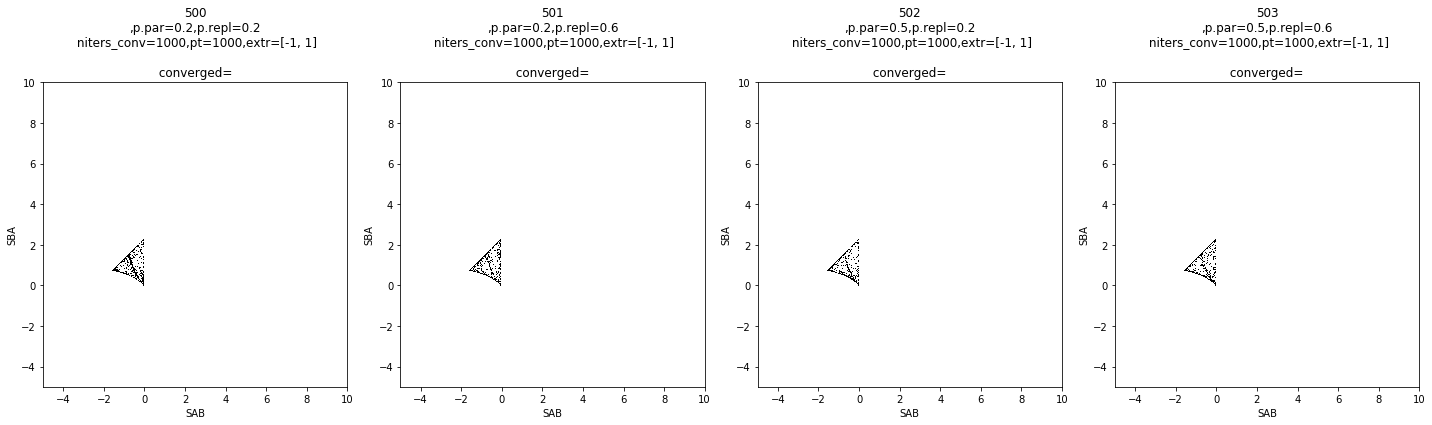

(601, 601)
empty_fcd=0.001_fcu=1000_fc1=10_fc2=5
[504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


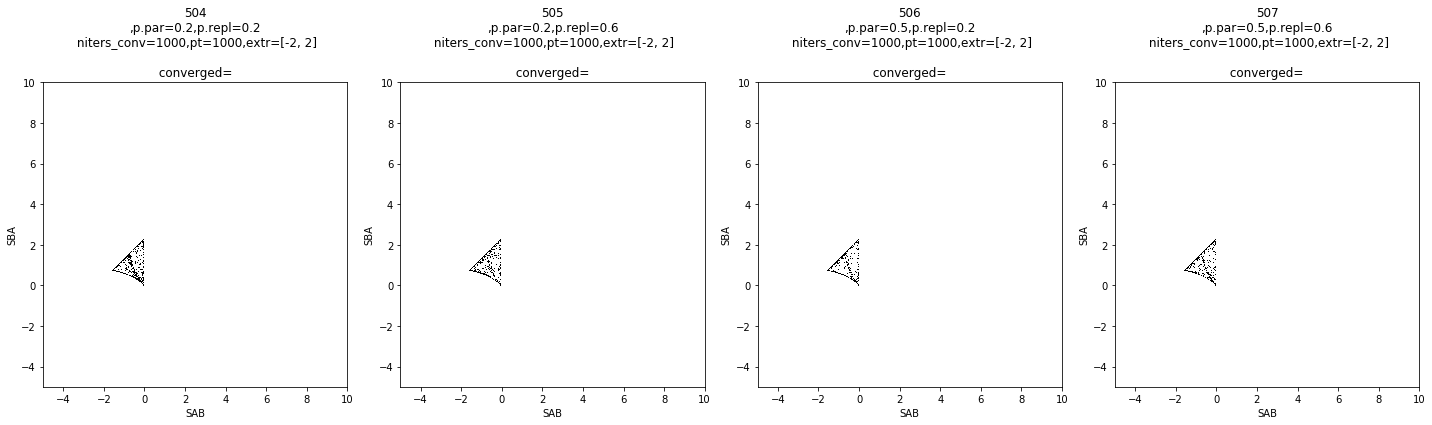

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


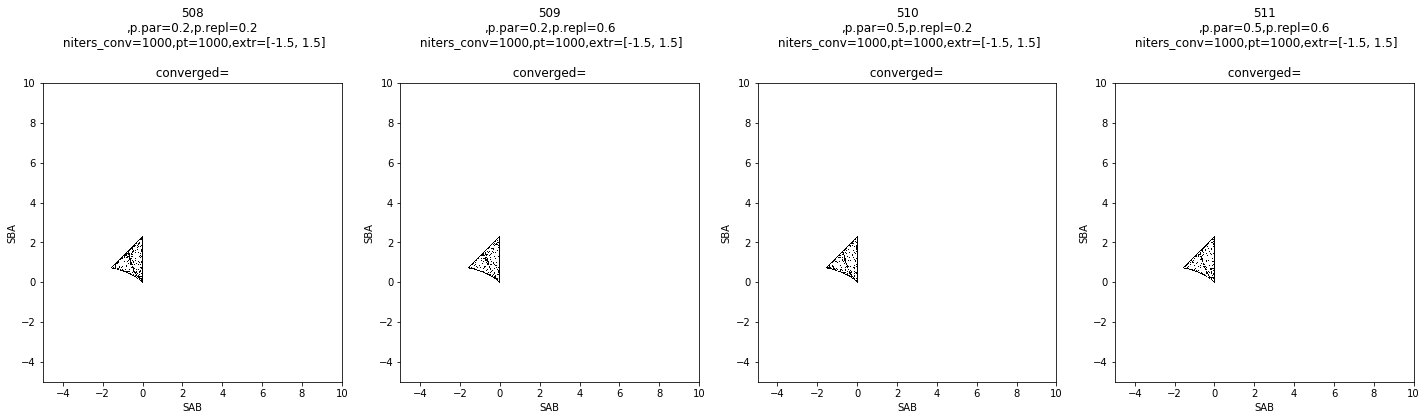

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


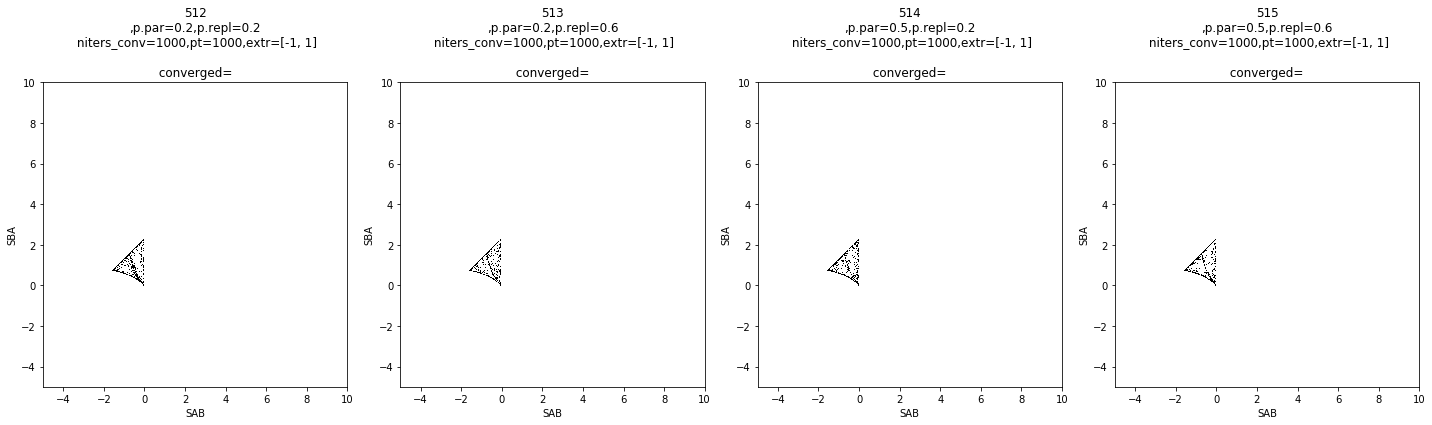

(601, 601)
empty_fcd=0.001_fcu=1000_fc1=10_fc2=10
[516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527]
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


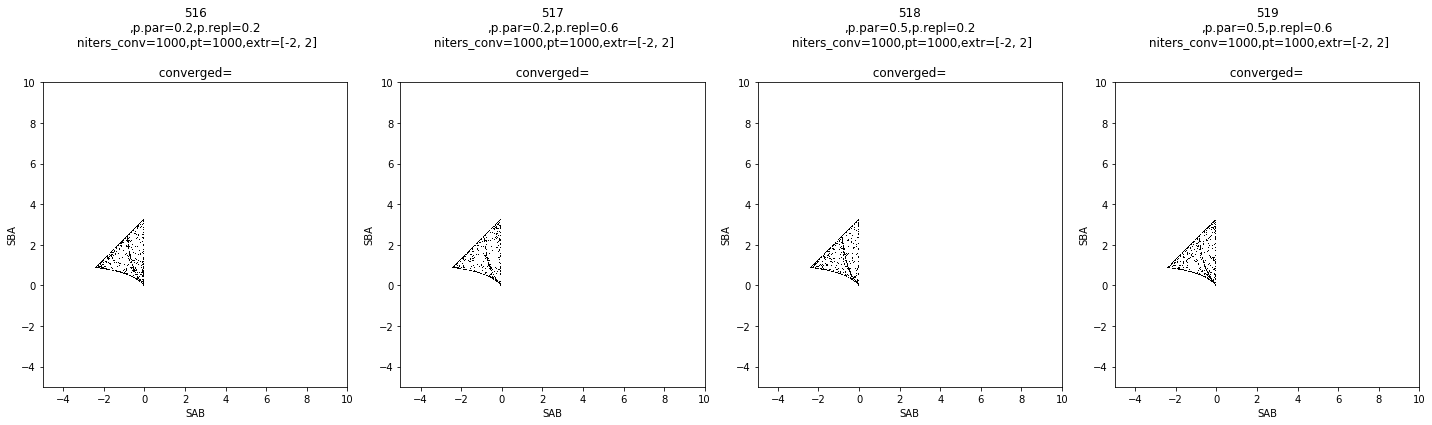

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


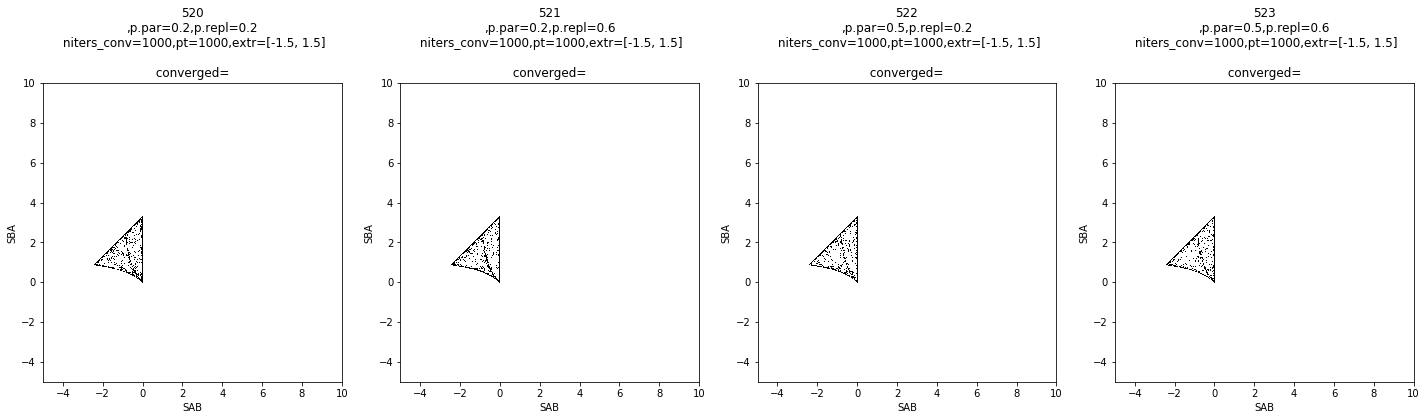

no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.
no jid_num, timediff and converged unknown.


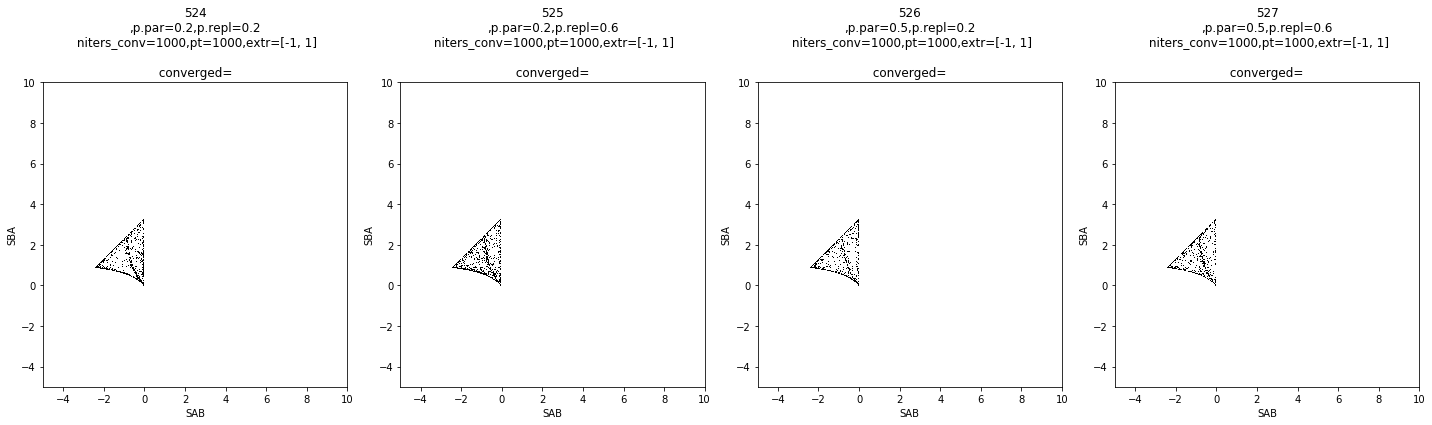

(601, 601)


In [3]:
allcases=["any","difAD_difbnp","difAD_samebnp","difAD_samebnp_step12","difAD_samebnp_step13","difAD_samebnp_step23","difAD_samebnp_step11","sameAD_difbp","sameAD_difbp_kuonly","sameAD_difbnp","empty"]
#cases=allcases[0:2]
if True:
    folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/2020_02_synergy/2020_03_09_all_kPolconstraints_1000"
    fullnames=[]
    allouts=dict()
    for case in allcases:
        allouts[case]=dict()
        fldr=folder
        #fldr=os.path.join(folder,case)
        for fc1 in [5,10]:
            for fc2 in [0.5*fc1, 1*fc1]:
                fc1_fc2="fc1=%d_fc2=%d"%(fc1,fc2)
                basename=case+"_fcd=0.001_fcu=1000_"+fc1_fc2
                print(basename)
                out=AnalyseBoundarysearch.plot_boundaries_search(fldr=fldr,getallpoints=True,printtocheck=False,final=True,septime=" ",jid_num=None,basename=basename,xlabel='SAB',ylabel='SBA')
                allouts[case][fc1_fc2]=out
                

In [4]:
for case in allcases:
    out=allouts[case]
    

dict_keys(['any', 'difAD_difbnp', 'difAD_samebnp', 'difAD_samebnp_step12', 'difAD_samebnp_step13', 'difAD_samebnp_step23', 'difAD_samebnp_step11', 'sameAD_difbp', 'sameAD_difbp_kuonly', 'sameAD_difbnp', 'empty'])

In [4]:
import pandas as pd
import re

In [5]:
fcpat=re.compile("fc1=([0-9]+)_fc2=([0-9]+)")

# Save dataframe with m0,mA,mB, SAB and SBA

In [6]:
dfslist=[]
parvalnames=["p"+str(x) for x in range(1,25)]
colnames=["SABo","SBAo", "SAB", "SBA"]+parvalnames+["fc1","fc2","fc1_fc2"]
for key in allouts:
    newdfrows=[]
    for fc in allouts[key]:
        fc1,fc2=fcpat.findall(fc)[0]
        fc1=int(fc1)
        fc2=int(fc2)
        if fc2==2:
            fc2=2.5 #there was a mistake when saving the number and I used %d instead of %g and so it didn't save as 2.5
        print(fc1,fc2)
        df=allouts[key][fc][1]
        for r in range(len(df)):
            dfrow=df.iloc[r]
            pars=dfrow["parameters"]
            fullparset=return_fullparset(pars,key)
            syn=compute_syn_2fc(pars,fc1=fc1,fc2=fc2,case=key)
            SABo=dfrow["col"]
            SBAo=dfrow["row"]
            SAB,SBA=syn
            if abs(abs(SAB)-abs(SABo))>0.025 or abs(abs(SBA)-abs(SBAo))>0.025:
                print("wrong",SAB,SABo,SBA,SBAo,abs(abs(SAB)-abs(SABo)),abs(abs(SBA)-abs(SBAo)) )
            else:
                row=[SABo,SBAo,SAB,SBA]+list(fullparset)+[fc1,fc2,fc]
                newdfrows.append(row)
    df=pd.DataFrame(np.vstack(newdfrows),columns=colnames)
            

5 2.5
5 5
10 5
10 10
5 2.5
5 5
10 5
10 10


KeyboardInterrupt: 

In [24]:
colnames=['ktia0', 'ktan0', 'ktin0', 'ktni0', 'ktiaA', 'ktanA', 'ktinA', 'ktniA', 'ktiaB', 'ktanB', 'ktinB', 
          'ktniB', 'kbBa', 'kuBa', 'kbBi', 'kuBi','kbBn', 'kuBn', 'kbAa', 'kuAa', 'kbAi', 'kuAi', 'kbAn', 'kuAn',
          'm0', 'mA', 'mB', 'mAB','oldSAB','oldSBA','SAB','SBA','fc1','fc2','fc1fc2']


for knum,case in enumerate(allouts.keys()):
    subdict=allouts[case]
    allrows=[]
    for k2 in subdict.keys():
        fc1,fc2=fcpat.findall(k2)[0]
        fc1=int(fc1)
        fc2=int(fc2)
        if fc2==2:
            fc2=2.5 #there was a mistake when saving the number and I used %d instead of %g and so it didn't save as 2.5

        df2=subdict[k2][1]
        
        pars=df2["parameters"].values
        oldSAB=df2["col"].values
        oldSBA=df2["row"].values

        print(case,len(pars))
        #if False:
        
        for p in range(len(pars)):
            SABo=oldSAB[p]
            SBAo=oldSBA[p]

            row=[]
            parset=pars[p]
            parset2=return_fullparset(parset,case)
            if len(parset2)!=24:
                print("No 24 parameters!")
                sys.exit()
            mstars=[]
            for i in range(4):
                if i==0:
                    A=0.0
                    B=0.0
                elif i==1:
                    A=2.0
                    B=0.0
                elif i==2:
                    A=0.0
                    B=2.0
                else:
                    A=1.0
                    B=1.0
                m=PolAB_A_allpars.interface_GRF_PolAB_A_A(parset2.copy(),np.array([B]),A)
                mstars.append(m)
            if mstars[1]<mstars[2]:
                parset2=np.concatenate((parset2[0:4],parset2[8:12],parset2[4:8],parset2[18:24],parset2[12:18]))
                mstars=[mstars[0],mstars[2],mstars[1],mstars[3]]

            SABn=np.log2(mstars[3]/mstars[1])
            SBAn=np.log2(mstars[3]/mstars[2])
            if (SABo>0 and SABn<0) or (SABo<0 and SABn>0) or (SBAo>0 and SBAn<0) or (SBAo<0 and SBAn>0):
                print("SABs signs not coincident!!!", SABo,SABn,SBAo,SBAn)
            elif ((np.abs(np.abs(SABo)-np.abs(SABn))>0.03) or (np.abs(np.abs(SBAo)-np.abs(SBAn))>0.03)):
                print("SAB or SBA too different", SABo, SABn, SBAo, SBAn)
            else:
                #make A the one with larger expression. so B becomes A, and A becomes B. swap parameters
                
                row.extend(list(parset2))
                row.extend(mstars)
                row.extend([SABo,SBAo,SABn,SBAn,fc1,fc2,k2])
                allrows.append(row)

    df2=pd.DataFrame(np.vstack(allrows),columns=colnames)
    for col in colnames[:-1]:
        df2[col]=pd.to_numeric(df2[col])

    #df2['SAB']=np.log2(df2["mAB"].values/df2["mA"].values)
    #df2['SBA']=np.log2(df2["mAB"].values/df2["mB"].values)
    array=np.ones(len(df2))*(-1)
    SAB=df2['SAB']
    SBA=df2['SBA']
    m1=((SAB>0) & (SBA>0))
    m2=((SAB<0) & (SBA>0))
    m3=((SAB<0) & (SBA<0))
    array[m1]=1
    array[m2]=2
    array[m3]=3
    #array[m4]=4
    df2['quadrant']=array
    df2.name=case
    df2['mA/mB']=df2['mA']/df2['mB']
    #alldf2.append(df2)
    pd.to_pickle(df2,"2020_03_15_kPolconstr1000_%s.df"%case)
    #print(df2.columns)
    #print(df2.iloc[pidxs[0]])
    #print(df2.iloc[pidxs[1]])
    #print(df2.iloc[pidxs[2]])
        
    
    

any 72038
any 92600
SABs signs not coincident!!! -0.0249999999999293 0.0 -0.0249999999999293 3.203426503814917e-16
any 93535
any 113008
difAD_difbnp 53534
difAD_difbnp 73714
SABs signs not coincident!!! -0.0249999999999293 0.0 -0.0249999999999293 3.203426503814917e-16
difAD_difbnp 69842
SABs signs not coincident!!! -0.0249999999999293 0.0 -0.0249999999999293 6.406853007629834e-16
difAD_difbnp 88763
difAD_samebnp 52320
difAD_samebnp 72280
difAD_samebnp 69773
difAD_samebnp 86822
difAD_samebnp_step12 32990
difAD_samebnp_step12 49432
difAD_samebnp_step12 38168
SABs signs not coincident!!! -0.0249999999999293 0.0 -0.0249999999999293 3.203426503814917e-16
difAD_samebnp_step12 49994
SABs signs not coincident!!! -0.0249999999999293 0.0 -0.0249999999999293 3.203426503814917e-16
difAD_samebnp_step13 36108
difAD_samebnp_step13 43774
difAD_samebnp_step13 40656
difAD_samebnp_step13 48179
SABs signs not coincident!!! -0.0249999999999293 0.0 -0.0249999999999293 3.203426503814917e-16
difAD_samebnp_ste